## Autophagy, cell death, and lysosomes 
### Introduction  
#### April 1, 2020
- **Briefly**<br>
Autophagy is the process that delivers intracellular components to lysosomes for degradation. This process can promote or inhibit cell death. The latter occurs because it's degrading components that can be used as an energy source in case of stavation."*Much of this interest has been driven by the fact that manipulation of autophagy holds great promise for improving treatment of diverse diseases.*" Micoroautophagy, macroautophagy and chaperon mediated autophagy are all different autophagic mechanisms that are mediated by lysosomes (i.e. they rely on lysosomes to degrade the components they hold or sequester).<br>
**Cell death can be in many forms:** <br>
* Extrinsic apoptosis  
* Caspase dependent  
* Caspase independent intrinsic apoptosis (mitochondrial).
* Regulated necrosis  
* Autophagic   
* Mitotic catastrophic <br>
As for apoptotic cell death(programmed cell death), which is important in normal development and is an essential mechanism to remove damaged or dangerous cells, it's important to know that many signals trigger apoptosis(mitochondrial , golgi apparatus, and lysosomal).<br>
**Lysosomal cell death is divided into:**
- Necrotic LCD 
- Autophagic LCD 
- Apoptotic LCD <br>
Lysosomal membrane permeabilization is can predict which kind of cell death is taking place (e.g. partial selective permeabilization triggers apoptosis, while complete breakdown of an organelle cn occur in unregulated necrosis).
As we have seen from the very little information provided above, all the three phases (autophagy, cell death, and lysosome) are highly overlapped and studying a gene/protein involved in one phase can mean that this gene/protein is also involved in the other phase.<br>
Therefore, **one of the aims** of this project is to gather information about the genes related to autophagy, cell, and lysosomes and find the overlap between them in order to understand their mechanisms better. <br>
### Meeting with Sonja
**Tasks:**<br>
1. Write a script to automatically download all the databases.
2. Write a script to extract the information from the databases automatically. (Doesn’t matter the format to be downloaded). To get gene IDs, gene names and their synonyms if available, Uniprot ID if available, protein names.<br>
3. Above steps can be mixed together.<br>
4. Next step is to merge entries whereby those who do not have uniprot IDs will be assigned to one (take into account that some genes (microRNA genes) are not protein encoding so they won’t have uniprot IDs).<br>
5. Then we will have a list of genes that will be classified according how they are reported in different databases. e.g. lamp1 reported to be in lysosomes in “this database”, or reported to be important in cell death in “this database”..etc.<br>
6. One complicated thing that could be added is to find the homologs in different species. e.g. one database reported galactin3 in humans and another reported it in yeast. This could be part of the functional annotation.<br>
7. At the end we will have a list of genes that are known have relation to ACL. We can look at the overlap between all of them and compare our results to the text mining results.<br>

8. They tried to knock down some genes and see the effect on cell count (if they become less then they most probably died). There’s a list of these genes (hits/screens) already. So when I get the database tables we can see how many genes of these lists are already reported to be involved in lysosomes, cell death, or autophagy. We want to see also which genes that are regulating cells are dying but not dead yet.<br>

9. We don’t have data for what is dying.<br>
10. I will look at the genes that we know are dead, and relate if they have something to do with lysosomes.<br>
11. Final step is to do pathway analysis, what type of genes are interacting with each other (draw pathway). <br><br>
***IN SUMMARY***<br>
1. First step is to get information from databases.
2. Second step is to compare the screens to the genes list I got. Cell profiler can be used in this step to compare the images results for the cells that are dying(after getting Malou’s results).
3. Do pathway analysis (e.g. 14 genes are interacting with each other so they may form a pathway).<br>


### April 2-8, 2020
### Tasks:
- Learn how to use packages for downloading **zipped, gzipped, tar files as well as csv tables.**<br>
- Write codes to download databases.<br>
- Learn how to use jupyter notebook and jupyter markdown.<br>


#### **Downloading The Autophagy Database**

In [ ]:
import tarfile
import wget
import gzip
import zipfile
from zipfile import ZipFile
import csv
import pandas as pd
from owlready2 import *
import goatools
from goatools.obo_parser import GODag

#Downloading .tar.gz files from "The Autophagy database". It requires wget and tarfile libraries.
#save the url of the file to a variable
url = "http://www.tanpaku.org/autophagy/download/autophagyDB.tar.gz"
#download with wget and use the name of the file with its extension
wget.download(url,'autophagyDB.tar.gz')
#Tarfile by default does not treat the file as gzipped so give it the r:gz mode. then open the folder.Here I do not specify 'rb' because it's a folder.
AutophagyDB= tarfile.open('autophagyDB.tar.gz', "r:gz")
#extract the content
AutophagyDB.extractall()
AutophagyDB.close()
#The output was saved in /Volumes/LaCie/MasterThesis2020/The_Autophagy_database

#### **Downloading The Gene Ontology Database**

In [ ]:
#Downloading go.owl. This requires owlready2 library
#specify the directory you want to append the file to
onto_path.append('/Volumes/LaCie/MasterThesis2020/jupTest')
go_onto = get_ontology("http://purl.obolibrary.org/obo/go.owl").load()
#save the file 
go_onto.save()
#The output was saved in /Volumes/LaCie/MasterThesis2020/The_GO_Resource_database

In [ ]:
#Downloading go-basic-obo. This requires goatools library and need to import GODag
url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
wget.download(url,'go-basic.obo')
go_obo = goatools.obo_parser.GODag('go-basic.obo')
#The output was saved in /Volumes/LaCie/MasterThesis2020/The_GO_Resource_database

### NOTE:<br> 
On the 7th of april, Sonja told me to try parse the gene ontology database by searching in the html file downloaded for specific GO terms concerning autophagy, cell death and lysosomes and get the list of genes for that. So I might not use the following files but I will keep them anyways. <br>
**The following codes are used to download and gunzip gene annotation files for 6 species whereby homo sapiens has 4 different files (protein, isoform,complex, rna).** <br>



In [ ]:
#These files require wget and gzip libraries
#I downloaded these files already using Atom and copied them to jupyter notebook.
#Downloading .gz files from "The Gene Ontology Database"
#Homo sapiens protein**
url = 'http://geneontology.org/gene-associations/goa_human.gaf.gz'
wget.download(url, 'goa_human.gaf.gz')
#specify s reading mode for the file (read binary). Two files will be downloaded .gaf.gz and .gaf (i can name them whatever I want)
Go_human = gzip.open('goa_human.gaf.gz', 'rb')
#better to close to reduce the computational load.
Go_annotation_human = Go_human.read()
Go_human.close()
#Now we write  the file to another file (gunzipped because I gunzipped it at earlier steps). I specify the wb because it's binary
output = open('goa_human.gaf', 'wb')
# I write the read file into the output file.
output.write(Go_annotation_human)
output.close()

#Homo sapiens complex
url = 'http://geneontology.org/gene-associations/goa_human_complex.gaf.gz'
wget.download(url, 'goa_human_complex.gaf.gz')
Go_human_complex = gzip.open('goa_human_complex.gaf.gz', 'rb')
Go_annotation_human_complex = Go_human_complex.read()
Go_human_complex.close()
output_complex = open('goa_human_compex.gaf', 'wb')
output_complex.write(Go_annotation_human_complex)
output_complex.close()

#Homo sapiens isoform
url = 'http://geneontology.org/gene-associations/goa_human_isoform.gaf.gz'
wget.download(url, 'goa_human_isoform.gaf.gz')
Go_human_isoform = gzip.open('goa_human_isoform.gaf.gz', 'rb')
Go_annotation_human_isoform = Go_human_isoform.read()
Go_human_isoform.close()
output_isoform = open('goa_human_isoform.gaf', 'wb')
output_isoform.write(Go_annotation_human_isoform)
output_isoform.close()

#Homo sapiens rna
url = 'http://geneontology.org/gene-associations/goa_human_rna.gaf.gz'
wget.download(url, 'goa_human_rna.gaf.gz')
Go_human_rna = gzip.open('goa_human_rna.gaf.gz', 'rb')
Go_annotation_human_rna = Go_human_rna.read()
Go_human_rna.close()
output_rna = open('goa_human_rna.gaf', 'wb')
output_rna.write(Go_annotation_human_rna)
output_rna.close()

#C.elegans
url = 'http://current.geneontology.org/annotations/wb.gaf.gz'
wget.download(url, 'wb.gaf.gz')
Go_elegans = gzip.open('wb.gaf.gz', 'rb')
Go_annotation_elegans = Go_elegans.read()
Go_elegans.close()
output = open('wb.gaf', 'wb')
output.write(Go_annotation_elegans)
output.close()

#Mus musculus
url = 'http://current.geneontology.org/annotations/mgi.gaf.gz'
wget.download(url, 'mgi.gaf.gz')
Go_mus = gzip.open('mgi.gaf.gz', 'rb')
Go_annotation_mus = Go_mus.read()
Go_mus.close()
output_mus = open('mgi.gaf', 'wb')
output_mus.write(Go_annotation_mus)
output_mus.close()

#Rattus norvegicus
url = 'http://current.geneontology.org/annotations/rgd.gaf.gz'
wget.download(url, 'rgd.gaf.gz')
Go_rattus = gzip.open('rgd.gaf.gz', 'rb')
Go_annotation_rattus = Go_rattus.read()
Go_rattus.close()
output_rattus = open('rgd.gaf', 'wb')
output_rattus.write(Go_annotation_rattus)
output_rattus.close()

#Saccharomyces cerevisiae
url = 'http://current.geneontology.org/annotations/sgd.gaf.gz'
wget.download(url, 'sgd.gaf.gz')
Go_sacch = gzip.open('sgd.gaf.gz', 'rb')
Go_annotation_sacch = Go_sacch.read()
Go_sacch.close()
output_sacch = open('sgd.gaf', 'wb')
output_sacch.write(Go_annotation_sacch)
output_sacch.close()


#### **Downloading The Human Autophagy Modulator Database**

In [ ]:
#This file requires zipfile and wget libraries
#Downloading .zip files from "The Human Autophagy modulator Database" HAmdb (proteins with autophagy information)
url = 'http://hamdb.scbdd.com/static/home/download/protein-role-csv.zip'
wget.download(url, 'protein-role-csv.zip')
zip = zipfile.ZipFile('protein-role-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1' (e.g. with open('downloaded file', 'r' , encoding = 'latin1') as file)

In [ ]:
#Downloading proteins with basic information (HAMdb)
url = 'http://hamdb.scbdd.com/static/home/download/protein-basic-csv.zip'
wget.download(url, 'protein-basic-csv.zip')
zip = zipfile.ZipFile('protein-basic-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1' and low_memory= False # I set low_memory = False because when I downloaded I got this warning on the terminal "DtypeWarning: Columns (19,24,30) have mixed types. Specify dtype option on import or set low_memory=False."
#keep in mind # df =  pd.read_csv('protein-role.csv', encoding = 'latin1', low_memory=False) if needed.

### **I will check later on with Sonja on whether to use the following two files from HAMdb or not**

In [ ]:
#Downloading Micro-RNA with autophagy information/ HAmdb
url = 'http://hamdb.scbdd.com/static/home/download/RNA-role-csv.zip'
wget.download(url, 'RNA-role-csv.zip')
zip = zipfile.ZipFile('RNA-role-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1'

In [ ]:
#Downloading Micro-RNA with basic infromation (HAMdb)
url = 'http://hamdb.scbdd.com/static/home/download/RNA-basic-csv.zip'
wget.download(url, 'RNA-basic-csv.zip')
zip = zipfile.ZipFile('RNA-basic-csv.zip')
zip.printdir()
zip.extractall()
#when parsing the file specify the endcoding = 'latin1'

#### **Downloading Deathbase**

In [ ]:
#Downloading Deathbase (public list of proteins)
url = 'http://www.deathbase.org/docs/protein_list.txt'
wget.download(url, 'protein_list.txt')

**Downloading yeast CellDeath Database** <br>
### Note: <br> 
**good way to parse csv file.**<br>
with open('yApoptosis.csv', 'r', encoding = 'latin1') as csv_file:<br>
csv_reader = csv.DictReader(csv_file)<br>
for line in csv_reader:<br>
print(line['gene_name'])

**DIDN'T DOWNLOAD NECROSIS AND AUTOPHAGY BECAUSE THEY WERE NOT AVAILABLE FOR DOWNLOAD**.

In [ ]:
#Downloading yeast cellDeath database (yeast apoptosis database):
url = 'http://ycelldeath.com/yapoptosis/download/yApoptosis.csv'
wget.download(url, 'yApoptosis.csv')

### April 9, 2020
### Tasks:
- Start reading previous student's notebook.<br>
- Figure out a way to fetch gene ontology data (product/gene name, synonyms (if any), uniprot ID (if any),GO terms). Explore GO database more.<br> 
- Start reading this [Extremely Helpful GO-Book](https://link.springer.com/content/pdf/10.1007%2F978-1-4939-3743-1.pdf)<br>
- I downloaded goa_uniprot_all.gaf.gz from ftp://ftp.ebi.ac.uk/pub/databases/GO/goa/UNIPROT/goa_uniprot_all.gaf.gz. This file contains all GO annotations and information for proteins in the UniProt KnowledgeBase (UniProtKB) and for entities other than proteins, e.g., macromolecular complexes (Complex Portal identifiers) and RNAs (RNAcentral identifiers).

In [ ]:
url = 'ftp://ftp.ebi.ac.uk/pub/databases/GO/goa/UNIPROT/goa_uniprot_all.gaf.gz'
wget.download(url, 'goa_uniprot_all.gaf.gz')
GO = gzip.open('goa_uniprot_all.gaf.gz', 'rb')
Go_annotation_uniprot = GO.read()
GO.close()
output = open('goa_uniprot_all.gaf', 'wb')
output.write(Go_annotation_uniprot)
output.close()

In [ ]:
#counting number of lines in this file

goa_uniprot= "goa_uniprot_all.gaf"
count = 0
with open(goa_uniprot, 'r') as goa_uniprot:
    for line in goa_uniprot:
        if not line.startswith('!'):
            count += 1
print("Total number of lines is:", count)

### April 10, 2020
### Tasks:
- Continue reading this [Extremely Helpful GO-Book](https://link.springer.com/content/pdf/10.1007%2F978-1-4939-3743-1.pdf)<br>
- Start learning about webscraping in order to try parsing [Gene Ontology amigo table](http://amigo.geneontology.org/amigo/search/bioentity?q=GO:0006914) as well as [CASBAH annotation table](http://bioinf.gen.tcd.ie/cgi-bin/casbah/casbah.pl)

In the codes in the cell below I was learning how to use BeautifulSoup and pandas for webscraping and how to extract features from htmls.<br> **always remember to do "inspect" of the file before parsing, this will give info about the class, div, tr, td ..etc**

In [ ]:
#Web scraping trial

import bs4
from bs4 import BeautifulSoup

url = 'http://bioinf.gen.tcd.ie/cgi-bin/casbah/casbah.pl'
wget.download(url, 'casbah.pl')

with open('casbah.pl') as html_file:
#there is BeautifulSoup documentation on parsers
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find('table', border="1")
    print(table.text)
    
#This will print the whole html file. prettify method will show which tags are nested within each other to clean this up a bit
print(soup.prettify())

#this will access the title <title>The CASBAH</title> and text will access the text within the title i.e. THE CASBAH
match = soup.title.text
print(match)

#This will give the first div tag in the page and the child tags under div tag. If I add ".text" it will give the text within.
match = soup.div
print(match)

#This will print all the texts of the rows in the table
match = soup.find_all('tr')
for row in match:
    print(row.get_text())
    
d = pd.read_html('http://bioinf.gen.tcd.ie/cgi-bin/casbah/casbah.pl', index_col=0)

#This will tell me how many table are there in a website
len(d)
#to print the table of interest, check for the index
df = d[1]
df # only the first 20 entries are printed
df.info()

#try to get the casbah table for all the pages.
with open('casbah.pl') as html_file:
#there is BeautifulSoup documentation on parsers
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find('table', border="1")
    print(table.text) #only 20 entries are printed

### Problems faced:
- CASBAH table spans over 20 pages and apparently there is something hidden in the page's source code which is preventing me from printing more than the first 20 entries of the first page.(I tried parsing with pandas and BS as seen in the above code)<br><br>
- The gene ontology amigo table hasn't been downloaded because each time I run the last code in the cell above it gives me "pending.." status. If I inspect the elements of the table, I will see the word "pending.." so apparently there is a high security on the source code from the website (speculations).

### Potential Solutions:

- For CASBAH, load the whole 777 entries and right click to "View Page Source".This will view the whole html file and therefore, I can download it and try to parse it on **April 14**.<br>
- Try to download gene ontology AmiGo manually by custom download for each GO term(include Gene/product(bioentity), Gene/product(bioentity_label), Synonyms(synonym), Organism(taxon_label), Direct annotation(annotation_class_list), Source(source)). <br>
Copy the link and download with wget.

### April 11, 2020
### Tasks:
- Parse [BCL2 database annotation tables](https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBCellular) to get the tables as csv. 

In [ ]:
#Download the database
url = 'https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBCellular'
wget.download(url, 'BCL2DBCellular')

In [ ]:
#Open the file because I want to get information on how many tables it has and their indexes
with open('BCL2DBCellular') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    
    #the class attribute is always represented with '_' because "class" is a reserved word in python
    table = soup.find_all('table', class_="tnomenclature")
    
#to check how many tables are there in the site
len(table) #4

#check the index of my table of interest. That's important because there are 4 tables
table[0] #this will give a long table

In [ ]:
#TRYING SOMETHING.WON't BE USED FOR THE LAST CODE BUT GOOD INFO

#to plot the rows in BCL2 table: Specify its index
for row in table[0].find_all('tr'):
    #for each row we need to plot each td element
    for cell in row.find_all('td'):
        print(cell.text)

In [ ]:
#TRYING SOMETHING. WON't BE USED FOR THE LAST CODE BUT GOOD INFO

#creating new text file to save all the contents
with open ('BCL2_table'+".csv", 'w') as out:
    for row in table[0].find_all('tr'):
        for cell in row.find_all('td'):
            out.write(cell.text)
        #to have each row on a new line
        out.write('\n')

In [ ]:
#RELY ON THIS CONTINUATION OF THE CODE.

#I need the BS library and the code that reads the file (in the pre-pre-pre cell)
#in order to have each cell seperated from the others (because they are all squeezed at this step)


list_head = []
list_rows= []

#Create a csv
with open ('BCL2_table'+ ".csv", 'w') as out:
    for row in table[0].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)

    
#output BCL2_table.csv in BCL2_database directory
        

    
            



In [ ]:
table[1].text #that's the second table in the page

In [ ]:
#Printing table BAX
list_head = []
list_rows= []

#Create a csv
with open ('BAX_table'+ ".csv", 'w') as out:
    for row in table[1].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)

In [ ]:
#Printing table BID-like
list_head = []
list_rows= []

#Create a csv
with open ('BID_table'+ ".csv", 'w') as out:
    for row in table[2].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)



In [ ]:
#Printing other cellular homologs table

list_head = []
list_rows= []

#Create a csv
with open ('otherCellularHomologs_table'+ ".csv", 'w') as out:
    for row in table[3].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            header = ",".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            #since the synonyms are seperated by commas, replace the commas with "|" because if I specify the delimiter later on as a comma it will be problematic.
            list_rows.append(cell.text.replace(',', '|'))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*6))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        print(','.join(tup), file = out)

### April 13, 2020
### Tasks:
- Download the genes associated with lysosomes in [The Human Protein Atlas](https://www.proteinatlas.org/about/download) and learn how to parse xmls.<br> 
- Type "lysosome" in the search box to get the list needed to be downloaded. Type again "lysosomes" and "lysosomal" because each give different results (of course so many common ones).<br>
- I also downloaded entries associated with 'vesicle' because some of them were categorized as lysosome.<br>
- Download xml and TSV formats.<br>
- Download and try to parse [The Hela Spatial Proteome](http://mapofthecell.biochem.mpg.de/index.html) and [The Human Lysosome Gene Database](http://lysosome.unipg.it/index.php#results)

In [ ]:
#Download The Human Protein Atlas database (xml)/lysosome
url = 'https://www.proteinatlas.org/search/Lysosome?format=xml'
wget.download(url, 'proteinAtlasLysosome.xml')

In [ ]:
#Download The The Human Protein Atlas database (tsv)/lysosome
url = 'https://www.proteinatlas.org/search/lysosome?format=tsv'
wget.download(url, 'proteinAtlasLysosome.tsv')

In [ ]:
#Download The The Human Protein Atlas database (tsv)/lysosomes
url = 'https://www.proteinatlas.org/search/lysosomes?format=tsv'
wget.download(url, 'proteinAtlasLysosomeS.tsv')

In [ ]:
#Download The The Human Protein Atlas database (tsv)/lysosomal
url = 'https://www.proteinatlas.org/search/lysosomal?format=tsv'
wget.download(url, 'proteinAtlasLysosomAL.tsv')

In [ ]:
#Download The The Human Protein Atlas database (tsv)/vesicle
import wget
url = 'https://www.proteinatlas.org/search/vesicle?format=tsv'
wget.download(url, 'proteinAtlasLysosomeVesicle.tsv')

In [ ]:
#Downloading The Human Lysosome Gene Database
url = 'http://lysosome.unipg.it/index.php#results'
wget.download(url, 'unipgLysosomesList')

In [ ]:
#Trying to parse The Human Lysosome Gene Database
with open('unipgLysosomesList') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    #inspect the website
    table = soup.find_all('table')
print(table)
#notice that the table that has the genes is not printed.


In [ ]:
#Downloading The HeLa Spatial Proteome database (will be removed)
url = 'http://mapofthecell.biochem.mpg.de/index.html'
wget.download(url, 'HeLaProteome_lyso.xlsx')

In [ ]:
#Trying to parse The HeLa Spatial Proteome database
with open('HeLaProteome_lyso') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    #inspect the website
    div = soup.find_all('div')
print(div)
#No info about the genes is provided.

### Problems faced:
- Couldn't get any info about the genes by parsing the htmls with BeautifulSoup from The HeLa Spatial Proteome and The Human Lysosome Gene Database.<br><br>
- I contacted Sonja and informed about the problems faced so far and I'm currently waiting for reply.

### Potential Solutions:

- Download the HeLa Spatial Proteome as always [Copy the download link](http://mapofthecell.biochem.mpg.de/HeLa_Subcell_Localization_Summary.xlsx) and **NOTICE THAT** the excel sheet has 3 tabs. We need the Organellar marker tab to use lysosomal markers and we need the Compact HeLa Spatial Proteome tab to use proteins that are predicted to be in lysosomes.<br>
- Do "View Page Source" for The Human Lysosome Gene Database.

In [ ]:
url = 'http://mapofthecell.biochem.mpg.de/HeLa_Subcell_Localization_Summary.xlsx'
wget.download(url, 'Hela_Subcell_localization.xlsx')

In [ ]:
#parsing xml file trial
import os
import xml.etree.ElementTree as ET
file_name = 'proteinAtlasLysosome.xml'
full_file = os.path.abspath(os.path.join(file_name))
tree = ET.parse(full_file)
#in case I want to have the root element of my file
root = tree.getroot()
#<Element 'proteinAtlas' at 0x11dd20fb0>

In [ ]:
#in the parent (entry) find all children (name): these are the protein names
names = tree.findall('entry/name')
for name in names:
    print(name.text)

In [ ]:
synonyms = tree.findall('entry/synonym')
for synonym in synonyms:
    print(synonym.text)
    

In [ ]:
#in the parent (entry) find all children (name): these are the protein names
names = tree.findall('entry/name')
for name in names:
    print(name.text)

In [ ]:
#Parsing the xml
myDict = {}
with open('proteinAtlasLysosome.xml', 'r') as prot:
    for line in prot:
        line = line.strip()
        if line.startswith('<name>'):
            pre_name = line.split('>')[1].strip()
            name = pre_name.split('<')[0].strip()
            myDict[name] = {}
        elif line.startswith('<synonym>'):
            #the actual synonym will be my key and it's value will be synonym
            pre_synonym = line.split('>')[1].strip()
            synonym = pre_synonym.split('<')[0].strip()
            myDict[name][synonym] = 'synonym'
        elif line.startswith('<xref'):
            pre_id = line.split('"')[1].strip()
            myDict[name]['id'] = pre_id
    print(myDict)
            

#### **Sonja said that [This link](https://www.cell.com/cms/10.1016/j.celrep.2017.08.063/attachment/235fbebe-76e4-48f9-a1a0-aa8c49d68426/mmc2.xlsx) contains more information about genes available from Hela Spacial proteome.**
<br>
The download wasn't working with python so I will download it manually and split the tables to different csv files.

### April 14, 2020
### Tasks:
- Download Amigo GO files for each of the 3 GO terms.
- Try parse The CASBAH database and The Human Lysosome Gene database.

In [ ]:
#Start by downloading Amigo Autophagy GO:0006914
url = 'http://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity,bioentity_label,synonym,taxon_label,annotation_class_list,source&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22bioentity%22&facet.field=source&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=panther_family_label&facet.field=annotation_class_list_label&facet.field=regulates_closure_label&q=GO:0006914&qf=bioentity%5E2&qf=bioentity_label_searchable%5E2&qf=bioentity_name_searchable%5E1&qf=bioentity_internal_id%5E1&qf=synonym_searchable%5E1&qf=isa_partof_closure_label_searchable%5E1&qf=regulates_closure%5E1&qf=regulates_closure_label_searchable%5E1&qf=panther_family_searchable%5E1&qf=panther_family_label_searchable%5E1&qf=taxon_label_searchable%5E1'
wget.download(url, 'AmiGo_Autophagy_geneproduct')

In [ ]:
#Download Amigo lysosome GO:0005764
url = 'http://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity,bioentity_label,synonym,taxon_label,annotation_class_list,source&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22bioentity%22&facet.field=source&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=panther_family_label&facet.field=annotation_class_list_label&facet.field=regulates_closure_label&q=GO:0005764&qf=bioentity%5E2&qf=bioentity_label_searchable%5E2&qf=bioentity_name_searchable%5E1&qf=bioentity_internal_id%5E1&qf=synonym_searchable%5E1&qf=isa_partof_closure_label_searchable%5E1&qf=regulates_closure%5E1&qf=regulates_closure_label_searchable%5E1&qf=panther_family_searchable%5E1&qf=panther_family_label_searchable%5E1&qf=taxon_label_searchable%5E1'
wget.download(url, 'AmiGo_lysosome_geneproduct')

In [ ]:
#Download Amigo cellDeath GO:0008219
url = 'http://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity,bioentity_label,synonym,taxon_label,annotation_class_list,source&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22bioentity%22&facet.field=source&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=panther_family_label&facet.field=annotation_class_list_label&facet.field=regulates_closure_label&q=GO:0008219&qf=bioentity%5E2&qf=bioentity_label_searchable%5E2&qf=bioentity_name_searchable%5E1&qf=bioentity_internal_id%5E1&qf=synonym_searchable%5E1&qf=isa_partof_closure_label_searchable%5E1&qf=regulates_closure%5E1&qf=regulates_closure_label_searchable%5E1&qf=panther_family_searchable%5E1&qf=panther_family_label_searchable%5E1&qf=taxon_label_searchable%5E1'
wget.download(url, 'AmiGo_cellDeath_geneproduct')

In [ ]:
#Try parsing CASBAH 
with open('The_CASBAH.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table')
    
#print(table)
len(table) #18 SO CHECK THE INDEX OF EACH TABLE OF INTEREST

#table[1] will give me 50 entries (i.e. 1-50 until BAD)
#table[2] will give me 50 entries (i.e. 51 - 100) ...etc

**I tried to loop through all the tables with Beautiful soup but I was getting an error SO I parsed one by one**

In [ ]:
list_head = []
list_rows= []

#Create a csv
with open ('CASBAH_table'+ ".csv", 'w') as out:
    for row in table[1].find_all('tr'):
        for head in row.find_all('th'):
            #This step was done because some lines before the headers started with "#" and they were hard to get rid of.
            if head.text.startswith('Name') or head.text.startswith('Uni Prot') or head.text.startswith('Synonyms') or head.text.startswith('Consequences') or head.text.startswith('PubMed') or head.text.startswith('Site(s)'):#print(head.text) 
            #append the headers to a list and join with commas (easier to parse)
                list_head.append(head.text)#print(list_head)
    #I appended unknown at the end of the list because there was an extra column of spaces at the end of the table. (empty cells cause problems)
    header = ",".join(list_head)
                
    #append the cells in the table to a list
    for cell in table[1].find_all('td'):
        #I don't want the first cell which is a number
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    print(header, file = out)
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

In [ ]:
#for the rest of the tables, I won't print the headers because I already printed that for the first table. I will concatenate all of them at the end.

list_rows= []
list_head = []

#Create a csv
with open ('CASBAH_table2'+ ".csv", 'w') as out:
    for row in table[2].find_all('tr'):
        for cell in table[2].find_all('td'):
            if not cell.text.isdigit():
                list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown'))
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples1 = list(zip(*[iter(list_rows)]*7))
    # I took the first 13 tuples because there's problem in this table.
    #the first 13 tuples and the last 21 tuples in the list had one empty column at the end while the others had 4.
    first13_tuples = tuples1[:13]
    for tup in first13_tuples:
        #remove the last "unknown" which I used to replace '\xa0'
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
    #get the middle elements in the list and create another tuple: I counted the index of each element in list_rows and wrote the index accordingly.
    tuples2 = list(zip(*[iter(list_rows[91:283])]*12))
    for tup in tuples2:
        #remove the last 6 unknowns (this part of the table had more unknowns than the other tables)
        tup = tup[:-6]
        print(','.join(tup), file = out)
        
    #create another tuple that contain that last 147 element of the list_rows. there are the last 21 rows in the table.
    tuples3 = list(zip(*[iter(list_rows[-147:])]*7)) 
    for tup in tuples3:
        tup = tup[:-1]
        print(','. join(tup), file = out)
        
   

In [ ]:
list_rows= []

#Create a csv
with open ('CASBAH_table3'+ ".csv", 'w') as out:
    for cell in table[3].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

In [ ]:
list_rows= []

with open ('CASBAH_table4'+ ".csv", 'w') as out:
    for cell in table[4].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

        
with open ('CASBAH_table5'+ ".csv", 'w') as out:
    for cell in table[5].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)

        
with open ('CASBAH_table6'+ ".csv", 'w') as out:
    for cell in table[6].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table7'+ ".csv", 'w') as out:
    for cell in table[7].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table8'+ ".csv", 'w') as out:
    for cell in table[8].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table9'+ ".csv", 'w') as out:
    for cell in table[9].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table10'+ ".csv", 'w') as out:
    for cell in table[10].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table11'+ ".csv", 'w') as out:
    for cell in table[11].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table12'+ ".csv", 'w') as out:
    for cell in table[12].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table13'+ ".csv", 'w') as out:
    for cell in table[13].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table14'+ ".csv", 'w') as out:
    for cell in table[14].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table15'+ ".csv", 'w') as out:
    for cell in table[15].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
        
        
with open ('CASBAH_table16'+ ".csv", 'w') as out:
    for cell in table[16].find_all('td'):
        #print(cell.text)
        if not cell.text.isdigit():#print(cell.text)
            list_rows.append(cell.text.replace(',', '|').replace('\xa0','unknown').replace('&nbsp;', 'x')) 
            #to remove empty strings from a list
            list_rows = list(filter(None,list_rows))
    #print(list_rows)
    
    
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*7))
    #print(tuples)
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup), file = out)
#These tables were concatenated to a file called CASBAH_Fulltable.csv

**I saved the source page of HLG database" in my working directory.**

In [ ]:
with open('TheHumanLysosomeGene.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table')
len(table)

In [ ]:
#Trying to get the links of genes in Human Lysosome Gene Database. But apparently it's not possible with this code.
#I am getting only the pubmed links.
for link in soup.find_all('a'):
    print(link.get('href'))

In [ ]:
table[1]

In [ ]:
list_head = []
list_rows= []

#Create a csv
with open ('HumanLysosomeGene_table', 'w') as out:
    for row in table[1].find_all('tr'):
        for head in row.find_all('th'):
            #append the headers to a list and join with commas (easier to parse)
            list_head.append(head.text)
            list_head = list(filter(None,list_head))
            header = ";".join(list_head)
            #append the cells in each row to a list
        for cell in row.find_all('td'):
            list_rows.append(cell.text)
            list_rows = list(filter(None,list_rows))
    print(header, file = out)
    #This code will create a list of tuples whereby each tuple has 6 cells (i.e. 1 row)
    tuples = list(zip(*[iter(list_rows)]*3))
    
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples: #keep in mind that the delimiter is a ';'
        print(';'.join(tup), file = out)

### April 15-16, 2020
### Tasks:
- Try again with table[2] in CASBAH.<br>
- Ask about accessing the uniprot ID from the Human Lysosome Gene database.<br>
- Get the table of Human Autophagy database. (fetch source code) and ask about getting the synonyms.

### Answer:
- No need to access any link inside the websites to get the uniprot ID and synonyms in the meantime.

In [ ]:
# Downloading and parsing The Human Autophagy Database
url = 'http://autophagy.lu/clustering/index.html'
wget.download(url, 'HumanAutophagydatabase.html')


In [ ]:
#THESE CODES WERE RUN ON ATOM BECAUSE THEY WERE GIVING THIS ERROR ON JUPYTER (I DUNNO WHY YET).
#FOR tuples LINE : 'str' object is not callable

mylist = [] # that is going to be a list of lists
myelement = []

#No need to write this with open statment each time I run the code here. just the first time. But write it in Atom
with open('HumanAutophagydatabase.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    #check the index of all tables
    table = soup.find_all('table')
#len(table)
#index table[6]

#the file is named to be cleaned because I will remove the escape characters from it.
with open('tobecleaned', 'w') as tobecleaned:
    for row in table[6].find_all('tr'):
        print(row.text, file = tobecleaned)  

#row.text contains a lot of spaces and tabs. The file is a mess.
with open('tobecleaned','r') as tobecleaned, open('cleanTable6', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        #I split at the new lines and that gave empty lists instead of the new lines.
        line_list = line.split('\n')
        mylist.append(line_list)
        #I need to remove the empty lists from the list.
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            #append all the contents of the sub-lists to another list (this will make it easier to parse)
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples:
        #The delimiter now is a ';'. That's better than',' because some words within same field are separated by ','.
        print(';'.join(tup), file = output) 

In [ ]:
#IMP THE CODE WAS RUN ON ATOM 
#REMOVE HEADERS
with open('HumanAutophagydatabase.html', 'r') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table')


with open('tobecleaned8', 'w') as tobecleaned:
    for row in table[8].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned8','r') as tobecleaned, open('cleanTable8', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    #I don't want to include the header in the rest of the tuples because it's already present from the first table. (i will concate all)
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        

        
        
        


with open('tobecleaned10', 'w') as tobecleaned:
    for row in table[10].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned10','r') as tobecleaned, open('cleanTable10', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        

        
        


with open('tobecleaned12', 'w') as tobecleaned:
    for row in table[12].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned12','r') as tobecleaned, open('cleanTable12', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned14', 'w') as tobecleaned:
    for row in table[14].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned14','r') as tobecleaned, open('cleanTable14', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned16', 'w') as tobecleaned:
    for row in table[16].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned16','r') as tobecleaned, open('cleanTable16', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned18', 'w') as tobecleaned:
    for row in table[18].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned18','r') as tobecleaned, open('cleanTable18', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned20', 'w') as tobecleaned:
    for row in table[20].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned20','r') as tobecleaned, open('cleanTable20', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned22', 'w') as tobecleaned:
    for row in table[22].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned22','r') as tobecleaned, open('cleanTable22', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
 

        
with open('tobecleaned24', 'w') as tobecleaned:
    for row in table[24].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned24','r') as tobecleaned, open('cleanTable24', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned26', 'w') as tobecleaned:
    for row in table[26].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned26','r') as tobecleaned, open('cleanTable26', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned28', 'w') as tobecleaned:
    for row in table[28].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned28','r') as tobecleaned, open('cleanTable28', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned30', 'w') as tobecleaned:
    for row in table[30].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned30','r') as tobecleaned, open('cleanTable30', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned32', 'w') as tobecleaned:
    for row in table[32].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned32','r') as tobecleaned, open('cleanTable32', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
#TABLE34 IS EMPTY       
with open('tobecleaned36', 'w') as tobecleaned:
    for row in table[36].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned36','r') as tobecleaned, open('cleanTable36', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
#TABLE 38 is empty      
with open('tobecleaned40', 'w') as tobecleaned:
    for row in table[40].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned40','r') as tobecleaned, open('cleanTable40', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned42', 'w') as tobecleaned:
    for row in table[42].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned42','r') as tobecleaned, open('cleanTable42', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        

with open('tobecleaned44', 'w') as tobecleaned:
    for row in table[44].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned44','r') as tobecleaned, open('cleanTable44', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned46', 'w') as tobecleaned:
    for row in table[46].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned46','r') as tobecleaned, open('cleanTable46', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
with open('tobecleaned48', 'w') as tobecleaned:
    for row in table[48].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned48','r') as tobecleaned, open('cleanTable48', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
        
with open('tobecleaned50', 'w') as tobecleaned:
    for row in table[50].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned50','r') as tobecleaned, open('cleanTable50', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)
        
        
        
#Tables 52,54 were empty
with open('tobecleaned56', 'w') as tobecleaned:
    for row in table[56].find_all('tr'):
        print(row.text, file = tobecleaned)

mylist = []
myelement = []
with open('tobecleaned56','r') as tobecleaned, open('cleanTable56', 'w') as output:
    for line in tobecleaned:
        line=line.strip()
        line_list = line.split('\n')
        mylist.append(line_list)
        mylist = [x for x in mylist if x != ['']]
    for lists in mylist:
        for element in lists:
            myelement.append(element)
            ','. join(myelement)
            tuples = list(zip(*[iter(myelement)]*3))
    for tup in tuples[1:]:
        print(';'.join(tup), file = output)

### **NOTE**

**At this step I finished downloading the databases.** 

### April 17-19, 2020
### Tasks:
- Try to finish as much as possible of [linear algebra course](https://www.coursera.org/learn/linear-algebra-machine-learning/home/welcome).

### April 20-21, 2020
### Tasks:
- Start parsing **Human Autophagy Modulator database** (HAMdb) as well as **Hela Spatial Proteome database.**<br>
- To get an overview about how the HAMdb is created and what it includes, check the image below.
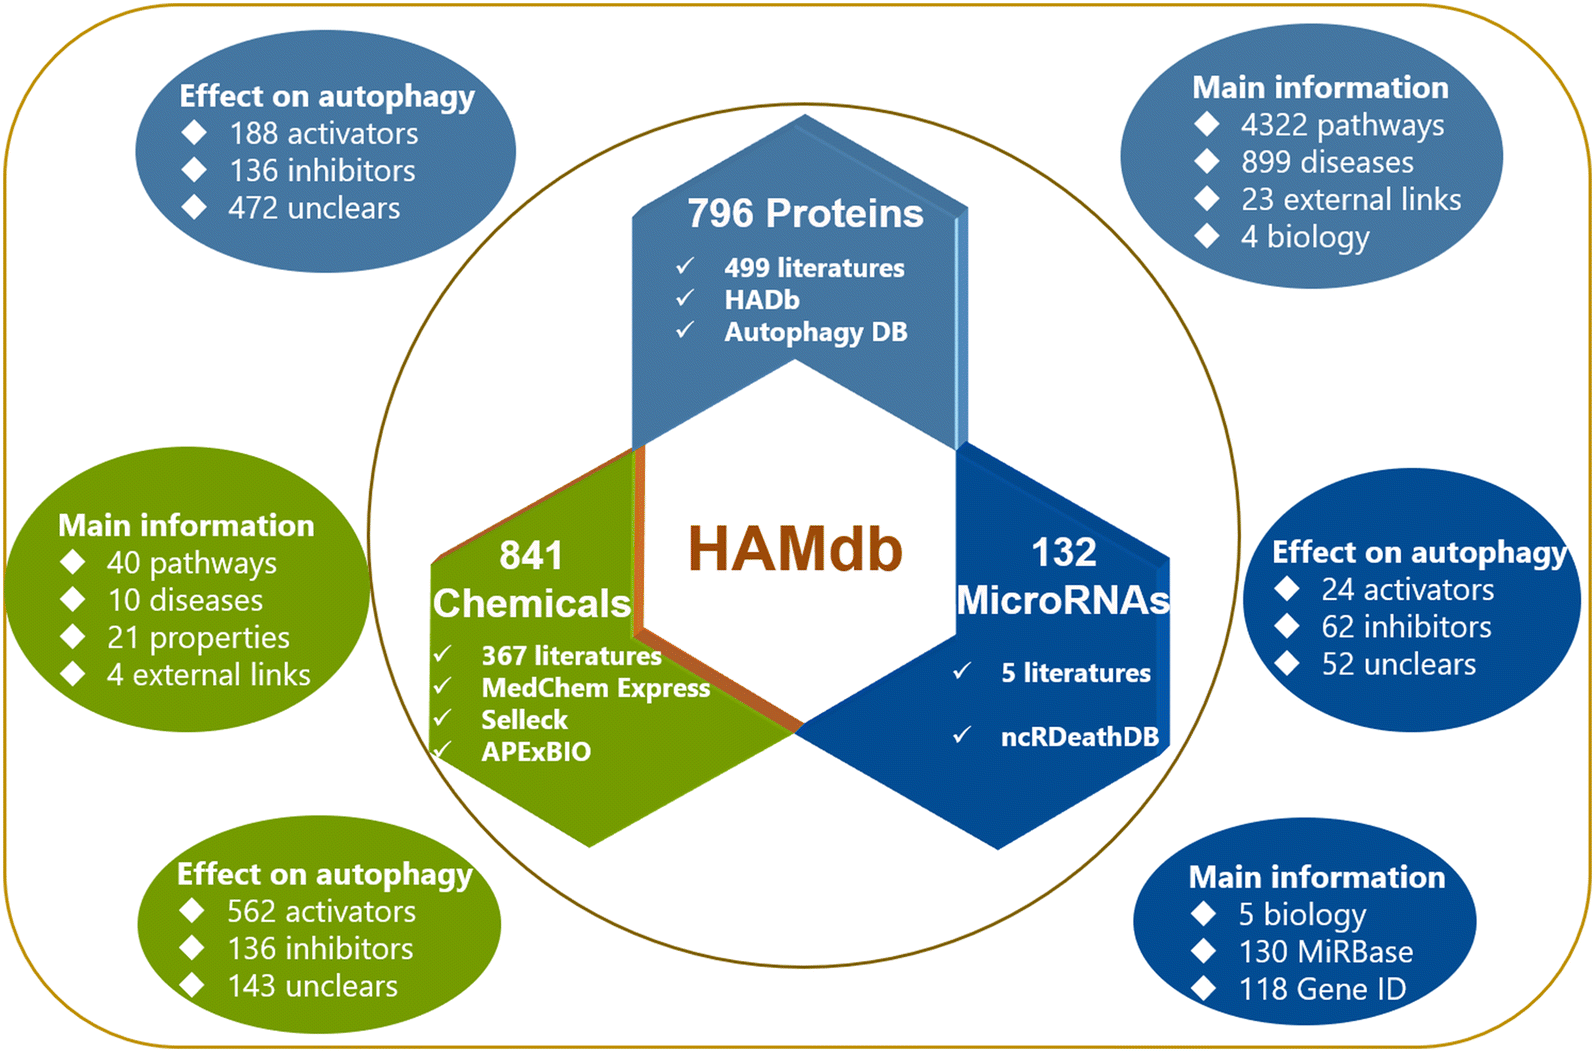 <br>
- From HAMdb, I will get information on **Uniprot ID , Symbol(gene_name), Alternative names ,and  organism.** <br>
- These information will be obtained from **protein-basic.csv** and **RNA-basic.csv**. The latter contains data about autophagy related microRNAs.<br>
- To get a better insight about the data involved of the HAMdb [visit this link](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0289-4)<br>
- Continue working on the linear algebra course.

As for the **Hela Spatial Proteome (HSP)**:<br>
- Spatial proteomics is a powerful method,with several approaches, to determine the subcellular localization of proteins (**dynamic organellar maps** is an approach that combines MS and fractionation techniques). <br>
- Since the localization of the protein affects its function, HSP mapped proteins in Hela cells according to their translocation events.<br>
- This database will be used to provide us by the **lysosomal markers**(from organellar markers tab), and the markers that are **predicted** to be in lysosomes depending on a certain prediction confidence and score (from Compact HSP tab). 

**Code explanation:**<br>
The following code was used to extract 4 fields from a previously downloaded csv file (protein-basic.csv).<br>
The csv file was an extreme mess, therefore I had to extract each field in a different way from each other.<br>
The alternative names were mixed with cells from other fields, therefore I had to put the contamination in a list and take the cells that are not part of this list.<br>
The code generated 4 files (TBU_Symbol, TBU_uniprot,TBU_alternative,TBU_homo) that were pasted and separated by the '|' as a delimiter to a file called **'TBU_protein-basic'**.

In [ ]:
#Get the features from protein-basic.csv
#TBU is an abbreviation to To Be Used and that's the form the contains the necessary info.
mylist=[]
uniprot_list = []
#junk list contains all the not-needed cells that were embedded in the alternative names (they were not alternative names)
junk_list= ['metastatic prostate cancer; primary prostate cancer', '1GAG;1I44;1IR3;1IRK;1P14;1RQQ;2AUH;2B4S;2HR7;2MFR;2Z8C;3BU3;3BU5;3BU6;3EKK;3EKN;3ETA;3W11;3W12;3W13;3W14;4IBM;4OGA;4XLV;4XSS;4XST;4ZXB;5E1S;5HHW;5J3H',
'2YS1', '1B8M;1BND', 'Ins1; LY294002; PI3K (complex); wortmannin; IGF1; PDPK1; Insulin; PTEN; INS; EGF; AKT1; Pdgf (complex); TNF; hydrogen peroxide; ILK', 'D-glucose; dexamethasone; REN; beta-estradiol; IL6; losartan potassium; AGT; candesartan; SB203580; Ins1; ACE; lipopolysaccharide; STAT3; Insulin; phorbol myristate acetate',
'advanced glycation end-products; HMGB1; TNF; advanced glycation endproducts-bovine serum albumin; APP; exenatide; GLP-1-(7-34)-amide; GCG; D-glucose; CRP; NFkB (complex); IL1B; PSEN1; AGER; S100B', '221040736;1034671294;46394126;56788407;158261143;553634;221045686;56788401;56788405;13129138;767958268;383875656;48762798;119608037;56788403;119608038;1034671292;46391586;56788399;48762794;46391582;52545786;15214282;48762796;383875657',
'hypertension']
#alter_list will be used to append all the alternative names (including alternative name #736 which will be removed from te list)
alter_list = []

#each file ('w') is used to include one field (ex Symbol, uniprot_ID, organism) these fields will be all pasted in bash.
with open('protein-basic.csv', 'r', encoding = 'latin1') as protein, open('TBU_Symbol', 'w') as output, open('TBU_uniprot', 'w') as out, open('TBU_homo', 'w') as out2:
    for line in protein:
        #The following line will be used to extract homo_sapiens from the splitted list
        line_homo = line.split(',')
        for element in line_homo:
            if element == 'Organism' or element == 'Homo sapiens (Human)':
                print(element, file= out2)
        #here I need to take the Symbol (index 0), but since some of them start with " , i need to remove it.
        Symb = line.split(',')[0]
        if not Symb.startswith('"'):
            print(Symb, file=output)
            Uniprot = line.split(',')[2]
            #it's appended to a list to replace the empty strings with 'nan'
            uniprot_list.append(Uniprot)
            uniprot_list = ["nan" if x == '' else x for x in uniprot_list]
    for element in uniprot_list:
        print(element, file = out)

#I used pandas to specify the delimiter in the output file (I didn't want commas)
df = pd.read_csv('protein-basic.csv', encoding = 'latin1')
outfile = 'protein_output'
df.to_csv(outfile,index=False, sep = '|')

with open('protein_output', 'r') as protein, open('alternative_output', 'w') as alt:
    for line in protein:
        line = line.split('|')
        if not line[5] in junk_list:
            print(line[5], file = alt)
with open('alternative_output','r') as tbu, open('TBU_alternative', 'w') as out:
    for line in tbu:
        line = line.rstrip()
        alter_list.append(line)
        alter_list = ["nan" if x == '' else x for x in alter_list]
    #remove element #736 which is a nan
    alter_list.pop(736)
    for element in alter_list:
        print(element, file = out)
#paste -d '|' TBU_Symbol TBU_uniprot TBU_alternative TBU_homo > TBU_protein-basic

In [ ]:
#Start parsing the RNA-basic.csv
#count =0
org_list = []
with open('RNA-basic.csv', 'r') as rna, open('TBU_rna1','w') as out, open('TBU_rna2','w') as output:
    for line in rna:
        line = line.split(',')
        #count+=1
        organism = line[5]
        #append to a list to replace the empty strings
        org_list.append(organism)
        org_list = ["nan" if x == '' else x for x in org_list]
        symbol = line[0]
        alternative = line[6]
        print(symbol, alternative, sep = "|", file = out)
    for element in org_list:
        print(element, file = output)
#paste -d "|" TBU_rna1 TBU_rna2 > TBU_rna      

In [ ]:
#Parsing the Hela Spacial proteome
#LFQdeep
gnames_list = []
protnames_list = []
df = pd.read_csv('LFQDeep.csv')
outfile = 'geneNames_output'
df.to_csv(outfile,index=False, sep = '|')
with open('geneNames_output', 'r') as gene, open('prot_Ids', 'w') as prot, open('protnames', 'w') as pnames, open('gnames', 'w') as gname:
    for line in gene:
        line= line.rstrip()
        line = line.split('|')
        gnames_list.append(line[3])
        gnames_list = ["nan" if x == '' else x for x in gnames_list]
        prot_Ids = line[0]
        print(prot_Ids, file = prot)
        prot_names = line[2]
        protnames_list.append(line[2])
        protnames_list = ["nan" if x == '' else x for x in protnames_list]
    for element in gnames_list:
        print(element, file = gname )
    for cell in protnames_list:
        print(cell, file = pnames)
        
paste -d '|' prot_Ids protnames gnames > TBU_LFQdeep    


#LFQFast
count = 0
df = pd.read_csv('LFQ_Fast.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as lfq, open('TBU_LFQ_Fast', 'w') as out:
    for line in lfq:
        line= line.rstrip()
        line = line.split('|')
        prot_Ids = line[0]
        prot_names = line[2]
        gnames = line[3]
        print(prot_Ids, prot_names,gnames, sep='|', file=out)


### April 22, 2020
### Tasks:
- Continue parsing Hela Spatial Proteome files to extract **protein ID, gene name, protein name**. <br>
- Continue the Linear Algebra lectures.

In [ ]:
#TMTDeep
count = 0
df = pd.read_csv('TMTDeep.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open ('transitionfile.csv', 'r') as tmt, open('TBU_TMTdeep', 'w') as out:
    for line in tmt:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        #count+=1
        print(prot_Ids, protnames,gname, sep='|', file=out)
        
#TMTFast
df = pd.read_csv('TMT_Fast.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open ('transitionfile.csv', 'r') as tmt, open('TBU_TMTfast', 'w') as out:
    for line in tmt:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        print(prot_Ids, protnames,gname, sep='|', file=out)


In [ ]:
#DynamicSilac_deep
count= 0
df = pd.read_csv('DynamicSilac_deep.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as dyn , open('TBU_DYNdeep', 'w') as out:
    for line in dyn:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        #count+=1
        print(prot_Ids, protnames,gname, sep = '|', file = out)
        

In [ ]:
#Simulated_deep
count= 0
df = pd.read_csv('SimulatedDynamics_LFQdeep.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as sim , open('TBU_SimulatedDyn_LFQdeep', 'w') as out:
    for line in sim:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        #count+=1
        print(prot_Ids, protnames,gname, sep = '|', file = out)
        

#Simulated_fast
df = pd.read_csv('SimulatedDynamics_LFQFast.csv')
outfile = 'transitionfile.csv'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile.csv', 'r') as sim , open('TBU_SimulatedDyn_LFQFast', 'w') as out:
    for line in sim:
        line = line.rstrip()
        prot_Ids = line.split('|')[0]
        protnames = line.split('|')[2]
        gname = line.split('|')[3]
        print(prot_Ids, protnames,gname, sep = '|', file = out)

In [ ]:
#Organellar markers
# count = 0
df = pd.read_csv('Organellar_markers.csv')
outfile = 'transitionfile'
df.to_csv(outfile,index=False, sep = '|')
with open('transitionfile', 'r') as org, open('TBU_organellar_markers','w') as out:
    #take the first line of the file. h stands for header
    first_line = org.readline()
    #print(first_line)
    hgene_name= first_line.split('|')[0]
    hprotein_name = first_line.split('|')[1]
    hprotein_ID = first_line.split('|')[2]
    hcompartmnet = first_line.split('|')[4]
    print(hgene_name,hprotein_ID,hprotein_name,hcompartmnet, sep = '|', file = out)
    for line in org:
        #I will only print to a the output file the lines that are related to lysosomes.
        #"lyososomes" and "Lysosomes" are not present in file
        if 'lysosome' in line or 'Lysosome' in line: 
            lysosome_line = line.rstrip()
            gene_lysosome = lysosome_line.split('|')[0]
            protname_lysosome = lysosome_line.split('|')[1]
            protId_lysosome = lysosome_line.split('|')[2]
            comp_lysosome = lysosome_line.split('|')[4]
            print(gene_lysosome,protId_lysosome,protname_lysosome,comp_lysosome, sep = '|', file = out)
            

#Compact HSP with prediction confidence
comp_list=[]
conf_list = []
df = pd.read_csv('Compact_Hela_proteome.csv')
outfile = 'transitionfile'
df.to_csv(outfile,index=False, sep = '|') 
with open('transitionfile', 'r') as org, open('TBU_compact_HSP','w') as out, open('first_cols', 'w') as out2, open('compfile', 'w') as output, open('conffile', 'w') as output2:
    first_line = org.readline()
    hgene_name= first_line.split('|')[0]
    hprotein_ID = first_line.split('|')[1]
    hprotein_name = first_line.split('|')[2]
    hcompartmnet = first_line.split('|')[7]
    hconfidence = first_line.split('|')[8]
    print(hgene_name,hprotein_ID,hprotein_name,hcompartmnet,hconfidence, sep = '|', file = out)

    for line in org:
        if 'lysosome' in line or 'Lysosome' in line: 
            lysosome_line = line.rstrip()
            gene_lysosome = lysosome_line.split('|')[0]
            protId_lysosome = lysosome_line.split('|')[1]
            protname_lysosome = lysosome_line.split('|')[2]
            print(gene_lysosome, protId_lysosome, protname_lysosome, sep = '|', file = out2)
            comp_lysosome = lysosome_line.split('|')[7]
            conf_lysosome = lysosome_line.split('|')[8]
            comp_list.append(comp_lysosome)
            comp_list = ["nan" if x == '' else x for x in comp_list]
            conf_list.append(conf_lysosome)
            conf_list = ['nan' if x == '' else x for x in conf_list]
    for element in comp_list:
        print(element, file = output)
    for element in conf_list:
        print(element, file = output2)
            
#paste -d '|' first_cols compfile conffile >datafile
#cat TBU_compact_HSP datafile > TBU_compact-HSP
       

### April 23, 2020
### Tasks:
- Start parsing the BCL2 database. Note that I have ready tables somehow from previous steps so I just need to specify the required columns from each of BCL2_table.csv, BID_table.csv, BAX_table.csv **(i.e. Gene name, Protein name, Synonyms)**. <br> I will do that on bash because it's easier in this case and can be done with just one line of code.
- It seems like I will download the non-BCL2 homologous proteins that share BH3 motif. They are important in apoptosis and cell death as well. 
- Work on extracting info from yCellDeath database .

#### BCL2DB, is a collection of sequence, structural and functional information about BCL-2 homologous and BH3-containing proteins.<br>
Discovery of the BCL-2 gene defined a new class of proto-oncogenes that block cell death without enhancing cell proliferation. **IT'S IMPORTANT TO NOTE THAT** BCL-2 homologous proteins share a similar α-helical bundle fold (the BCL-2 domain), have up to four different BH motifs (BH1-BH4), and can be either anti-apoptotic (e.g., BCL-2 and BCL-xL) or pro-apoptotic (e.g., BAX, BAK and BID). All the other (non-BCL-2 homologous) proteins possessing a functional BH3 motif are pro-apoptotic (such as the BH3-only member BIM or the BH3 motif-containing protein Atg12).


In [ ]:
ls *.csv| while read file; do cat $file | cut -d ',' -f1,2,3,5> TBU_$file ;done

In [ ]:
#Downloading the classical proteins from BH3 motif
url = 'https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBBH3only'
wget.download(url, 'BCL2DBBH3only')

In [ ]:
import bs4
from bs4 import BeautifulSoup
list_head = []
list_rows= []
with open('BCL2DBBH3only') as html_file, open('TBU_BH3_classical.csv', 'w') as out:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table', class_="tnomenclature")
    #to check how many tables are there in the site
    #len(table) #1
    #table[0] 
    for row in table[0].find_all('tr'):
        for head in row.find_all('th'):
            list_head.append(head.text)
        for cell in row.find_all('td'):
            list_rows.append(cell.text.replace(',', '|'))
    #remove 'primary function'
    list_head.pop(3)
    #remove references
    list_head = list_head[:-1]
    header = ",".join(list_head)
    print(header, file = out)
    tuples = list(zip(*[iter(list_rows)]*6)) 
    #iterate over the tuple list in order to join the cells with commas (easier to parse)
    for tup in tuples:
        #this will remove last element of the tuple (i.e. references)
        tup = tup[:-1]
        #this will print the first 3 element of the tuple and the last element (i.e. accession number)
        print(','.join(tup[:3]+tup[-1:]), file = out)

In [ ]:
#Downloading other proteins with BH3 motif
url = 'https://bcl2db.lyon.inserm.fr/BCL2DB/BCL2DBOtherBH3'
wget.download(url, 'BCL2DBOtherBH3')

In [ ]:
list_rows = []
list_head = []
with open('BCL2DBOtherBH3') as html_file, open('TBU_BH3_other.csv', 'w') as out:
    soup = BeautifulSoup(html_file, 'lxml')
    table = soup.find_all('table', class_="tnomenclature")
    #len(table) #1
    #table[0]
    for row in table[0].find_all('tr'):
        for head in row.find_all('th'):
            list_head.append(head.text)
        for cell in row.find_all('td'):
            list_rows.append(cell.text.replace(',', '|'))
    #remove 'primary function'
    list_head.pop(3)
    #remove references
    list_head = list_head[:-1]
    header = ",".join(list_head)
    print(header, file = out)
    tuples = list(zip(*[iter(list_rows)]*6)) 
    for tup in tuples:
        tup = tup[:-1]
        print(','.join(tup[:3]+tup[-1:]), file = out)





#### Note that HumanAutophagydatabase was parsed at earlier steps and information about GeneId, Name, Symbol are available.

In [ ]:
count =0
alias_list = []
with open('yApoptosis.csv', 'r', encoding = 'latin1') as csv_file, open('TBU_yApop.csv', 'w') as out:
    first_line = csv_file.readline()
    #list the header
    first_line = first_line.rstrip().split(',')
    #print specific elements
    print(first_line[1], first_line[4], first_line[2], sep = ',', file = out)
    with open('yApoptosis.csv', 'r', encoding = 'latin1') as csv_new, open('geneuniprot','w') as gp,open('alias', 'w') as alias:
        csv_reader = csv.DictReader(csv_new)
        for line in csv_reader:
            gene_name = line['gene_name']
            uniprot = line['uniprot']
            print(gene_name,uniprot, sep = ',', file = gp)
            gene_alias = line['gene_alias']
            alias_list.append(gene_alias.replace('\xa0',''))
            alias_list = ['nan' if x == '' else x for x in alias_list]
        for element in alias_list:
            print(element, file = alias)
            
#paste -d ',' geneuniprot alias > gp_alias.csv
#cat TBU_yApop.csv gp_alias.csv > TBU_yApoptosis.csv

### April 24, 2020
### Tasks:
- Continue extracting information from databases. Start with **HumanLysosomeGene database**(hLGDB collects information about human lysosomal genes and their transcriptional regulation such as transcription factor EB (TFEB) binding sites and miRNAs). It is the first resource that provides a comprehensive and accessible census of the human genes belonging to the lysosomal system. They collected and annotated genes from different resources.<br>
- Meeting with Sonja to discuss the project.<br>
- Extract information from **CASBAH database**. (caspases are proteins that coordinate apoptosis. They are the major effectors of programmed cell death. CASBAH contains information about all the currently known caspase substrates).<br>
- Extract information from **Deathbase database**(Deathbase is a database of proteins involved in cell death. It compiles relevant data on the function, structure and evolution of proteins involved in apoptosis and other forms of cell death in several organisms).

### Meeting's Summary
- Create combined list of lysosomes, cell death and autophagy genes that downloaded and extracted from different databases.<br>
- Compare the list above to the list of genes from the screens.<br>
- Sonja will send me the screens and I will take the genes that have at least 20% reduction of cell count to check whether this reduction was due to any of the 3 mechanisms or it's any other culture problem.<br>
- By gene knock down, we can see if the gene is affecting the cell count or not &#8594; check if the cause is cell death, lysosomes or autophagy.<br>
- One good article to cite is [Cell Painting](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5223290/).

In [ ]:
#parsing HumanLysosomeGene DB
count = 0
symbol_list =[]
with open('HumanLysosomeGene_table', 'r') as table, open ('symbol', 'w') as symb, open('name','w' ) as nam:
    for line in table:
        line=line.rstrip()
        line=line.split(';')
        symbol = line[0]
        name = line[1]
        print(name, file = nam)
        symbol_list.append(symbol)
        #some references are printed with the name creating an empty line in the list of symbols. 
        #replace the empty line with nan (this will be eliminated at later steps)
        symbol_list = ['nan' if x == '' else x for x in symbol_list]
    for element in symbol_list:
            print(element, file = symb)
with open('prefinal_HLG', 'r') as pre, open ('TBU_HumanLysosomeGene_DB', 'w') as tbu:
    for line in pre:
        line= line.rstrip()
        if not line.startswith('nan'):
            print(line,file = tbu)

**NOTE THAT** CASBAH database's Uniprot field is a mix between uniprot IDs and gene names. If I want to get the Uniprot IDs, I have to click on each entry. 

### Problems faced
Some of the CASBAH database entries couldn't map when ID mapping on uniprot database was performed! It's most probably because the symbol used is the official gene symbol. **NEED TO FIND A SOLUTION**

In [ ]:
#Print each organism's name at the end of its line. 
with open('CASBAH_Fulltable.csv', 'r') as full, open('TBU_CASBAH', 'w') as out:
    print('Name_CASBAH', 'Uniprot_CASBAH', 'Synonyms_CASBAH', 'Organism_CASBAH', sep = ';', file = out)
    for line in full:
        if not 'Uni Prot' in line:
            if 'HUMAN' in line or 'human' in line:
                line = line.rstrip()
                line = line.split(',')
                name = line[0]
                uniprot = line[1].split(')')[0]
                synonym = line[2].replace(';', ',')
                print(name,uniprot,synonym, 'HUMAN', sep = ';', file = out )
            elif 'MOUSE' in line:
                line = line.rstrip()
                line=line.split(',')
                name_m = line[0]
                uniprot_m = line[1].split(')')[0]
                synonym_m = line[2].replace(';', ',')
                print(name_m,uniprot_m,synonym_m,'MOUSE', sep = ';',file = out)
            elif 'RAT' in line:
                line = line.rstrip()
                line=line.split(',')
                name_r = line[0]
                uniprot_r = line[1].split(')')[0]
                synonym_r = line[2].replace(';', ',')
                print(name_r,uniprot_r,synonym_r,'RAT', sep = ';', file = out)
            else:
                line = line.rstrip()
                line=line.split(',')
                name_o = line[0]
                uniprot_o = line[1].split(')')[0]
                synonym_o = line[2].replace(';', ',')
                print(name_o,uniprot_o,synonym_o,'OTHER', sep = ';',file = out)
                

In [ ]:
#Parsing Death_base DB
#The delimiter in this database in not recognized so I will get the fields with bash commands and combine them(easier for protein_list.txt).
#Start with protein_list.txt

cat protein_list.txt | cut -f1 > ext_ID
cat protein_list.txt | cut -f2 > synonyms
cat protein_list.txt | cut -f3 > organism
cat protein_list.txt | cut -f4 > uniprotID

paste -d ';' ext_ID synonyms organism uniprotID > TBU_Deathbase_proteins
#wc -l 218


#Continue with apoptosis_list.txt

syn_list = []
uni_list = []
with open('apoptosis_list.txt', 'r') as apop, open('first_apop_columns', 'w') as out, open('middle_column','w') as out2,open('last_apop_column', 'w') as output:
    print('Uniprot_ID',file = out2)
    for line in apop:
        line=line.rstrip()
        line=line.split('\t')
        ext_ID = line[1]
        organism = line[2] #iname
        print(ext_ID,organism, sep = ';', file = out)
        pre_uniprotID = line[5]
        synonym = line[3]
        syn_list.append(synonym)
        if 'UniProtKB' in pre_uniprotID:
            pre_uniprotID = pre_uniprotID.split(':')[2]
            uniprotID = pre_uniprotID.split(']')[0]
        else:
            uniprotID = 'nan'
        uni_list.append(uniprotID)
        #remove the first element of the list because its the header and it was replaced with 'nan'. Replace it with Uniprot_ID
    uni_list.pop(0)
    for element in uni_list:
        print(element, file = out2)
    syn_list = ['nan' if x == '' else x for x in syn_list]
    for element in syn_list:
        print(element, file = output)


paste -d ';' first_apop_columns middle_column last_apop_column > TBU_Deathbase_apoptosis

### April 25, 2020
### Tasks:
- Parse the **proteinAtlasLysosome.xml** to get info on **gene name,synonyms,uniprot_ID** (an atlas of protein encoding genes. It maps all human proteins in cells.<br>
- Parse the .tsv proteinAtlas. <br>
- Parse **GO database**.
- Continue the linear algebra course.


In [ ]:
#Parsing proteinAtlasLysosome.xml. I could have used .tsv file, but xml is more fun to parse.
count = 0
myDict = {} # will hold gene name and synonyms
mylist = [] # will hold synonyms
myDict2 = {} #will hold gene name and uniprot IDs
mylist2 = [] #will hold uniprot Ids
with open('proteinAtlasLysosome.xml', 'r') as xml, open('gene_syn','w') as out, open('gene_uni', 'w') as output:
    for line in xml:
        line = line.rstrip()
        if '<name>' in line:
            line = line.split('<')[1]
            #get the gene_name
            gene_name = line.split('>')[1]
            #empty the list from the previous synonym to append a new one.
            mylist=[]
            mylist2=[]
            #some gene names do not have synonyms so I replace the synonym space with 'nan'. If I don't write this line, the gene names that do not have synonyms won't be added to myDict.
            myDict[gene_name] = 'nan'
            #same for uniprot IDs
            myDict2[gene_name] = 'nan'
        elif '<synonym>' in line:
            line = line.split('<')[1]
            pre_syn = line.split('>')[1]
            synonym= pre_syn.split('<')[0]
            #mylist is where I will store synonyms 
            mylist.append(synonym)
            #since one gene_name can have multiple synonyms so I have to join mylist for each synonyms set
            synonyms = ','.join(mylist)
            #store the synonyms for each gene_name
            myDict[gene_name] = synonyms        
        elif 'Uniprot' in line:
            pre_uni = line.split(' ')[1]
            uniprot = line.split('"')[1]
            #some gene names have more that 1 uniprot ID
            mylist2.append(uniprot)
            uniprot_IDs = ','.join(mylist2)
            myDict2[gene_name] = uniprot_IDs
    for key,value in myDict2.items(): # I could have said print(value) since I only want the uniprot. But that's for sanity check.
        print(key,value,sep = ';', file = output)
    #print them in this from:SNAPIN;BLOC1S7,BORCS3,SNAPAP
    for key,value in myDict.items():
        print(key,value,sep = ';', file = out)

####continue the rest of the code on bash####:
# echo 'gene_name' 'synonym' 'Uniprot' | tr ' ' ';' > headers
# cat gene_uni | cut -d ';' -f2 > uniIds
# paste -d ';' gene_syn uniIds > proteinAtlasFile
# cat headers proteinAtlasFile > proteinAtlasLysosome1

In [ ]:
count = 0
syn_list = []
syn_list2 = []
syn_list3 = []
with open('proteinAtlasLysosomeS.tsv') as lyso, open('proteinAtlasLysosomAl.tsv') as lyso2, open('proteinAtlasLysosomeVesicle.tsv') as ves,open('prefinalProteinAtlas', 'w') as out:
    for line in lyso:
        line=line.rstrip()
        line=line.split('\t')
        if not 'Gene' in line:
            syn_list = []
            gname = line[0]
            synonyms = line[1]
            syn_list.append(synonyms)
            synonyms = ['nan' if x == '' else x for x in syn_list]
            for element in synonyms:
                element = element.split('"')
                element = list(filter(None,element))
            synonyms = ','.join(element)
            uniprot = line[4]
            uniprot = uniprot.split('"')
            uniprot = list(filter(None,uniprot))
            uniprot = ','.join(uniprot)
            print(gname,synonyms,uniprot, sep = ';', file = out)
    for line in lyso2:
        line=line.rstrip()
        line=line.split('\t')
        if not 'Gene' in line:
            syn_list2 = []
            gname = line[0]
            synonyms = line[1]
            syn_list2.append(synonyms)
            synonyms = ['nan' if x == '' else x for x in syn_list2]
            for element in synonyms:
                element = element.split('"')
                element = list(filter(None,element))
            synonyms = ','.join(element)
            uniprot = line[4]
            uniprot = uniprot.split('"')
            uniprot = list(filter(None,uniprot))
            uniprot = ','.join(uniprot)
            print(gname,synonyms,uniprot,sep = ';', file = out)
    for line in ves:
        line=line.rstrip()
        if not 'Gene' in line:
            if 'Lysosomes' in line or 'lysosomes' in line or 'lysosome' in line or 'Lysosome' in line or 'lysosomal' in line or 'Lysosomal' in line:
                line=line.split('\t')
                syn_list3 = []
                gname = line[0]
                synonyms = line[1]
                syn_list3.append(synonyms)
                synonyms = ['nan' if x == '' else x for x in syn_list3]
                for element in synonyms:
                    element = element.split('"')
                    element = list(filter(None,element))
                synonyms = ','.join(element)
                uniprot = line[4]
                uniprot = uniprot.split('"')
                uniprot = list(filter(None,uniprot))
                uniprot = ','.join(uniprot)
                print(gname,synonyms,uniprot,sep = ';', file = out)

            
  #cat proteinAtlasLysosome1 prefinalProteinAtlas > TBU_proteinAtlasLysosome 
#final file has 1131 but they are not unique. There are 720 unique entries based on cat proteinAtlasLysosome1 prefinalProteinAtlas | cut -d ';' -f3 | sort -u | wc -l
        

**The code below takes an almost an hour to finish because goa_uniprot_all.gaf is huge!**

In [ ]:
list_autophagy = ['autophagy', 'Autophagy', 'autophagosome', 'Autophagosome',"autophagocytosis",'Autophagocytosis']
list_lysosomes = ['lysosome', 'Lysosome', 'Lysosomes', 'Lysosome', 'lysosomal', 'Lysosomal']
list_cellDeath = ['cell death', 'Cell Death','apoptosis', 'Apoptosis', 'programmed', 'Programmed']

with open('goa_uniprot_all.gaf', 'r') as goa, open('autophagy_lines','w') as auto,open('lysosome_lines','w') as lys, open('cellD_lines','w') as cell:
    for line in goa:
        line=line.rstrip()
    for element in list_autophagy:
        if element in line:
            print(line, file = auto)
    for keyword in list_lysosomes:
        if keyword in line:
            print(line, file = lys)
    for vocab in list_cellDeath:
        if vocab in line:
            print(line,file=cell)

In [ ]:
#I want the ones with unique uniprot IDs (no need for repitition)
set1 = set()
with open('autophagy_lines','r') as auto, open('TBU_autophagy','w') as out:
    for line in auto:
        line=line.rstrip()
        uniprot_ID=line.split('\t')[1]
        symbol = line.split('\t')[2]
        gene_OR_geneproduct_name = line.split('\t')[9]
        synonym = line.split('\t')[10]
        #this can be also done using nested dictionaries (it will take unique key-value pairs)
        #create a frozenset inside the big set
        if frozenset({uniprot_ID,symbol,gene_OR_geneproduct_name,synonym}) in set1:
            #If the line is in the set continue to the next line, if not then print it
            continue
        else:
            #this is to print the first line of the file
            print(uniprot_ID, symbol,gene_OR_geneproduct_name,synonym,sep =";", file = out)
            #add it to frozenset to avoid duplicates
            set1.add(frozenset({uniprot_ID, symbol,gene_OR_geneproduct_name,synonym}))

#echo 'Uniprot_ID' 'Symbol' 'DB_Object_name' 'Synonym' | tr ' ' ';' > headers
#cat headers TBU-autophagy > TBU_autophagy


### April 26, 2020
### Tasks:
- continue the two other files (lysosome_lines and cellD_lines).
- Get info from downloaded amigo files(separate files to Uniprot_IDs and Non Uniprot_IDs).
- Get info from **The_HumanAutophagy_database**.
- Upload to github (including downloaded files).

In [ ]:
set2 = set()
count = 0
with open('lysosome_lines','r') as auto, open('TBU-lysosome','w') as out:
    for line in auto:
        line=line.rstrip()
        uniprot_ID=line.split('\t')[1]
        symbol = line.split('\t')[2]
        gene_OR_geneproduct_name = line.split('\t')[9]
        synonym = line.split('\t')[10]
        if frozenset({uniprot_ID,symbol,gene_OR_geneproduct_name,synonym}) in set2:
            continue
        else:
            print(uniprot_ID, symbol,gene_OR_geneproduct_name,synonym,sep =";", file = out)
            set2.add(frozenset({uniprot_ID, symbol,gene_OR_geneproduct_name,synonym}))
      
    

In [ ]:
#remove empty synonyms
mylist = []
with open('TBU-lysosome') as tbu, open('prefinal_lysosome', 'w') as pre, open('synonyms_lysosome', 'w') as output:
    for line in tbu:
        line=line.rstrip()
        line = line.split(';')
        uniprot = line[0]
        symbol = line[1]
        name = line[2]
        print(uniprot,symbol,name, sep = ';', file = pre)
        synonym = line[3]
        mylist.append(synonym)
        mylist = ['nan' if x == '' else x for x in mylist]
    for element in mylist:
        print(element, file = output)
    
#paste -d ';' prefinal_lysosome synonyms_lysosome > lysosome
#cat headers lysosome > TBU_lysosome


In [ ]:
set3 = set()
with open('cellD_lines','r') as cell, open('TBU-cellDeath','w') as out:
    for line in cell:
        line=line.rstrip()
        uniprot_ID=line.split('\t')[1]
        symbol = line.split('\t')[2]
        gene_OR_geneproduct_name = line.split('\t')[9]
        synonym = line.split('\t')[10]
        if frozenset({uniprot_ID,symbol,gene_OR_geneproduct_name,synonym}) in set3:
            continue
        else:
            print(uniprot_ID, symbol,gene_OR_geneproduct_name,synonym,sep =";", file = out)
            set3.add(frozenset({uniprot_ID, symbol,gene_OR_geneproduct_name,synonym}))
            
#cat headers TBU-cellDeath | grep -v '^URS'> TBU_cellDeath

In [ ]:
#Parse Amigo downloaded data 
#Start with Amigo_lysosome data
synonym_uni = []
synonym_oth = []
with open('AmiGo_lysosome_geneproduct', 'r') as amigo, open('unip_gene', 'w') as out, open('organism_uni', 'w') as org, open('synonym_uni', 'w') as syn, open('otherdb_gene', 'w') as out2, open('organism_otherdb', 'w') as org_oth, open('synonym_othdb', 'w') as syn_oth:
    for line in amigo:
        line = line.rstrip()
        if line.startswith('UniProtKB'):
            line = line.split('\t')
            pre_Uniprot_ID = line[0]
            Uniprot_ID = pre_Uniprot_ID.split(':')[1]
            gene_name = line[1]
            print(Uniprot_ID, gene_name, sep = ';', file = out)
            organism = line[3]
            print(organism, file = org)
            synonym = line[2]
            synonym_uni.append(synonym)
            synonym_uni = ['nan' if x == '' else x for x in synonym_uni]
        else:
            line = line.split('\t')
            ID = line[0]
            genename = line[1]
            print(ID, genename, sep = ';', file = out2)
            Organism = line[3]
            print(Organism, file = org_oth)
            Synonym= line[2]
            synonym_oth.append(Synonym)
            synonym_oth = ['nan' if x == '' else x for x in synonym_oth]
    for element in synonym_oth:
        print(element, file = syn_oth)
    for element in synonym_uni:
        print(element, file = syn)

#echo 'Uniprot_ID' 'gene/product_name' 'Synonyms' 'Organism' | tr ' ' ';' > headers
#paste -d ';' unip_gene synonym_uni organism_uni > pre_TBU_Uniprot_Amigo_lysosome
#cat headers pre_TBU_Uniprot_Amigo_lysosome > TBU_Uniprot_Amigo_lysosome


#paste -d ';' otherdb_gene synonym_othdb organism_otherdb > pre_TBU_otherDB_Amigo_lysosome
#cat headers pre_TBU_otherDB_Amigo_lysosome > TBU_otherDB_Amigo_lysosome

In [ ]:
#Amigo_autophagy data
synonym_uni = []
synonym_oth = []
with open('AmiGo_autophagy_geneproduct', 'r') as amigo, open('unip_gene', 'w') as out, open('organism_uni', 'w') as org, open('synonym_uni', 'w') as syn, open('otherdb_gene', 'w') as out2, open('organism_otherdb', 'w') as org_oth, open('synonym_othdb', 'w') as syn_oth:
    for line in amigo:
        line = line.rstrip()
        if line.startswith('UniProtKB'):
            line = line.split('\t')
            pre_Uniprot_ID = line[0]
            Uniprot_ID = pre_Uniprot_ID.split(':')[1]
            gene_name = line[1]
            print(Uniprot_ID, gene_name, sep = ';', file = out)
            organism = line[3]
            print(organism, file = org)
            synonym = line[2]
            synonym_uni.append(synonym)
            synonym_uni = ['nan' if x == '' else x for x in synonym_uni]
        else:
            line = line.split('\t')
            ID = line[0]
            genename = line[1]
            print(ID, genename, sep = ';', file = out2)
            Organism = line[3]
            print(Organism, file = org_oth)
            Synonym= line[2]
            synonym_oth.append(Synonym)
            synonym_oth = ['nan' if x == '' else x for x in synonym_oth]
    for element in synonym_oth:
        print(element, file = syn_oth)
    for element in synonym_uni:
        print(element, file = syn)
        
#paste -d ';' unip_gene synonym_uni organism_uni > pre_TBU_Uniprot_Amigo_autophagy
#cat headers pre_TBU_Uniprot_Amigo_autophagy > TBU_Uniprot_Amigo_autophagy


#paste -d ';' otherdb_gene synonym_othdb organism_otherdb > pre_TBU_otherDB_Amigo_autophagy
#cat headers pre_TBU_otherDB_Amigo_autophagy > TBU_otherDB_Amigo_autophagy

In [ ]:
synonym_uni = []
synonym_oth = []
with open('AmiGo_cellDeath_geneproduct', 'r') as amigo, open('unip_gene', 'w') as out, open('organism_uni', 'w') as org, open('synonym_uni', 'w') as syn, open('otherdb_gene', 'w') as out2, open('organism_otherdb', 'w') as org_oth, open('synonym_othdb', 'w') as syn_oth:
    for line in amigo:
        line = line.rstrip()
        if line.startswith('UniProtKB'):
            line = line.split('\t')
            pre_Uniprot_ID = line[0]
            Uniprot_ID = pre_Uniprot_ID.split(':')[1]
            gene_name = line[1]
            print(Uniprot_ID, gene_name, sep = ';', file = out)
            organism = line[3]
            print(organism, file = org)
            synonym = line[2]
            synonym_uni.append(synonym)
            synonym_uni = ['nan' if x == '' else x for x in synonym_uni]
        else:
            line = line.split('\t')
            ID = line[0]
            genename = line[1]
            print(ID, genename, sep = ';', file = out2)
            Organism = line[3]
            print(Organism, file = org_oth)
            Synonym= line[2]
            synonym_oth.append(Synonym)
            synonym_oth = ['nan' if x == '' else x for x in synonym_oth]
    for element in synonym_oth:
        print(element, file = syn_oth)
    for element in synonym_uni:
        print(element, file = syn)
        
        
#paste -d ';' unip_gene synonym_uni organism_uni > pre_TBU_Uniprot_Amigo_cellDeath
#cat headers pre_TBU_Uniprot_Amigo_cellDeath > TBU_Uniprot_Amigo_cellDeath


#paste -d ';' otherdb_gene synonym_othdb organism_otherdb > pre_TBU_otherDB_Amigo_cellDeath
#cat headers pre_TBU_otherDB_Amigo_cellDeath > TBU_otherDB_Amigo_cellDeath


In [ ]:
#get info from The_Human_autophagy_database. 
#It has a very bad delimiter so will do it in bash.

# cat atg_genes_detail.dat | cut -f3 > symbol_TADB
# cat atg_genes_detail.dat | cut -f8 | tr ';' '.' > synonym_TADB
# cat atg_genes_detail.dat | cut -f11 | tr ';' '.' > Fullname_TADB
# cat atg_genes_detail.dat | cut -f19 > UniprotId_TADB
# paste -d ';' symbol_TADB synonym_TADB Fullname_TADB UniprotId_TADB > TheAutophagyDB

#this code will take some time. The database is large and there are a lotttt of empty lines.
synonym_list= []
name_list = []
ID_list = []
with open('TheAutophagyDB', 'r') as tbu, open('symbol_TADB', 'w') as sym, open('synonym_TADB', 'w') as syn, open('name_TADB', 'w') as name, open('ID_TADB', 'w') as ID:
    for line in tbu:
        line=line.rstrip()
        line=line.split(';')
        symbol = line[0]
        print(symbol, file = sym)
        synonym = line[1]
        synonym_list.append(synonym)
        synonym_list = ['nan' if x == '' else x for x in synonym_list]
        fullname = line[2]
        name_list.append(fullname)
        name_list = ['nan' if x == '' else x for x in name_list]
        protID = line[3]
        ID_list.append(protID)
        ID_list = ['nan' if x == '' else x for x in ID_list]
    for element in synonym_list:
        print(element, file = syn)
    for element in name_list:
        print(element, file = name)
    for element in ID_list:
        print(element,file = ID)

#paste -d ';' symbol_TADB synonym_TADB name_TADB ID_TADB > TheAutophagyDatabase
        

### April 27-29, 2020
### Tasks:
- Start learning LATEX.
- Continue linear Algebra course.

In [ ]:
#Just trying some linear algebra with python. (Doesn't have anything to do with my project)
import numpy as np

In [ ]:
A = np.array([[1, 1, 1],[3, 2, 1],[2,1, 2]])

In [ ]:
print(A)

In [ ]:
s = np.array([15, 28, 23])

In [ ]:
print(s)

In [ ]:
r = np.linalg.solve(A, s)

In [ ]:
print(r)

In [ ]:
Ainv = np.linalg.inv(A)

In [ ]:
print(Ainv)

### April 30, 2020
### Tasks:
Do the linear Algebra quiz.<br>
Had **a meeting with Sonja** and the meeting is summarized in:
1. Add the name of the database to the header of each file. (I will use the TBU_files to do this so I won't change the previous code). I think it's better not to change the original code because I need to edit the header for project-specific purpose. The original code is the more general form.<br>
2. The gene symbol could be the official gene symbol from HGNC database or it could be a non-official gene symbol (it's better to have the official gene symbol because then we can use it as a search term in a number of databases).
3. **HGNC is the HUGO Gene Nomenclature Committee**. It approves short abbreviations known as gene symbols. They make sure that each gene symbol is given one abbreviation and this facilitates the retrieval of information from databases and publications.
- **Note:** All the databases had uniprot IDs **except for HumanAutophagy database and TheHumanLysosomeGene database**. I can access the Uniprot ID in TheHumanLysosomeGene database only if I click on the symbol(this wasn't accessible using python code).
- The Gene ID that is available in the **HumanAutophagy** database can be used in the uniprot ID mapping tool because that's the entrez gene ID. I can then filter the output to get results for reviewed entries only.(Entrez Gene generates unique integers (GeneID) as stable identifiers for genes and other loci for a subset of model organisms).
- There was another group of students (emil-petter) who extracted the HGNC database along with their corresponding uniprot IDs from uniprot database. This code reads the xml file from uniprot and json file from HGNC and combines both files in a table with all info extracted. 
- I can then search the symbol and get the uniprot-ID for the entries in my downloaded databases that do not have uniprot IDs. (for **HumanLysosomeGene database**). Filter for humans (9606).
- For **Deathbase**: get all fields including process ID and the pathway family, because we need to filter away the lines that include immunity BUT NOT immunity and apoptosis.
- I checked the apoptosis_list.txt and protein_list.txt files from **Deathbase** and I found that everything in apoptosis.txt is in proteins.txt, therefore I don't need the apoptosis.txt anymore. I will use the protein_list.txt that contains all the cellDeath proteins (including apoptosis). I will just filter it according to what we agreed on in this meeting.
- For The **Gene Ontology database**, in Amigo_others, put all the rows that contain uniprot in one file and all thr ones that do not contain uniprot in another file(we can get the uniprot of these genes).

### May 1, 2020
### Tasks:
- Remove 'immunity' from Deathbase(proteins.txt) and include all fields from the original file. Also fix the names of the headers to include the name of the database.
- Download uniprot.xml and HGNC.json.
- Try to get some info about how to run protein.py, buildUniprot.py ,and buildHGNC.py from [emil-petter's repo](https://github.com/Aitslab/BioNLP/tree/master/emil_petter). 

In [ ]:
#Parse the protein_list.txt again.
#The file seemed to have more than one delimiter (tab and something else that couldn't split on the tab), therefore it was better to get the columns with bash commands than python and save into a file then parse in python.
#Start with bash commands , run the code, do some bash again.


# cat protein_list.txt | cut -f1 > ext_ID
# cat protein_list.txt | cut -f2 > synonym
# cat protein_list.txt | cut -f3 > species
# cat protein_list.txt | cut -f4 > uniprot_ID
# cat protein_list.txt | cut -f5 | tr ';' ':'> processID # replace ';' because I want to use it as a delimiter.
# cat protein_list.txt | cut -f6 | tr ';' ':'> pathway_family
#paste -d ';' ext_ID synonym species uniprot_ID processID pathway_family > edited_protein_list.txt

syn_NI_list = []
process_NI_list = []
path_NI_list = []


with open('edited_protein_list.txt', 'r') as prot, open('headers', 'w') as out, open('first3_columns_protein', 'w') as out2, open('immun_apop', 'w') as out3, open('synonyms_NI', 'w') as out4, open('processes_NI', 'w') as out5, open('paths_NI', 'w') as out6:
    for line in prot:
        if 'external_id' in line:
            line=line.rstrip()
            line=line.split(';')
            print(line[0]+'_Deathbase', line[3]+'_Deathbase',line[2]+'_Deathbase', line[1]+'_Deathbase', line[4]+'_Deathbase', line[5]+'_Deathbase',sep = ';', file = out)
        else:
            if not 'IMMUNITY'in line: #NI
                line=line.rstrip()
                line=line.split(';')
                extID_NI = line[0]
                synonym_NI = line[1]
                syn_NI_list.append(synonym_NI)
                syn_NI_list = ['nan' if x == '' else x for x in syn_NI_list]
                species_NI = line[2]
                uniprot_NI = line[3]
                print(extID_NI, uniprot_NI,species_NI, sep = ';', file = out2)
                process_NI = line[4]
                process_NI_list.append(process_NI)
                process_NI_list = ['nan' if x == '' else x for x in process_NI_list]
                path_NI = line[5]
                path_NI_list.append(path_NI)
                path_NI_list = ['nan' if x == '' else x for x in path_NI_list]
            else:
                #get the lines that have immunity and apoptosis (this will remove lines with immunity alone)
                if 'APOPTOSIS' in line:
                    line=line.rstrip()
                    line=line.split(';')
                    extID = line[0]
                    synonym = line[1]
                    species = line[2]
                    uniprot = line[3]
                    process = line[4]
                    path = line[5]
                    print(extID, uniprot,species,synonym,process,path, sep = ';', file = out3)
    for element in syn_NI_list:
        print(element, file = out4)
    for element in process_NI_list:
        print(element, file = out5)
    for element in path_NI_list:
        print(element, file = out6)
                    
    
#paste -d ';' first3_columns_protein synonyms_NI processes_NI paths_NI > file1_protein.txt
#cat file1_protein.txt immun_apop > file2_protein.txt
#cat headers file2_protein.txt > TBU_Deathbase_proteinFull_list    
    

In [ ]:
# url = 'ftp://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.xml.gz'
# wget.download(url, 'uniprot_sprot.xml.gz')
uniprot = gzip.open('uniprot_sprot.xml.gz', 'rb')
uniprot_read = uniprot.read()
uniprot.close()
output = open('uniprot_sprot.xml', 'wb')
# I write the read file into the output file.
output.write(uniprot_read)
output.close()

In [ ]:
url = 'ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/json/hgnc_complete_set.json'
wget.download(url, 'hgnc_complete_set.json')

### May 2-4, 2020
### Tasks:
- Change the headers of all the databases files (include the name of databases). 
- Try to map Entrez Gene IDs from TheHumanAutophagy DB and check if it works.

**Start with Deathbase** : merge all files generated together and change the header.

In [ ]:
#cat TBU_* > TBU_preFULL_Deathbase.csv

with open('TBU_preFULL_BCL2DB.csv','r') as tbu,open('TBU_FULL_BCL2DB', 'w') as full:
    print('Gene_name_BCL2DB', 'Protein_name_BCL2DB', 'Synonyms_BCL2DB', 'BCL2DB_acc_BCL2DB', sep = ';', file = full)
    for line in tbu:
        line=line.rstrip()
        if not "Gene name" in line:
            line=line.split(',')
            print(line[0],line[1],line[2],line[3],sep = ';', file = full)
            
            

**CASBAH DATABASE HAS BEEN FIXED BEFORE.. Go Back to April,24**

**Continue with yeastCellDeath database**

In [ ]:
with open('TBU_yApoptosis.csv', 'r') as apop, open('TBU_yApoptosis', 'w') as tbu:
    print('GeneName_ycellD', 'UniprotID_ycellD', 'GeneAlias_ycellD', sep = ';', file = tbu)
    for line in apop:
        if not 'gene_name' in line:
            line=line.rstrip()
            line=line.split(',')
            gname = line[0]
            galias = line[1]
            unip = line[2]
            print(gname,galias,unip, sep = ';', file = tbu)

**Continue with HAMdb**

In [ ]:
with open('TBU_protein-basic', 'r') as tbu, open('TBU_protein_basic', 'w') as out:
    print('Symbol_HAMdb', 'UniprotID_HAMdb', 'AlternativeNAmes_HAMdb', 'Organism_HAMdb', sep = ';', file = out)
    for line in tbu:
        if not 'Symbol' in line:
            line = line.rstrip()
            line=line.split('|')
            symbol = line[0]
            uniprot= line[1]
            altname = line[2].replace(';', ',')
            org = line[3]
            print(symbol,uniprot,altname,org, sep = ';', file = out)

            
with open('TBU_RNA', 'r') as tbu, open('TBU_RNA_basic', 'w') as out:
    print('Symbol_HAMdb', 'AlternativeNAmes_HAMdb', 'Organism_HAMdb', sep = ';', file = out)
    for line in tbu:
        if not 'Symbol' in line:
            line = line.rstrip()
            line=line.split('|')
            symbol = line[0]
            altname = line[1].replace(';', ',')
            org = line[2]
            print(symbol,altname,org, sep = ';', file = out)

**Continue with HelaSpatialProteome**

In [ ]:
count=0
#Open all files together (I am sure that all of these files have the same structure)
for names in ('DYNdeep', 'LFQdeep','LFQ_Fast', 'SimulatedDyn_LFQFast', 'SimulatedDyn_LFQdeep', 'TMTdeep', 'TMTfast'):
    with open('TBU_'+names, 'r') as tbu, open('Full_lyso_HSP', 'a') as out:
        for line in tbu:
            if 'lysosome' in line or 'lysosomes' in line or 'lysosomal' in line or 'Lysosome' in line or 'Lysosomes' in line or 'Lysosomal' in line:
                line = line.rstrip()
                line=line.split('|')
                protname = line[1].replace(',', ':').replace(';', ',')
                gname = line[2]
                protId = line[0].replace(';', ',')
                print(protId, protname,gname,sep =";", file = out) #146



In the code above, I summed up all the files from the **new HelaSpatialProteome data** that Sonja told me about. 
<br>
Since **lysosomes** will be our target in this set of data, I took(from previous codes) the entries that has to do with lysosomes only from Compact_HelaSpatialProteome and Organellar_markers. <br>
I am checking the codes below the common entries between organellar markers, compact HSP and the new HSP data.<br>
<br>
The following entry is present in compact HSP but not new HSP:<br>
RRAGC|Q9HB90|Ras-related GTP-binding protein C|Lysosome|Low <br> <br>
Also there are two entries present in compact HSP but not organellar markers. **Therefore I will make a file that sums up all the entries related to lysosomes from all HSP files I have.**


In [ ]:
#checking the overlap between the gene names of compact HSP and organellar markers as well as compact HSP and all HSP genes from the new HSp data.
count = 0
first= open('compact_genename', 'r')
#second = set(open(r'all_HSP_genename')) # set() to ensure that python iterates over the second file
third = set(open(r'markers_gene'))
for line in first:
    if not 'Gene' in line:
        if line in third: # or second
            count+=1
            print(line,count)

**In the code below** I want to split the protIds of Full_lyso_HSP because there are several IDs in the same line which would be counted as unique when compared to protIds from other files,while in fact they are not. <br>
I will save the content of Full_lyso_HSP into a dictionary where the keys are the protIds and values are the protname and gname. I will split the protIds and the keys of the dictionary (they are the same thing) and then print for each splitted protId the corresponding protname and gname.<br>
Having two for loops will generate duplicated lines but that's okay because I will put them later on in set2 so only the unique ones will be obtained.<br>
I will then look at the common and non common protIds between FullHSP and new compactHSP and print them all. Then I will look at the non common protIds between the new compactHSP file and the organellar markers. This way I'll be having all the unique Ids from all the 3 files.

In [ ]:
count = 0
set1 = set() # this will store 
full_dict = {}
set2 = set()
with open('Full_lyso_HSP' ,'r') as full:
    for line in full:
        line=line.rstrip()
        line=line.split(';')    
        protId = line[0]
        full_dict[protId] = {}
        protname = line[1]
        full_dict[protId]['protname'] = protname
        gname = line[2]
        full_dict[protId]['gname'] = gname
        #split the protId and put in a set to get unique ones only
        protsplit = protId.split(',')
        for element in protsplit:
            set1.add(element)
    for key in full_dict:
        #split the key to compare it to protId in the set and to print the rest of info of that key.
        keysplit = key.split(',')
        for element in set1:
            #if the protId in set1 matches the splittedkey, print the protname and gname of that Id. This will give duplicated Ids.
            if element in keysplit:
                print(element,full_dict[key]['protname'], full_dict[key]['gname'], sep = ';',file = open('splittedHSP_keys', 'a'))
        
        
com= open('TBU_compact-HSP', 'r') 
out = open('TBU_compact_HSP', 'w') # this is the first 3 columns of the compact data.
for line in com:
    if not 'Gene name' in line:
        line = line.rstrip()
        line=line.split('|')
        protID = line[1]
        protname = line[2]
        gname = line[0]
        print(protID,protname,gname, sep = ';', file = out)
        

with open('TBU_organellar_markers', 'r') as orgn, open('TBU_organellarmarkers', 'w') as out2:
    for line in orgn:
        if not 'Gene name' in line:
            line = line.rstrip()
            line=line.split('|')
            protID = line[1]
            protname = line[2]
            gname = line[0]
            print(protID,protname,gname, sep = ';', file = out2)
        
        
splt = set(open(r'splittedHSP_keys'))
new_com = set(open('TBU_compact_HSP', 'r'))
org = set(open(r'TBU_organellarmarkers'))
with open('TBU_ALL_HSP','w') as output:
    print('ProteinID_HSP','ProteinName_HSP', 'GeneName_HSP', sep = ';', file = output)
    for line in new_com:
        line=line.rstrip()
        if line in splt:
            set2.add(line)
        else:
            set2.add(line)
    for line in splt:
        line=line.rstrip()
        if not line in new_com:
            set2.add(line)
    for line in org:
        line=line.rstrip()
        if not line in new_com:
            set2.add(line)
    for element in set2:
        print(element,file = output)         
    

  
            

**Continue with TheAutophagyDatabase**

In [ ]:
with open('TheAutophagyDatabase','r') as tbu, open('TBU_TheAutophagy_DB', 'w') as out:
    print('UniprotId_TADB', 'Symbol_TADB', 'Synonyms_TADB', 'FullName_TADB', sep = ';', file = out)
    for line in tbu:
        if not 'synonym' in line:
            line = line.rstrip()
            line=line.split(';')
            symbol = line[0]
            synonym = line[1]
            name = line[2]
            protID = line[3]
            print(protID, symbol,synonym,name, sep = ';', file = out)
            

**Continue with HumanLysosomeGene database**

In [ ]:
with open('TBU_HumanLysosomeGene_DB', 'r') as lys, open('TBU_TheHumanLysosomeGene','w') as out:
    print('Symbol_HLG', 'Name_HLG', sep = ';', file = out)
    for line in lys:
        if not 'Symbol' in line:
            line=line.rstrip()
            line=line.split(';')
            symbol = line[0]
            name = line[1]
            print(symbol,name , sep = ';' ,file = out)

### NOTE:
In the code below, I tried to map the entrez IDs to get uniprot IDs from uniprot(saved into **mapped_uniprot_HADB**).There were **repeated entrez IDs** (originally in TBU_HumanAutophagy_DB were *232*). These Ids when mapped to uniprot, *222* entries were obtained because 10 of them were repeated. I took the unique ones and saved them to **TBU_HADB**.

**Continue with TheHumanAutophagyDatabase**

In [ ]:
#I will take the information associated with the mapped entrezIDs from the original file (TBU_HumanAutophagy_DB).
entrez_uniprot = {} # will hold the entrezID from the mapped entries.
myDict = {} #this will be the big dictionary that will hold entGeneIDs, name , uniprotID, symbol from the original file.
with open('TBU_HumanAutophagy_DB', 'r') as tbu, open('mapped_uniprot_HADB','r') as mapped, open('TBU_New_HADB', 'w') as out:
    print('GeneId_HADB', 'Uniprot_HADB','Name_HADB','Symbol_HADB', sep = ';', file = out)
    for line in mapped:
        if not 'yourlist' in line:
            line=line.rstrip()
            line=line.split('\t')
            entrezID= line[0]
            uniprot = line[1]
            entrez_uniprot[uniprot] = entrezID
    for line in tbu:
        if not 'GeneId' in line:
            line=line.rstrip()
            line=line.split(';')
            entGeneID = line[0]
            myDict[entGeneID] = {}
            name = line[1]
            myDict[entGeneID]['name'] = name
            symbol=line[2]
            myDict[entGeneID]['symbol'] = symbol
    for uniprot,entrezID in entrez_uniprot.items():
        if entrezID in myDict:
            print(entrezID, uniprot,myDict[entrezID]['name'], myDict[entrezID]['symbol'], sep = ';', file = out)
            
#apparently the repeated entrez Ids from the original file were reported only once when mapped. That's why I got 222 instead of 232.         

**Continue with proteinAtlasLysosome**

In [ ]:
with open('TBU_proteinAtlasLysosome', 'r') as tbu, open('TBU_ProteinAtlasLysosomes', 'w') as out:
    print('GeneName_PAL', 'Synonym_PAL','Uniprot_PAL', sep = ';', file = out)
    for line in tbu:
        if not 'gene_name' in line:
            line=line.rstrip()
            line=line.split(';')
            gname = line[0]
            synonym=line[1]
            Uniprot = line[2]
            print(gname,synonym,Uniprot, sep = ';', file = out)
            

**Continue with GOA**

In [ ]:
count = 0
for names in ('autophagy', 'cellDeath', 'lysosome'):
    with open('TBU_'+names, 'r') as tbu, open('TBU_New_'+names, 'w') as out:
        print('UniprotID_goa', 'Symbol_goa', 'DBObject_goa','Synonym_goa', sep = ';', file = out)
        for line in tbu:
            if not 'Uniprot_ID'in line:
                line = line.rstrip()
                line=line.split(';')
                uniprot = line[0]
                symbol = line[1]
                DB_obj = line[2]
                synonym = line[3]
                print(uniprot, symbol, DB_obj, synonym, sep = ';', file = out)
        

**Continue with Amigo**

In [ ]:
for names in ('autophagy', 'cellDeath', 'lysosome'):
    with open('TBU_Uniprot_Amigo_'+names, 'r') as tbu, open('TBU_New_UniprotAmigo_'+names, 'w') as out:
        print('UniprotID_Amigo', 'Gene/ProductName_Amigo', 'Synonym_Amigo', 'Organism_Amigo', sep = ';', file = out)
        for line in tbu:
            if not 'Uniprot_ID' in line:
                line=line.rstrip()
                line=line.split(';')
                uniprot = line[0]
                geneprod = line[1]
                synonym = line[2]
                organism = line[3]
                print(uniprot,geneprod,synonym,organism,sep = ';', file = out)
                

In [ ]:
#ODB is other databases.
for names in ('autophagy', 'cellDeath', 'lysosome'):
    with open('TBU_otherDB_Amigo_'+names, 'r') as tbu, open('TBU_UniprotSyn_ODB_'+names, 'w') as out, open('TBU_NewAmigo_ODB_'+names, 'w') as out2:
        print('OtherDB_ID_Amigo', 'Gene/ProductName_Amigo', 'UniprotID_Amigo', 'Organism_Amigo', sep = ';', file = out)
        print('OtherDB_ID_Amigo', 'Gene/ProductName_Amigo', 'Synonym_Amigo', 'Organism_Amigo', sep = ';', file = out2)
        for line in tbu:
            if not 'Synonyms' in line:
                if 'UniProtKB' in line:
                    line=line.rstrip()
                    line=line.split(';')
                    otherID = line[0]
                    geneprod = line[1]
                    pre_uniprot = line[2].split(':')[1]
                    uniprot = pre_uniprot.split('|')[0]
                    organism = line[3]
                    print(otherID,geneprod,uniprot,organism, sep = ';', file = out)
                else:
                    line=line.rstrip()
                    line=line.split(';')
                    otherID = line[0]
                    geneprod = line[1]
                    synonym = line[2]
                    organism = line[3]
                    print(otherID,geneprod,synonym,organism, sep = ';', file = out2)
                    

### May 5,2020
### Tasks:
- Get the buildUniprot.py and buildHGNC.py running.
- Access Marcus's server to run buildDict.py.
- Fix HSP script above.

#### Steps for running buildHGNC.py and buildUniprot.py:
1. Add **#!/usr/bin/env python3** line to each of the scripts and to protein.py (class).
2. Put all the scripts in the same directory a long with the downloaded databases.
3. chmod the scripts (except protein.py because it's a class so no need to run it) and run them.

#### Steps for accessing Marcus's server:
1. Clone BioNLP repository to the computer. (git clone)
- Go to marcus> dictionarytagger > mention-index-py4j.
- Run inside the repo: "git submodule update --init --recursive" because dicoria is a submodule and needs to be fetched from its source repo.
- run ./gradlew build.
- run ./gradlew run. (now I am inside the server)
- open another terminal to run buidlDict.py.

### May 6-10,2020
### Tasks:
- Continue trying to run buildDict.py.
- Start merging databases that belong to the same category together.

**Emil and Petter's code**:<br>
I contacted Emil and Petter because the code was throwing a mentionindex error. It turned out that there's no need to keep mentionindex lines in the code. <br>
Have hgnc.out and uniprot.out together with buildDict.py in the same directory.<br>
buildDict.py was modified to get columns about HGNC symbol, uniprot ID, taxonomic ID. It had originally the LUGE_ID and the protein name only. **SAVED AS buildDict2.py** <br>
**If I want to add something else to the table (e.g. protein names)** I should add at the end in "index.write(CommaSeparate(entry.names))".<br>
**Output** generated is called 'index.txt'.

**Start with Autophagy databases**:<br>
1. Go
- HAMdb
- The Autophagy database
- Human Autophagy database

**Notes**<br>
- TBU_TheAutophagy_DB **has a lot of 'nan'** proteinIDs. I will take them to another file and keep the ones with uniprotIDs.<br>
&#8594; It has 52052 ID lines out of which 36362 are 'nan' and 15690 are uniprot IDs. <br>
&#8594; Uniprot IDs are in 1st column.


- TBU_protein_basic from HAMdb **has two 'nan'** only and will be saved to another file.<br>
&#8594; It has 797 ID lines out of which 2 are 'nan' and 795 are uniprot IDs. <br>
&#8594; Uniprot IDs are in the second column.


- TBU_New_HADB **does not have 'nan'** proteinIDs (I have mapped its entries previously).<br>
&#8594; It has 222 lines; 222 uniprot IDs.<br>
&#8594; Uniprot IDs are in the second column.


- TBU_New_autophagy from The_GO_Resource_database(TBU_goa_files) **doesn't have 'nan'**. <br>
&#8594; It has 20056 lines; 20056 uniprot IDs.<br>
&#8594; Uniprot IDs are in the first column.


- TBU_New_UniprotAmigo_autophagy from The_GO_Resource_database (Amigo_UniprotIDs) **doesn't have 'nan'**.<br>
&#8594; It has 6800 lines;6800 uniprot IDs.<br>
&#8594; Uniprot IDs are in the first column.


- TBU_UniprotSyn_ODB_autophagy from The_GO_Resource_database (Amigo_UniprotIDs) **doesn't have 'nan'**.<br>
&#8594; It has 117 lines; 117 uniprot IDs.<br>
&#8594; Uniprot IDs are the third column.


- TBU_NewAmigo_ODB_autophagy from The_GO_Resource_database(TBU_Amigo_files) **doesn't have UNIPROT IDs**. <br>
&#8594; It has 3146 lines; 3146 symbols.<br>
&#8594; These symbols will be mapped to uniprot if needed.<br>

In [ ]:
#Step 1 , remove 'nan' uniprot IDs
count = 0
with open('TBU_TheAutophagy_DB','r') as tbu,open('TBU_TheAutophagyDB_clean', 'w') as clean, open('TheAutophagyDB_nan', 'w') as nan:
    for line in tbu:
        line=line.rstrip()
        line=line.split(';')
        unipID = line[0]
        symbol = line[1]
        synonym = line[2]
        fullname = line[3]
        if not 'nan' in unipID:
            print(unipID,symbol,synonym,fullname, sep = ';', file = clean)
        else:
            print(unipID,symbol,synonym,fullname, sep = ';', file = nan)
            
            
with open('TBU_protein_basic', 'r') as TBU, open('TBU_proteinbasicHAMdb_clean', 'w') as clean, open('proteinbasicHAMdb_nan', 'w') as nan:
    print('UniprotID_HAMdb','Symbol_HAMdb','AlternativeNAmes_HAMdb','Organism_HAMdb', sep = ';', file = nan)
    for line in TBU:
        line=line.rstrip()
        line=line.split(';')
        unipID = line[1]
        symbol = line[0]
        altname = line[2]
        org = line[3]
        if not 'nan' in unipID:
            print(unipID,symbol,altname,org, sep = ';', file = clean)
        else:
            print(unipID,symbol,altname,org, sep = ';', file = nan)
    
    

### P.S.:
This is the workflow that should be followed when dealing with entries that do not have gene IDs from The Autophagy database **TBU_TheAutophagy_DB**, The Amigo Search results **TBU_NewAmigo_ODB_autophagy** and ENSEMBL symbols from **TBU_TheAutophagy_DB**.
<img src="Workflow.png">
1. The Autophagy database doesn't have a field about organisms. I **shouldn't use Symbols** to map to uniprot because this will map them to all organisms (regardless if they are in the database or not). Since the database has specific species (**NOT PROVIDED**) then it's better to find another identifier than the Symbols. <br>
- Map the ENSEMBL protein IDs for the entries that do not have uniprot IDs yet have the ENSEMBL IDs because these are unique (ENS[species prefix][feature type prefix][a unique eleven digit number]). If the missing uniprot doesn't have ENSEMBL Ids in the symbols but have entrez gene IDs, then map the entrez. Save reviewed and unreviewed as well as the ones that didn't map in separate files. 
- ENSEMBL IDs are in file called **mapENStoUni** (10492). Save reviewed to **Full_reviewed_mapped ENS**. Save unreviewed to **Full_unreviewed_ENS**.
- ENtrez IDs are in file called **Entrez_maptoUni**. Save reviewed into **reviewedEntrez_mappedAuto**. Save unreviewed into **UnreviewedEntrez_mappedAuto**. Save the ones that didn't map to **Unmapped_Entrez_Auto**.
- I will take the entries corresponding to humans and yeast from TBU_NewAmigo_ODB_autophagy and map them to uniprot, then get the results related to humans and yeast. **WE ARE DOING THAT BECAUSE**,AGAIN, I can't map the symbols as this would give imprecise results concerning the organisms I have from the Amigo search tool. SINCE THEY DO NOT HAVE ANY OTHER IDENTIFIER e.g. Entrez/Refseq..etc, so I will take entries related to humans and yeast (model organism).
- **TAKE THE PRIMARY GENE NAME AS THE SYMBOL**.
- Split **TBU_NewAmigo_ODB_autophagy** to 2 organisms' files and map their entries(symbols and synonyms) to uniprot, then filter according to the organisms: <br>
&#8594;NewAmigo_ODB_Homo &#8594; call the files **Reviewed_human_AmigoODB** and **Unreviewed_human_AmigoODB**.<br>
&#8594;NewAmigo_ODB_Sacch &#8594; call the files **Reviewed_Sacch_AmigoODB**. There was no unreviewed Sacch.<br>
- Those that didn't map from both humans and yeast, save to **unmapped_SacchHomoAmigo_ODB**.

**Start with mapping ENS IDs** .. split them to 10 files (1000 ENS entries each, except the last one 492). <br>
**GOT** 4604 unreviewed entries and 5721 unmapped entries out of 10492 total ENSEMBL IDs.

In [ ]:
with open('mapENStoUni', 'r') as pinfile:
    lines = pinfile.readlines() # create list of lines (ENS IDs)
    count = 0
    for i in range(0,len(lines), 1000): # to print each 1000 lines to a separate file.
        count+=1
        outfileName = 'output_' + str(count)
        try: #try, except are used because the number of lines in the original file is 10492. If I want to print each 1000 lines in a file then the last file will give syntax error because the number of lines are less than 1000.
            with open(outfileName, 'w') as poutfile:
                for line in lines[i:i+1000]:
                    poutfile.write(line)
        except: #if the file doesn't have 1000 lines.
            with open(outfileName, 'w') as poutfile:
                for line in lines[i:]:
                    pooutfile.write(line)
        #Use try,except when there's a time that I want to avoid an error tha I expect to happen.    

Take The **Unmapped_ENS.txt** and see if they have entrez IDs in the original file **atg_genes_detail.dat**.

In [ ]:
auto_dict = {}
ens_list = []
with open('Unmapped_ENS.txt') as ens, open('atg_genes_detail.dat') as auto:
    for line in auto:
        line= line.rstrip()
        line= line.split('\t')
        if not 'gene_id' in line:
            entrez = line[6]
            symbol = line[2]
            auto_dict[symbol] = entrez
    for line in ens:
        line=line.rstrip()
        ens_list.append(line)
    for element in ens_list:
        if element in auto_dict:
            print(element, auto_dict[element])    
            
#WHAT I GOT FROM THIS CODE SHOWS THAT THE UNMAPPED ENSEMBL IDs DO NOT HAVE ENTREZ IDs. 



**Check if the symbols with missing uniprot Ids that do not have ENSEMBL IDs, have entrez IDs**.

In [ ]:
with open('atg_genes_detail.dat') as auto, open('Entrez_maptoUni', 'w') as out:
    lines = auto.readlines()[1:]
    for line in lines:
        line=line.rstrip()
        line=line.split('\t')
        if not 'ENS' in line[2]: #line 2 is the symbols line
            if line[18] == '': #line 18 is the uniprot ID.
                if not '0' in line[6]: #line 6 is the entrez ID
                    #print(line[2],line[6], line[18])
                    print(line[6], file = out) #526
                           

### NOTES:

Mapping **Entrez_maptoUni** gave 2 reviewed , 228 unreviewed, and 183 unmapped identifiers.

- Will combine reviewed from **reviewedEntrez_mappedAuto** and **Full_reviewed_mappedENS** together. Save to **ENSENT_FullReviewedAUTO_nan** to merge with other databases later on.<br>


In [ ]:
synonym_list =[]
synonym_list2 = []
with open('reviewedEntrez_mappedAuto') as ent,open('Full_reviewed_mappedENS') as ens, open('synonyms_ENS', 'w') as out, open('prefinal_ENT', 'w') as output,open('prefinal_ENS','w') as output2:
    for line in ent:
        if not 'your' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprot = line[1]
            gsym = line[5].split(' ') # the primary name and synonym are separated by space
            symbol = gsym[0]
            synonym = gsym[1]
            protname = line[4].replace(';', ',')
            organism = line[6]
            print(uniprot,symbol,protname,organism,synonym, sep = ';',file = output)
    for line in ens:
        synonym_list = []
        if not 'your' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprot = line[2]
            gsym = line[6].split(' ')
            symbol = gsym[0]
            protname = line[5].replace(';', ',')
            organism = line[7]
            print(uniprot,symbol,protname,organism, sep = ';', file = output2)
            synonym = gsym[1:] # separate synonyms from primary gene name.
            for element in synonym:
                #get each set of synonyms separately
                synonym_list.append(element)
                synonym = ','.join(synonym_list)
            synonym_list2.append(synonym)         
    synonym_list2 = ["nan" if x == [] else x for x in synonym_list2] #remove [] from the list
    for element in synonym_list2:
        print(element, file = out)
            
            
#paste -d ';' prefinal_ENS synonyms_ENS > Ensembl_rev_separated
#cat Ensembl_rev_separated prefinal_ENT > ENSENT_FullReviewedAUTO_nan ##save to mapENSENT_files
    
    

In [ ]:
count = 0
import re
with open('TBU_NewAmigo_ODB_autophagy') as odb, open('NewAmigo_ODB_Homo', 'w') as homo,open('NewAmigo_ODB_Sacch', 'w') as sac:
    for line in odb:
        line = line.rstrip()
        line=line.split(';')
        gname = line[1]
        if 'Homo sapiens' in line: #there are some protein complexes
            gnameH = gname.split('_')[0] #remove _human or _9606
            if not 'abeta' in gnameH: #that's one full name that doesn't need to be split
                gnameH= gnameH.split('-')
                for element in gnameH:
                    print(element, file = homo) # map to uniprot and take humans only
        elif 'Saccharomyces cerevisiae S288C' in line:
            print(gname, file = sac) #map to uniprot and filter for Saccharomyces. #227
            


### NOTES:
Mapping **NewAmigo_ODB_Sacch** gave 227 reviewed, no unreviewed and 1 unmapped.

Mapping **NewAmigo_ODB_Homo** gave 12 reviewed, 60 unreviewed and 2 unmapped.

- Combine the **Reviewed_Sacch_AmigoODB** and **Reviewed_human_AmigoODB** save both to **Fullreviewed_HomoSacch_AmigoODB**.

In [ ]:
synhuman_list = []
synhuman_list2 = []
synSac_list = []
synSac_list2 = []

with open('Reviewed_human_AmigoODB') as human, open('Reviewed_Sacch_AmigoODB') as sac,open('synonym_HumanSac', 'w') as out, open('PreFullreviwed_HomoSacch_AmigoODB', 'w') as out2:
    for line in human:
        synhuman_list = []
        if not 'your' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprot = line[1]
            protname = line[4].replace(';', ',')
            organism = line[6]
            gsyn = line[5].split(' ')
            symbol = gsyn[0]
            print(uniprot,symbol,protname,organism, sep = ';',file = out2)
            synonym = gsyn[1:]
            for element in synonym:
                #get each set of synonyms separately
                synhuman_list.append(element)
                synonym = ','.join(synhuman_list)
            synhuman_list2.append(synonym)         
    synhuman_list2 = ["nan" if x == [] else x for x in synhuman_list2] #remove [] from the list
    for element in synhuman_list2:
        print(element, file = out)
    
    for line in sac:
        synSac_list = []
        if not 'your' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprot = line[1]
            protname = line[4].replace(';', ',')
            organism = line[6]
            print(uniprot,symbol,protname,organism, sep = ';',file = out2)
            gsyn = line[5].split(' ')
            symbol = gsyn[0]
            synonym = gsyn[1:]
            for element in synonym:
                #get each set of synonyms separately
                synSac_list.append(element)
                synonym = ','.join(synSac_list)
            synSac_list2.append(synonym)         
    synSac_list2 = ["nan" if x == [] else x for x in synSac_list2] #remove [] from the list
    for element in synSac_list2:
        print(element, file = out)
            
#paste -d ';' PreFullreviwed_HomoSacch_AmigoODB synonym_HumanSac > Fullreviwed_HomoSacch_AmigoODB    
    

### START MERGING
In the code below I will merge the databases by looking at the **overlaped** and **non-overlapped** lines between files.

In [ ]:
count = 0
dict_prot ={}
dict_aut = {}
with open('TBU_proteinbasicHAMdb_clean', 'r') as prot, open('TBU_TheAutophagyDB_clean', 'r') as auto, open('over_HA', 'w') as two:
    lines = auto.readlines()[1:] #remove the header of the file. readlines() generates a list of lines.
    for line in lines:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_aut[uniprotID] = {}
        Symbol = line[1]
        dict_aut[uniprotID]['Symbol'] = Symbol
        synonym = line[2]
        dict_aut[uniprotID]['Synonym'] = synonym
        fullname = line[3]
        dict_aut[uniprotID]['Fullname'] = fullname
    lines = prot.readlines()[1:] # remove file's header
    for line in lines:
        line=line.rstrip()
        line=line.split(';')
        uniprot = line[0]
        dict_prot[uniprot] = {}
        symbol = line[1]
        dict_prot[uniprot]['symbol'] = symbol
        altern = line[2]
        dict_prot[uniprot]['alternative'] = altern
        org = line[3]
        dict_prot[uniprot]['organism'] = org  
    for key in dict_prot:
        if key in dict_aut:
            print(key,dict_prot[key]['symbol'],dict_prot[key]['alternative']+','+dict_aut[key]['Synonym'] , dict_aut[key]['Fullname'],dict_prot[key]['organism'],sep = ';', file = two)      
        else:
            print(key,dict_prot[key]['symbol'],dict_prot[key]['alternative'],'nan', dict_prot[key]['organism'],sep = ';', file = two)
    for key in dict_aut:
        if not key in dict_prot:
            print(key,dict_aut[key]['Symbol'],dict_aut[key]['Synonym'],  dict_aut[key]['Fullname'],'nan',sep = ';', file = two)
# The generated Overlap_HAMdbAutodb has 'commonUniprotIDs', 'Symbol(was the same in both files)', 'alternative_HAMdb', 'organism_HAMdb', 'Synonym_auto', 'Fullname_auto'  
# It contains all unique overlapped and non-overlapped lines from both files.

#clean the file above by removing the repeated synonyms/names..etc and keep the unique ones per field.
import re

with open('over_HA', 'r') as test, open('Overlap_HAMdbAuto','w') as over:
    for line in test:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        org = line[4]
        name = line[3]
        alt = line[2]
        #this will split the synonyms and alternatives into lists, each on a line.
        alt = alt.splitlines()
        #loop over the list (alt) of strings to print each list's content on a line. Each list has a string and will be printed.
        for line in alt:
            line=line.strip()
            #split on the multiple delimiters in synonyms. Will be automatically replaced by commas. I need to do this in order to add them all into a set and take unique synonyms for each uniprot ID.
            synonymlist = set(re.split('[;|,]', line))
        #save each set content on a line (NOTICE THAT I STARTED WITH THE JOIN THEN I LOOPED).
        all_synonyms=','.join(str(x) for x in synonymlist)
        print(uniprot,symbol,all_synonyms,name,org, sep = ';', file = over)
        
            

**Merge The file from the prevous code with Goa Autophagy file**.

Connect names with '|' because some names have comma as part of the name.

In [ ]:
count = 0
goa_auto = {}
dict_over = {}
with open('Overlap_HAMdbAuto', 'r') as over, open('TBU_New_autophagy', 'r') as goa, open('over_HG', 'w') as test:
    lines = goa.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split(';')
        Uniprotgo = line[0]
        goa_auto[Uniprotgo] = {}
        Symbolgo = line[1]
        goa_auto[Uniprotgo]['Symbol'] = Symbolgo
        name = line[2]
        goa_auto[Uniprotgo]['name'] = name
        Synonym = line[3]
        goa_auto[Uniprotgo]['Synonym'] = Synonym  
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for key in dict_over:
        if key in goa_auto:
            print(key,goa_auto[key]['Symbol']+','+dict_over[key]['symbol'],dict_over[key]['alternative']+','+goa_auto[key]['Synonym'],goa_auto[key]['name']+'|'+dict_over[key]['fullname'], dict_over[key]['org'], sep = ';', file = test)
        else:
            print(key, dict_over[key]['symbol'], dict_over[key]['alternative'], dict_over[key]['fullname'], dict_over[key]['org'], sep = ';', file = test)
    for key in goa_auto:
        if not key in dict_over:
            print(key, goa_auto[key]['Symbol'], goa_auto[key]['Synonym'],goa_auto[key]['name'], 'nan', sep = ';' , file = test)
 

            
import re

with open('over_HG', 'r') as test, open('Overlap_GoaOver','w') as over:
    for line in test:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        org = line[4]
        name = line[3]
        namelist = set(re.split('[|]', name))
        alt = line[2]
        alt = alt.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(re.split('[|,]', line))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[|,]', line))         
        #save each set content on a line (NOTICE THAT I STARTED WITH THE JOIN THEN I LOOPED).
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,all_synonyms,all_names,org, sep = ';', file = over)    



**Merge The file from the prevous code with HumanAutophagy database file.**

In [ ]:
count =0 
dict_over = {}
dict_hadb = {}

with open('Overlap_GoaOver', 'r') as over, open('TBU_New_HADB', 'r') as tbu, open('over_GHA', 'w') as out:
    lines = tbu.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split(';')
        Uniprot = line[1]
        dict_hadb[Uniprot] = {}
        Symbol = line[3]
        dict_hadb[Uniprot]['Symbol'] = Symbol
        name = line[2]
        dict_hadb[Uniprot]['name'] = name
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for key in dict_hadb:
        if key in dict_over:
            print(key, dict_hadb[key]['Symbol']+','+dict_over[key]['symbol'], dict_over[key]['alternative'], dict_hadb[key]['name']+'|'+dict_over[key]['fullname'], dict_over[key]['org'], sep = ';', file = out)
        else:
            print(key, dict_hadb[key]['Symbol'], 'nan', dict_hadb[key]['name'],'nan', sep = ';', file = out)
    
    for key in dict_over:
        if not key in dict_hadb:
            print(key, dict_over[key]['symbol'], dict_over[key]['alternative'],dict_over[key]['fullname'], dict_over[key]['org'], sep = ';', file = out)

import re
with open('over_GHA', 'r') as gha, open('Overlap2_hadbOver', 'w') as over:
    for line in gha:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        org = line[4]
        name = line[3]
        name = name.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(re.split('[|,:]', line))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[;|,/:]', line))
        for line in name:
            line=line.rstrip()
            namelist = set(re.split('[|]', line))            
        #save each set content on a line (NOTICE THAT I STARTED WITH THE JOIN THEN I LOOPED).
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,all_synonyms,all_names,org, sep = ';', file = over)    
        
        

**Merge The file from the previous code with files obtained from Amigo search.**

In [ ]:
count =0 
dict_over = {}
dict_amigo = {}

with open('Overlap2_hadbOver', 'r') as over, open('TBU_New_UniprotAmigo_autophagy', 'r') as tbu, open('over_am', 'w') as out:
    lines = tbu.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split(';')
        Uniprot = line[0]
        dict_amigo[Uniprot] = {}
        Symbol = line[1]
        dict_amigo[Uniprot]['Symbol'] = Symbol
        preSynonym = line[2]
        if ':' in preSynonym:
            Synonym = preSynonym.split(':')[1]
        else:
            Synonym = preSynonym
        dict_amigo[Uniprot]['Synonym'] = Synonym
        organism = line[3]
        dict_amigo[Uniprot]['organism'] = organism
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for key in dict_amigo:
        if key in dict_over:
            print(key, dict_amigo[key]['Symbol']+','+dict_over[key]['symbol'], dict_over[key]['alternative']+','+dict_amigo[key]['Synonym'], dict_over[key]['fullname'], dict_amigo[key]['organism']+','+dict_over[key]['org'], sep = ';', file = out)
        else:
            print(key, dict_amigo[key]['Symbol'], dict_amigo[key]['Synonym'],'nan',dict_amigo[key]['organism'], sep = ';', file = out)    
    for key in dict_over:
        if not key in dict_amigo:
            print(key, dict_over[key]['symbol'], dict_over[key]['alternative'],dict_over[key]['fullname'], dict_over[key]['org'], sep = ';', file = out)

import re
with open('over_am', 'r') as am, open('Overlap3_amigoOver', 'w') as over:
    for line in am:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        alt = line[2]
        alt = alt.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(re.split('[|,:]', line))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[;|,/:]', line))
        for line in org:
            line=line.rstrip()
            orglist = set(re.split('[;|,/:]', line)) 
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_synonyms,name,all_org, sep = ';', file = over)    
           

In [ ]:
count =0 
dict_over = {}
dict_amigo = {}

with open('Overlap3_amigoOver', 'r') as over, open('TBU_UniprotSyn_ODB_autophagy', 'r') as tbu, open('over_amUni', 'w') as out:
    lines = tbu.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split(';')
        Uniprot = line[2]
        dict_amigo[Uniprot] = {}
        Symbol = line[1]
        dict_amigo[Uniprot]['Symbol'] = Symbol
        organism = line[3]
        dict_amigo[Uniprot]['organism'] = organism
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for key in dict_amigo:
        if key in dict_over:
            print(key, dict_amigo[key]['Symbol']+','+dict_over[key]['symbol'], dict_over[key]['alternative'], dict_over[key]['fullname'], dict_amigo[key]['organism']+','+dict_over[key]['org'], sep = ';', file = out)
        else:
            print(key,dict_amigo[key]['Symbol'],'nan','nan',dict_amigo[key]['organism'],sep = ';', file = out)
            
    for key in dict_over:
        if not key in dict_amigo:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
import re
with open('over_amUni', 'r') as am, open('Overlap4_amigoSynOver', 'w') as over:
    for line in am:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        alt = line[2]
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[;,/]', line))
        for line in org:
            line=line.rstrip()
            orglist = set(re.split('[;,/]', line)) 
        all_symbols = ','.join(str(x) for x in symbollist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,alt,name,all_org,sep = ';', file = over)    
           
            

### May 11-13,2020
### Tasks:
- Sonja suggested that I edit Emil and Petter's table to obtain synonyms that are separated from protein names.
- Parse **uniprot-sprot.xml** in order to get the accession numbers and their corresponding synonyms (that could be helpful at later times).
- Check Neubias lectures and data.
- Continue the overlap-nonoverlap of autophagy data.

1. **Fixing UniprotHGNC table took longer than expected! It wasn't as straight forward as I thought**.<br>
- **Worked with Petter on fixing their codes in order to separate the synonyms from protein names**. <br>
- **All we got at the end is a sepration of synonyms AND gene names from protein names**. <br>
- **I wrote the python and bash codes below in order to put synonyms in a separate column**.

**Get the table of Uniprot from Emil and Petter's code and call it PreUniprot_Data_table**<br>.
The code will take around 3-4mins.

In [ ]:
gsyn_list = [] # this will hold genes and synonyms that were moxed together in column #4
genelist = [] # this will hold the gene names in the first column of the file.
syn_list = [] # this will hold the separated synonyms 
with open('PreUniprot_Data_table') as pre, open('synonyms_HU', 'w') as out:
    for line in pre:
        line=line.rstrip()
        line=line.split('\t')
        gene_name = line[0]
        genelist.append(gene_name)
        uniprot = line[1]
        name = line[2]
        gsyn = line[3]
        gsyn_list.append(gsyn)
    for element in gsyn_list:
        syn_list = [] # always empty the list if I need to get joined entries.
        if ',' in element:
            gslist = element.split(',')#55965
            for syn in gslist:
                if not syn in genelist:
                    syn_list.append(syn)
                    ','.join(syn_list)
        print(syn_list, file = out)

#cat synonyms_HU | tr -d "[]'" > clean_synonym_HU
#cat PreUniprot_Data_table | cut -f1 > HU_genename
#cat PreUniprot_Data_table | cut -f2 > HU_protID
#cat PreUniprot_Data_table | cut -f3 > HU_protname
#cat PreUniprot_Data_table | cut -f5 > HU_Luge
#paste -d '\t' HU_protID HU_genename clean_synonym_HU HU_protname HU_Luge > Uniprot_Data_table
       
        

**Whatever entry I want to get from hgnc:**<br>
keep the lines commented and run ./buildHGNC.py then ./buildDict2.py.<br>
*Change this sentence in buildDict2.py accordingly* : <br>
index.write(commaSeparate(entry.uniprot_id) + "\t" + commaSeparate(entry.names)+'\t'+key+ "\n")

**entry.names** corresponds to alias protein names, previous names, approved gene symbols, and alias symbols. **ALL** of these are printed in the same lines.

**To print them SEPARATELY** >> comment the necessary fields in hgnc (e.g. # Gets names
    if "alias_name" in entry:
        prot.names.update(entry["alias_name"])) 
        
Then run ./buildHGNC.py and ./buildDict2.py.

**In the code below**: I WILL BUILD THE HGNC DATABASE FROM EMIL AND PETTER's CODE **BUT ONLY FOR SYMBOLS THAT HAVE UNIPROT IDs**.

In [ ]:
#hgncSYM_UNIPID, hgnc_uniID_Name, hgnc_uniID_SYNO are the files I generated from hgnc code. They contain the info in their names
#take the uniprot ID as a common field in these files to get symbols, synonyms, and names of the proteins.

count = 0
sym_dict = {}
syn_dict = {}
name_dict = {}
with open('hgncSYM_UniID', 'r') as sym, open('hgnc_uniID_SYNO', 'r') as syno, open('hgnc_uniID_Name', 'r') as name, open('UNISYM_hgncData1', 'w') as out:
    for line in sym:
        line=line.rstrip()
        line=line.split('\t')
        if not '<no value>' in line[0]:
            uniprot = line[0] #20218
            sym_dict[uniprot] = {}
            symbol = line[1] #20218
            sym_dict[uniprot]['symbol'] = symbol
            luge = line[2]
            sym_dict[uniprot]['organism'] = luge
    for line in syno:
        line=line.rstrip()
        line=line.split('\t')
        if not '<no value>' in line[0]:
            uniprot = line[0] #20218
            synonym = line[1] #20218
            syn_dict[uniprot] = synonym
    for line in name:
        line=line.rstrip()
        line=line.split('\t')
        if not '<no value>' in line[0]:
            uniprot = line[0] #20218
            name = line[1] #20218
            name_dict[uniprot] = name
    
    for key in sym_dict:
        if key in syn_dict:
            print(key, sym_dict[key]['symbol'], syn_dict[key], sym_dict[uniprot]['organism'], sep = '\t', file = out)
        else:
            print(key, sym_dict[key]['symbol'], '<no value>', sym_dict[uniprot]['organism'], sep = '\t', file = out)

            
            
#find the overlap/non overlap with name_dict
#names in the output file are ';' delimited
data_dict = {}
with open('UNISYM_hgncData1', 'r') as data, open('HGNC_Data_table', 'w') as output:
    for line in data:
        line=line.rstrip()
        line=line.split('\t')
        uniprot = line[0]
        data_dict[uniprot] = {}
        symbol = line[1]
        data_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        data_dict[uniprot]['synonym'] = synonym
        organism = line[3]
        data_dict[uniprot]['organism'] = organism
    for key in data_dict:
        if key in name_dict:
            print(key,data_dict[key]['symbol'],data_dict[key]['synonym'],name_dict[key], data_dict[key]['organism'], sep = '\t', file = output)
        else:
            print(key, data_dict[key]['symbol'],data_dict[key]['synonym'],'<now value>', data_dict[key]['organism'], sep = '\t', file = output)#20083
            
        

    

**COMBINE Uniprot_Data_table and HGNC_Data_table TO GET FULL TABLE OF NECESSARY INFO**

In [ ]:
#THIS IS THE HGNC AND UNIPROT DATA COMBINED
uni_dict = {}
hgnc_dict = {}
count = 0
with open('Uniprot_Data_table', 'r') as uni, open('HGNC_Data_table', 'r') as hgnc, open('preFinal_HGNCUNI_table', 'w') as out:
    for line in uni:
        line=line.rstrip()
        line=line.split('\t')
        uniprot = line[0]
        uni_dict[uniprot] = {}
        symbol = line[1]
        uni_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        uni_dict[uniprot]['synonym'] = synonym
        name = line[3]
        uni_dict[uniprot]['name'] = name
        luge = line[4]
        uni_dict[uniprot]['luge'] = luge
    for line in hgnc:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        hgnc_dict[uniprot] = {}
        symbol = line[1]
        hgnc_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        hgnc_dict[uniprot]['synonym'] = synonym
        name = line[3]
        hgnc_dict[uniprot]['name'] = name
        luge = line[4]
        hgnc_dict[uniprot]['luge'] = luge
    for key in uni_dict:
        if key in hgnc_dict:
            print(key,uni_dict[key]['symbol']+','+hgnc_dict[key]['symbol'],uni_dict[key]['synonym']+','+ hgnc_dict[key]['synonym'], uni_dict[key]['name']+'|'+ hgnc_dict[key]['name'], hgnc_dict[key]['luge'], sep = '\t', file = out)
        else:
            print(key, uni_dict[key]['symbol'],uni_dict[key]['synonym'],uni_dict[key]['name'], uni_dict[key]['luge'], sep = '\t', file = out)
    for key in hgnc_dict:
        if not key in uni_dict:
            print(key,hgnc_dict[key]['symbol'], hgnc_dict[key]['synonym'], hgnc_dict[key]['name'], hgnc_dict[key]['luge'], sep = '\t', file = out)
            
        
import re
with open('preFinal_HGNCUNI_table', 'r') as pre, open('FULL_HGNCUNI_table', 'w') as full:
    for line in pre:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        name = line[3]
        name = name.splitlines()
        synonym = line[2]
        synonym = synonym.splitlines()
        luge = line[4]
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[,]', line))
        for line in name:
            line=line.rstrip()
            namelist = set(re.split('[|]', line)) 
        for line in synonym:
            line=line.rstrip()
            synonymlist = set(re.split('[,]', line))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_name = ','.join(str(x) for x in namelist)
        all_synonym = ','.join(str(x) for x in synonymlist)
        print(uniprot,all_symbols,all_synonym,all_name,luge,sep = '\t', file = full)      
    
    
    

### BACK TO MERGING

In [ ]:
dict_over = {}
dict_rev= {}
with open('Overlap4_amigoSynOver', 'r') as over, open('ENSENT_FullReviewedAUTO_nan', 'r') as rev, open('over_auto_nan', 'w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in rev:
        line=line.rstrip()
        line=line.split(';')
        Uniprot = line[0]
        dict_rev[Uniprot] = {}
        Symbol = line[1]
        dict_rev[Uniprot]['Symbol'] = Symbol
        name= line[2]
        dict_rev[Uniprot]['name'] = name
        synonym = line[4]
        dict_rev[Uniprot]['Synonym'] = synonym
        org = line[3]
        dict_rev[Uniprot]['organism'] = org
    for key in dict_rev:
        if key in dict_over:
            print(key, dict_rev[key]['Symbol']+','+dict_over[key]['symbol'], dict_over[key]['alternative']+','+dict_rev[key]['Synonym'], dict_over[key]['fullname']+'|'+dict_rev[key]['name'], dict_rev[key]['organism']+','+dict_over[key]['org'], sep = ';', file = out)
        else:
            print(key,dict_rev[key]['Symbol'],dict_rev[key]['Synonym'],dict_rev[key]['name'],dict_rev[key]['organism'],sep = ';', file = out)
            
    for key in dict_over:
        if not key in dict_rev:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)

        
        
import re
with open('over_auto_nan', 'r') as over, open('Overlap5_hgncOver', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(re.split('[,]', line))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[,]', line))
        for line in org:
            line=line.rstrip()
            orglist = set(re.split('[,]', line)) 
        for line in name:
            line=line.rstrip()
            namelist = set(re.split('[|]', line)) 
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_org = ','.join(str(x) for x in orglist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,all_synonyms,all_names,all_org, sep = ';', file = out2)      
    

### Neubias's first webinar
- All course material are available on:
https://github.com/guiwitz/neubias_academy_biapy <br>
**NOTES**:
1. Numpy and matplotlib are packages used in image analysis.
- nbviewer gives a nice way to view files. I can access [nbviewer](https://nbviewer.jupyter.org) and paste my github address in the Go field.
- There is also [binder](https://mybinder.org) that I can copy a github repo to and run it. This way I can have access to the notebooks inside and be able to run or modify. **The drawback** is that the session is lost after 10 mins so I have to save my work and download it before proceeding.
- Another useful cloud based jupyter notebook is [colab](https://colab.research.google.com/github/). Copy the repo url to colab. The session is 12 hrs-long. 
- In order to be able to run the scripts with him, open the repo in colab (e.g. ML based segmentation.ipynb). I need to get the data first by visiting [zenodo repository](https://zenodo.org/record/3786307/#.XrEx4tP7RTY) and save it to google drive. 
- Go back to colab and open the notebook(e.g. ML based segmentation.ipynb). Run the first cell. This will access my drive.
- I will autherize this access using one of my email addresses and then they will give me a code. I then copy the code to the cell and press enter.
- To Analyse images:<br>
&#8594; Numpy package can be used. Sees images' pixels as 2D array(matrix). The arrays can be n dimentional.
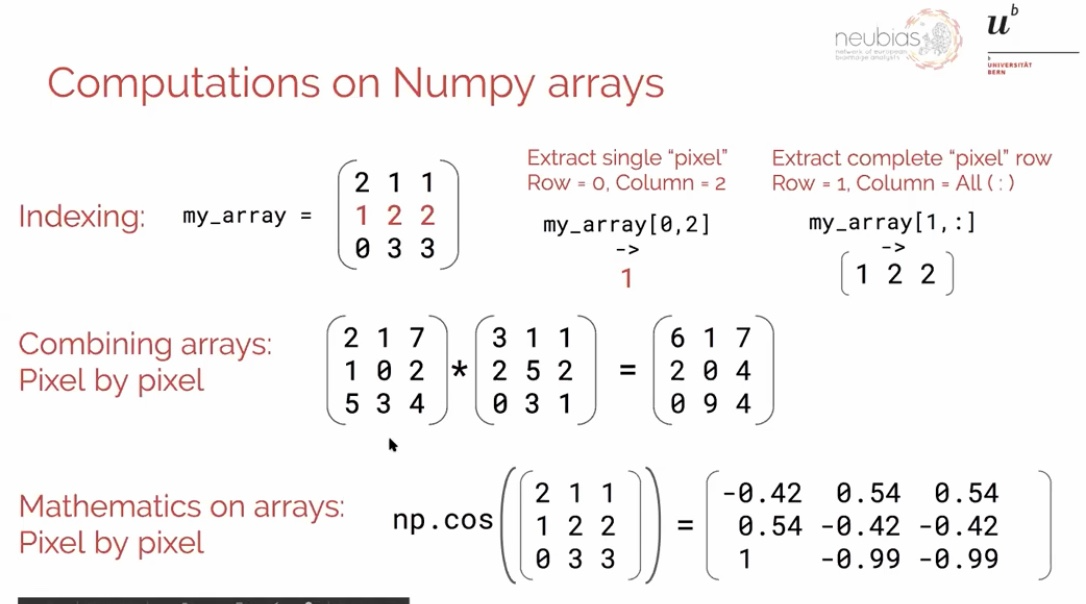
&#8594; import skimage<br>
&#8594; from skimage import data, io, filters<br>
&#8594; examples on [scikit-image](https://scikit-image.org/docs/dev/api/skimage.filters.html)

**In the code below** I parsed uniprot to get accessions and their corresponding synonyms. I can make use of this code as well to get gene names.

In [ ]:
acc_list = []
synonym_list = []
mydict = {}
import re

getsynonym = False
with open('uniprot_sprot.xml') as xml:
    for line in xml:
        line = line.rstrip()
        if '<accession>' in line:
            synonym_list = []
            # some entries have more than 1 accession
            accession = re.split('[<>/]', line)[2]
            acc_list.append(accession)
            accessions = ','.join(acc_list)  
            mydict[accessions] = 'nan' # add 'nan' as value to accessions as long as the accession has no synonym. (initialize the dict with this)
        elif '<protein>' in line:
            acc_list = [] #empty accession list on the next line after the last accession. The next line after the last accession where I could empty mylist is <protein>
        elif '<gene>' in line: # if line startswith <gene>, set a True flag. Once it reaches </gene> the flag turns to false so that the code knows that it should find syonyms between <gene> and </gene> only (not organisms synonyms also)
            getsynonym = True
        elif '</gene>' in line:
            getsynonym = False
        elif getsynonym and 'synonym' in line: #If true and synonym in line
            line = line.rstrip()
            synonym=re.split('[<>]', line)[2]
            synonym_list.append(synonym)
            synonyms = ','.join(synonym_list)
            mydict[accessions] = synonyms
                     
    print(mydict)
            
        
            

### May 14-18,2020
### Tasks:

- Fix the hgnc mapping above.
- map **Autophagy_maptoUni** to uniprot database using ENSEMBLE IDs.

### Problems faced:
- Not all ENSEMBLE entries mapped to uniprot. I couldn't upload the whole file all the ENSEMBLE IDs to get uniprot IDs.<br>
- Should Ask about how to deal with this file.<br> **SOLVED >> Copy-paste+Take only reviewed and save unreviewed and unmapped as separate lists**.<br>
- Should I also include RNAs that are involved in autophagy in the data file?<br> **NO**
- Do I consider gene/product name as gene symbol? 

In [ ]:
with open('Autophagy_maptoUni', 'r') as mapp, open('mapENStoUni', 'w') as out:
    for line in mapp:
        line=line.rstrip()
        if line.startswith('ENS'):
            print(line, file = out)
    

**Merge the file 'Fullreviewed_HomoSacch_AmigoODB' with overlap5_hgncOver**

In [ ]:
dict_over = {}
dict_mapp = {}
with open('Overlap5_hgncOver', 'r') as over, open('Fullreviwed_HomoSacch_AmigoODB', 'r') as mapp, open('over_amigoODB', 'w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in mapp:
        line=line.rstrip()
        line=line.split(';')
        Uniprot = line[0]
        dict_mapp[Uniprot] = {}
        Symbol = line[1]
        dict_mapp[Uniprot]['Symbol'] = Symbol
        synonym= line[4]
        dict_mapp[Uniprot]['Synonym'] = synonym
        protname = line[2]
        dict_mapp[Uniprot]['protname'] = protname
        org_ID = line[3]
        dict_mapp[Uniprot]['organism'] = org_ID 
    for key in dict_mapp:
        if key in dict_over:
            print(key, dict_mapp[key]['Symbol']+','+dict_over[key]['symbol'], dict_over[key]['alternative']+','+dict_mapp[key]['Synonym'], dict_over[key]['fullname']+'|'+dict_mapp[key]['protname'], dict_mapp[key]['organism']+','+dict_over[key]['org'], sep = ';', file = out)
        else:
            print(key,dict_mapp[key]['Symbol'],dict_mapp[key]['Synonym'],dict_mapp[key]['protname'],dict_mapp[key]['organism'],sep = ';', file = out)            
    for key in dict_over:
        if not key in dict_mapp:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
    
    
import re
with open('over_amigoODB', 'r') as over, open('Overlap6_ODBOver', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(re.split('[,]', line))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[,]', line))
        for line in org:
            line=line.rstrip()
            orglist = set(re.split('[,]', line)) 
        for line in name:
            line=line.rstrip()
            namelist = set(re.split('[|]', line)) 
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_org = ','.join(str(x) for x in orglist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,all_synonyms,all_names,all_org, sep = ';', file = out2)       
    
    

### NOTE:
Sometimes two different uniprot IDs have the same symbol, synonyms are not provided, organism is not provided for both of them. These two uniprot IDs correspond to two different organisms (although not provided).

**START CLEANING THE Overlap6_ODBOver FILE**.

In [ ]:
#Start with removing the 'nan' from lines that do have synonyms. e.g. p63,VPS38,nan,DHTX and removing synonyms that are the same as their corresponding symbols.

syn_list = []
symbol_list = []
string_list = []
count =0
with open('Overlap6_ODBOver') as over, open('prefinal_autphagydata', 'w') as out, open('synonyms_auto', 'w') as out2:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprot = line[0]
        symbol = line[1]
        symbol_list.append(symbol)
        print(uniprot,symbol, sep = '\t' , file = out)
        synonym = line[2]
        #take 'nan' in comma separated synonyms
        if ',' in synonym:
            syn_list = []
            string_list = []
            synonym = synonym.split(',')
            for string in synonym:
                #eliminate the synonyms that are the same as their symbols
                if not string in symbol_list:
                    string_list.append(string)
                    string = ','.join(string_list)
            #split again to remove 'nan'
            string = string.split(',')
            #replace nan with empty string
            syn = ['' if x == 'nan' else x for x in string]
            #remove the empty string
            syn = list(filter(None, syn))
            for element in syn:
                syn_list.append(element)
                synstr = ','.join(syn_list)
            print(synstr, file = out2)
        else:
            print(synonym, file = out2)
            
    



In [ ]:
#Remove 'nan' in names and organisms

org_list = []
name_list = []
with open('Overlap6_ODBOver') as over,  open('names_auto', 'w') as out1, open('org_auto', 'w') as out2:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        name = line[3]
        org = line[4]
        if org.startswith(',nan'):
            org = org.replace(',nan', 'nan')
            print(org, file = out2)
        elif ',' in org:
            org_list = []
            org = org.split(',')
            org = ['' if x == 'nan' else x for x in org]
            org = list(filter(None, org))
            for element in org:
                org_list.append(element)
                organisms = ','.join(org_list)
            print(organisms, file = out2)
        else:
            print(org, file = out2)
        if '|' in name:
            name_list = []
            name = name.split('|')
            name = ['' if x == 'nan' else x for x in name]
            name = list(filter(None, name))
            for element in name:
                name_list.append(element)
                names = '|'.join(name_list)
            print(names, file = out1)
        else:
            print(name, file = out1)

count = 0            
with open('org_auto', 'r') as auto, open('org2_auto', 'w') as out:
    for line in auto:
        line = line.rstrip()
        if 'Homo sapiens' in line:
            if ',' in line:
                line=line.split(',')
                line = line[0]
                print(line, file = out)
            else:
                print(line, file = out)
        else:
            print(line, file = out)
            
                
#put all files together

#paste -d '\t' prefinal_autphagydata synonyms_auto names_auto org2_auto > prefinal_Autophagy_Data
#echo 'Auto_uniprotID' 'Auto_Symbol' 'Auto_Synonyms' 'Auto_Gene/Product_Name' 'Auto_Organism' | tr ' ' '\t' > AutoHeaders
#cat AutoHeaders prefinal_Autophagy_Data > Autophagy_DataANDcpx


In [ ]:
#remove cpx entries then map the file to unreviewed GO resource entries in order to eliminate as much as possible unreviewed from end file.
with open('Autophagy_DataANDcpx') as inn,open('tobemapped_Autophagy_Data', 'w') as out:
    for line in inn:
        line=line.rstrip()
        if not line.startswith('CPX'):
            print(line, file = out)
    

**REMOVE UNREVIEWED ENTRIES IN GO DATABASE FROM END FILE**<br>
- I mapped all uniprot IDs from GO database/autophagy to uniprot(**autophagy_lines**), I saved the unreviewed entries to **Unreviewed_GO_database**. MAP THEM TO THE FINAL FILE AND REMOVE THEM.


**NOTE** <br>
apparently in the previous project, they took both reviewed and unreviewed, because while i was looking through the previous student's thesis, I found that they got 9126 autophagy data from GO (amigo serach most probably). The number is similar to mine (10387). If I remove duplications from the file I end up having 7204 entries and if I mapp to uniprot, I see that there is only around 2000 reviewed entries WHILE THE REST WERE UNREVIEWED. 

In [ ]:
#less autophagy_lines | cut -f2 | sort -u > maptoUni_Auto
#There were 2 unampped identifiers upon mapping uniprot IDs in autophagy_lines to uniprot. They were from CPX database.
dict_mapp = {}
go_list = []
count = 0
with open('tobemapped_Autophagy_Data') as mapp, open('Unreviewed_GO_database') as go, open('Final_Autophagy_Data', 'w') as out:
    
    for line in mapp:
        if not 'uniprotID' in line:
            line=line.rstrip()
            line = line.split('\t')
            uniprot = line[0]
            dict_mapp[uniprot] = {}
            symbol = line[1]
            dict_mapp[uniprot]['symbol'] = symbol
            synonym = line[2]
            dict_mapp[uniprot]['synonym'] = synonym
            protname = line[3]
            dict_mapp[uniprot]['protname'] = protname
            org = line[4]
            dict_mapp[uniprot]['org'] = org
    for line in go:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            go_list.append(uniprot)
    for key in dict_mapp:
        if not key in go_list:
            print(key, dict_mapp[key]['symbol'], dict_mapp[key]['synonym'], dict_mapp[key]['protname'], dict_mapp[key]['org'], sep = '\t', file = out) 
          #There are 19486 unreviewed entries from GO database.  
            
#I added the header in bash    

I will add reviewed autophagy files (gathered after filling excel sheet) and check the final count to make sure what I did above is correct.<br>
I summed up the reviewed files below in bash (except for two of them because they have different structure **ENSENT_FullReviewedAUTO_nan** and **Fullreviwed_HomoSacch_AmigoODB** so they were grouped into **ENSENT_AMIGO_HS_mix.txt** that has 404 ID lines (379 unique).


- reviewedHADB_with_unipro
- reviewed_AutophagyWITHuniprot
- reviewed_Hamdb
- reviewed_amigoAuto_syn
- reviewed_auto
- reviewed_goa_Auto

All saved into **FULLALL.txt** (not unique)

In [ ]:
full_dict = {}
count = 0
mix_dict = {}

with open('FULLALL.txt') as full, open('ENSENT_AMIGO_HS_mix.txt') as mix, open('rev_autophagyALL', 'w') as out:
    for line in full:
        if not 'your' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprot = line[1]\
            full_dict[uniprot] = {}
            gsym = line[5].split(' ') 
            symbol = gsym[0]
            full_dict[uniprot]['symbol'] = symbol
            synonym = gsym[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            full_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            full_dict[uniprot]['protname'] = protname
            org = line[4]
            full_dict[uniprot]['org'] = org
    for line in mix:
        line = line.rstrip()
        uniprot = line[0]
        mix_dict[uniprot]= {}
        symbol = line[1]
        mix_dict[uniprot]['symbol'] = symbol
        protname = line[2]
        mix_dict[uniprot]['protname'] = protname
        protname = protname.split('(EC ')[0]
        protname = protname.split('[Cleaved ')[0]
        org = line[3]
        mix_dict[uniprot]['org'] = org
        synonym = line[4]
        mix_dict[uniprot]['synonym'] = synonym
    for key in full_dict:
        if key in mix_dict: #208
            print(key,full_dict[key]['symbol']+','+mix_dict[key]['symbol'], full_dict[key]['synonym']+','+mix_dict[key]['synonym'], full_dict[key]['protname']+'|'+mix_dict[key]['protname'],full_dict[key]['org']+','+mix_dict[key]['org'], sep = '\t', file = out) 
        else: #4513
            print(key,full_dict[key]['symbol'],full_dict[key]['synonym'],full_dict[key]['protname'],full_dict[key]['org'], sep = '\t', file = out)
    for key in mix_dict:
        print(key,mix_dict[key]['symbol'],mix_dict[key]['synonym'],mix_dict[key]['protname'],mix_dict[key]['org'], sep = '\t', file = out)
    #4892. Correct

### DONE WITH AUTOPHAGY OVERLAP/NON-OVERLAP. 
Everything is saved to **Final_Autophagy_Data**.

### May 19-22,2020
### Notes:
- Figured out that Emil and Petter's code needs to be further fixed inorder to completely remove the synonyms and gene symbols from the protein name entity(i.e. not just to add synonyms to another column).
- After fixing the table **repeat** mapping to hgnc in the steps above(fix directly).


### Tasks:
- Fix above ensembl data, entrez data and amigo data for both autophagy database and amigo search tool autophagy data (Will take sometime).
- Fix the overlap files above (Amigo/auto_nan). 
- Fix the end file (do it above).
- Download uniprot/lysosomes IDs.
- Start working on lysosomes data.


- TBU_New_lysosome from GO: No 'nan'.<br>
&#8594; It has 10467 ID lines. <br>
&#8594; UniprotIDs/symbol/protname/synonyms.


- TBU_New_UniprotAmigo_lysosome from GO/Amigo: no 'nan' in uniprotIDs.<br>
&#8594; It has 6693 ID lines. <br>
&#8594; UniprotIDs/gene\product name/org.


- TBU_NewAmigo_ODB_lysosome from GO/Amigo.<br>
&#8594; It has 1663 lines; No uniprot IDs.<br>
&#8594; map human and yeast entries to uniprot.<br>
&#8594; otherDB_ID/gene\product name/ synonym/org.


- TBU_UniprotSyn_ODB_lysosome. <br>
&#8594; it has 118 lines. 118 uniprot IDs.<br>
&#8594; ODBID/gene\\productName/uniprot ID/Organism


- TBU_ALL_HSP from HSP. <br>
&#8594; Has 127 lines related to lysosomes .<br>
&#8594; UniprotIDs/protein names/ Gene names.


- TBU_ProteinAtlasLysosomes .<br>
&#8594; It has 1094 lines. (719 unique)<br>
&#8594; gene name/synonym/UniprotID.<br>
&#8594; since this database has uniprot ID, I can use it to map to uniprot and get protein names(not available in the original file). Save mapped to **Reviewed_proteinAtlasFull**.All mapped. <br>
&#8594; No unreviewed.

    

- Human Lysosome Gene database.<br>
&#8594; It has 435 lines.<br>
&#8594; symbol/name >> mapped to Uniprot and got reviewed entries of Homo sapiens in **mappedToUni_HLGB.tab** >> 447 lines >> needs to be fixed. 1 unmapped 'LOC653653'.


- lysosome-Uniprot. <br>
&#8594;It has 3034 lines .<br>
&#8594; needs to be fixed.

**Take the columns from Human Lysosome Gene database and ; separate them**.

In [ ]:
syn_list = []
synonym_list = []
count = 0
with open('mappedToUni_HLGB.tab', 'r') as mapp, open('synonyms_HLGB', 'w') as out, open('prefinal_HLGB', 'w') as pre:
    lines = mapp.readlines()[1:]
    for line in lines:
        syn_list = []
        line = line.rstrip()
        line=line.split('\t')
        uniprot = line[1]
        protname= line[4].replace(';', ',')
        org = line[6]
        gsyn = line[5].replace(' ', ',').split(',')
        symbol = gsyn[0]
        print(uniprot, symbol, protname, org, sep = ';', file = pre)
        synonym = gsyn[1:]
        for element in synonym:
            syn_list.append(element)
            synonym = ','.join(syn_list)
        synonym_list.append(synonym)         
    synonym_list = ["nan" if x == [] else x for x in synonym_list] #remove [] from the list
    for element in synonym_list:
        print(element, file = out)
        
#paste -d ';' prefinal_HLGB synonyms_HLGB > mappedToUni_HumanLGDB       

**Fix lysosome-Uniprot and ; separate fields.**

In [ ]:
#LU stands for lysosome uniprot. These are the reviewed entries related to lysosome from uniprot. 
syn_list = []
synonym_list = []
with open('lysosome_Uniprot', 'r') as lys, open('prefinal_Lysosome_uniprot', 'w') as tbu, open('synonyms_lyso', 'w') as out:
    lines = lys.readlines()[1:]
    for line in lines:
        syn_list = []
        line = line.rstrip()
        line=line.split('\t')
        uniprot = line[0]
        proteinname= line[3].replace(';', ',')
        org = line[5]
        gsyn = line[4].replace(' ', ',').split(',')
        symbol = gsyn[0]
        print(uniprot, symbol, proteinname, org, sep = ';', file = tbu)
        synonym = gsyn[1:]
        for element in synonym:
            syn_list.append(element)
            synonym = ','.join(syn_list)
        synonym_list.append(synonym) 
    
    synonym_list = ["nan" if x == [] else x for x in synonym_list] #remove [] from the list
    for element in synonym_list:
        print(element, file = out)
        
 #paste -d ';' prefinal_Lysosome_uniprot synonyms_lyso > TBU_Lysosome_Uniprot       

Get the data from **Reviewed_proteinAtlasFull** and separate gene names from synonyms.

In [ ]:
synonym_list = []
syn_list = []
count=0
with open('Reviewed_proteinAtlasFull') as rev, open('prefinalProtein_Atlas', 'w') as out, open('synonyms_proteinAtlas', 'w') as out2:
    for line in rev:
        syn_list = []
        if not 'your' in line:
            line = line.rstrip()
            line=line.split('\t')
            uniprot = line[1]
            protname= line[4].replace(';', ',')
            org = line[6]
            gsyn = line[5].replace(' ', ',').split(',')
            symbol = gsyn[0]
            print(uniprot, symbol, protname, org, sep = ';', file = out)
            synonym = gsyn[1:]
            for element in synonym:
                syn_list.append(element)
                synonym = ','.join(syn_list)
            synonym_list.append(synonym)   
        synonym_list = ["nan" if x == [] else x for x in synonym_list] #remove [] from the list
    for element in synonym_list:
        print(element, file = out2)
        
 #paste -d ';' prefinalProtein_Atlas synonyms_proteinAtlas > ProteinAtlasForMerge    
    

    

### Start Merging

Take **TBU_Lysosome_Uniprot** and **mappedToUni_HumanLGDB**

In [ ]:
tbu_dict = {}
dict_mapp = {}
count = 0
with open('TBU_Lysosome_Uniprot') as tbu, open('mappedToUni_HumanLGDB') as mapp, open('over_lysUni_mapp', 'w') as out:
    for line in tbu:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        tbu_dict[uniprotID] = {}
        symbol = line[1]
        tbu_dict[uniprotID]['symbol'] = symbol
        alternative= line[4]
        tbu_dict[uniprotID]['alternative'] = alternative
        org = line[3]
        tbu_dict[uniprotID]['org'] = org
        fullname = line[2]
        tbu_dict[uniprotID]['fullname'] = fullname
    for line in mapp:
        line=line.rstrip()
        line=line.split(';')
        Uniprot = line[0]
        dict_mapp[Uniprot] = {}
        Symbol = line[1]
        dict_mapp[Uniprot]['Symbol'] = Symbol
        synonym= line[4]
        dict_mapp[Uniprot]['Synonym'] = synonym
        protname = line[2]
        dict_mapp[Uniprot]['protname'] = protname
        org_ID = line[3]
        dict_mapp[Uniprot]['organism'] = org_ID 
    for key in dict_mapp:
        if key in tbu_dict:
            print(key, dict_mapp[key]['Symbol']+','+tbu_dict[key]['symbol'], tbu_dict[key]['alternative']+','+dict_mapp[key]['Synonym'], tbu_dict[key]['fullname']+'|'+dict_mapp[key]['protname'], dict_mapp[key]['organism']+','+tbu_dict[key]['org'],sep = ';', file = out)
        else:
            print(key,dict_mapp[key]['Symbol'],dict_mapp[key]['Synonym'],dict_mapp[key]['protname'],dict_mapp[key]['organism'],sep = ';', file = out)            
    for key in tbu_dict:
        if not key in dict_mapp:
            print(key,tbu_dict[key]['symbol'],tbu_dict[key]['alternative'],tbu_dict[key]['fullname'],tbu_dict[key]['org'], sep = ';', file = out)
    
        
import re
with open('over_lysUni_mapp', 'r') as over, open('Overlap1_lysUni', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(re.split('[,]', line))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[,]', line))
        for line in org:
            line=line.rstrip()
            orglist = set(re.split('[,]', line)) 
        for line in name:
            line=line.rstrip()
            namelist = set(re.split('[|]', line)) 
            #I could have put x without str as well.
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_org = ','.join(str(x) for x in orglist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,all_synonyms,all_names,all_org, sep = ';', file = out2)       
    
        
    

Merge the file above with **ProteinAtlasForMerge**.

In [ ]:
dict_over = {}
dict_mer = {}
count = 0
with open('Overlap1_lysUni') as over, open('ProteinAtlasForMerge') as mer, open('overHLG', 'w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in mer:
        line=line.rstrip()
        line=line.split(';')
        Uniprot = line[0]
        dict_mer[Uniprot] = {}
        Symbol = line[1]
        dict_mer[Uniprot]['Symbol'] = Symbol
        synonym= line[4]
        dict_mer[Uniprot]['Synonym'] = synonym
        protname = line[2]
        dict_mer[Uniprot]['protname'] = protname
        org_ID = line[3]
        dict_mer[Uniprot]['organism'] = org_ID 
    for key in dict_mer:
        if key in dict_over:
            print(key, dict_mer[key]['Symbol']+','+dict_over[key]['symbol'], dict_over[key]['alternative']+','+dict_mer[key]['Synonym'], dict_over[key]['fullname']+'|'+dict_mer[key]['protname'], dict_mer[key]['organism']+','+dict_over[key]['org'],sep = ';', file = out)
        else:
            print(key,dict_mer[key]['Symbol'],dict_mer[key]['Synonym'],dict_mer[key]['protname'],dict_mer[key]['organism'],sep = ';', file = out)            
    for key in dict_over:
        if not key in dict_mer:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
    
    
with open('overHLG', 'r') as over, open('Overlap2_atlas', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in alt:
            line=line.strip()
            synonymlist = set(line.split(','))
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in org:
            line=line.rstrip()
            orglist = set(line.split(',')) 
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        all_synonyms=','.join(str(x) for x in synonymlist)
        all_symbols = ','.join(str(x) for x in symbollist)
        all_org = ','.join(str(x) for x in orglist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,all_synonyms,all_names,all_org, sep = ';', file = out2)       
    
    
    

Continue with merging **TBU_ALL_HSP** with the file obtained above.

In [ ]:
dict_over = {}
dict_tbu = {}
count = 0
with open('TBU_ALL_HSP') as tbu, open('Overlap2_atlas') as over, open('overHSP','w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in tbu:
        if not 'ProteinName' in line:
            line=line.rstrip()
            line=line.split(';')
            uniprot = line[0]
            dict_tbu[uniprot] = {}
            symbol = line[2]
            dict_tbu[uniprot]['symbol'] = symbol
            protname= line[1]
            dict_tbu[uniprot]['protname'] = protname
    for key in dict_over:
        if key in dict_tbu:
            print(key, dict_over[key]['symbol']+',' + dict_tbu[key]['symbol'], dict_over[key]['alternative'],dict_over[key]['fullname']+'|'+dict_tbu[key]['protname'],dict_over[key]['org'], sep = ';', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
    for key in dict_tbu:
        if not key in dict_over:
            print(key,dict_tbu[key]['symbol'], 'nan', dict_tbu[key]['protname'], 'Homo sapiens (Human)', sep = ';', file = out)
            
            
with open('overHSP', 'r') as over, open('Overlap3_hsp', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        org = line[4]
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        all_symbols = ','.join(str(x) for x in symbollist)
        all_names = '|'.join(str(x) for x in namelist)
        print(uniprot,all_symbols,alt,all_names,org, sep = ';', file = out2)       
        
    

### May 23,2020
### Tasks:
- Remove unreviewed entries from **TBU_New_lysosome** by mapping the uniprot IDs to uniprot(have the unreviewed and unmapped in separate files).
- Continue merging the lysosome databases.

Unreviewed mapped TBU_New_lysosome to uniprot was saved as **Unreviewed_TBM_NEW_lysosome**. <br>
Save the removed unreviewed entries to **Removed_Unreviewed_New_lyso**


- These entries were unmapped: <br>
CPX-1153
CPX-4741
CPX-5043
URS00007020B1_8364
URS000094EFA6_8364
URS0001950EE7_8364

- Since entries in TBU_New_lysosome do not have organism field, I got the reviewed entries that were obtained upon mapping its IDs to uniprot and saved to **Reviewed_TBM_New_lyso** in order to map to the file below and get the organism.

In [ ]:
dict_lyso = {}
tbm_list = []
count = 0

with open('Unreviewed_TBM_New_lysosome') as tbm, open('TBU_New_lysosome') as lyso, open('preclean_TBU_New_lysosome', 'w') as out, open("Removed_Unreviewed_New_lyso" ,'w') as out2:
    for line in lyso:
        if not 'Uniprot' in line:
            line=line.rstrip()
            line = line.split(';')
            uniprot = line[0]
            dict_lyso[uniprot] = {}
            symbol = line[1]
            dict_lyso[uniprot]['symbol'] = symbol
            synonym = line[3]
            dict_lyso[uniprot]['synonym'] = synonym
            protname = line[2]
            dict_lyso[uniprot]['protname'] = protname
    for line in tbm:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            tbm_list.append(uniprot)
    for key in dict_lyso:
        if not key in tbm_list:
            print(key, dict_lyso[key]['symbol'], dict_lyso[key]['synonym'], dict_lyso[key]['protname'],  sep = ';', file = out) 
        else:
            print(key, file = out2)
            
    
    

Get the organism field for the reviewed entries. If entry is not common between the two files, print the line as is.


### Note:
- Remove the **Obsolete entries** that were deleted from uniprot(all redundant entries in preclean_TBU_New_lysosome file were removed since april 22.2019)

In [ ]:
dict_lyso = {}
tbm_dict = {}
count = 0
with open('Reviewed_TBM_New_lyso') as tbm, open('preclean_TBU_New_lysosome') as lyso, open('clean_TBU_New_lysosome', 'w') as out:
    for line in lyso:
        if not line.startswith ('A0A'): 
            line=line.rstrip()
            line = line.split(';')
            uniprot = line[0]
            dict_lyso[uniprot] = {}
            symbol = line[1]
            dict_lyso[uniprot]['symbol'] = symbol
            synonym = line[2]
            dict_lyso[uniprot]['synonym'] = synonym
            protname = line[3]
            dict_lyso[uniprot]['protname'] = protname
    for line in tbm:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            org = line[6]
            tbm_dict[uniprot] = org
    for key in dict_lyso:
        if key in tbm_dict:
            print(key, dict_lyso[key]['symbol'], dict_lyso[key]['synonym'], dict_lyso[key]['protname'], tbm_dict[key], sep = ';', file = out)
        else:
            print(key, dict_lyso[key]['symbol'], dict_lyso[key]['synonym'], dict_lyso[key]['protname'], 'nan', sep = ';', file = out)
            #289
    

Merge **clean_TBU_New_lysosome** with **overlap3_hsp**.

In [ ]:
dict_over = {}
dict_clean = {}
count = 0
with open('clean_TBU_New_lysosome') as clean, open('Overlap3_hsp') as over, open('overclean','w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in clean:
        line=line.rstrip()
        line=line.split(';')
        uniprot = line[0]
        dict_clean[uniprot] = {}
        symbol = line[1]
        dict_clean[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_clean[uniprot]['synonym'] = synonym
        protname= line[3]
        dict_clean[uniprot]['protname'] = protname
        organism = line[4]
        dict_clean[uniprot]['organism'] = organism
    for key in dict_over:
        if key in dict_clean:
            print(key, dict_over[key]['symbol']+',' + dict_clean[key]['symbol'], dict_over[key]['alternative']+','+ dict_clean[key]['synonym'],dict_over[key]['fullname']+'|'+dict_clean[key]['protname'],dict_over[key]['org']+','+dict_clean[key]['organism'], sep = ';', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
    for key in dict_clean:
        if not key in dict_over:
            print(key,dict_clean[key]['symbol'], dict_clean[key]['synonym'], dict_clean[key]['protname'], dict_clean[key]['organism'], sep = ';', file = out)

import re
with open('overclean', 'r') as over, open('Overlap4_clean', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(re.split('[|,]', line))
        for line in alt:
            line=line.rstrip()
            altlist = set(re.split('[|,]', line))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(',')) 
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = ';', file = out2)       
        
    

Remove **Obsolete entries** from **TBU_New_UniprotAmigo_lysosome**. Those are redundant and have been deleted from uniprot. <br>

- First map the uniprot IDs in the file to uniprot. Get the unreviewed entries. Map them to the file to eliminate them. <br>
- Download obsolete entries and map them again.
- **Removed_Unreviewed_New_lyso** and **Removed_Unreviewed_UnipAmigo** were mapped to uniprot and saved to **Full_Removed_unreviewed**.


In [ ]:
#remove unreviewed entries
#save the ones that are removed in "Removed..etc"
list_lyso = []
dict_tbu = {}
with open('Unreviewed_UniprotAmigo_lys') as lyso, open('TBU_New_UniprotAmigo_lysosome') as tbu, open('preclean_UnipAm_lys', 'w') as out, open('Removed_Unreviewed_UnipAmigo','w') as out2:
    for line in tbu:
        if not 'UniprotID' in line: 
            line=line.rstrip()
            line = line.split(';')
            uniprot = line[0]
            dict_tbu[uniprot] = {}
            symbol = line[1]
            dict_tbu[uniprot]['symbol'] = symbol
            synonym = line[2]
            if ':' in synonym:
                synonym = synonym.split(':')[1]
                
            else:
                synonym = synonym
            dict_tbu[uniprot]['synonym'] = synonym
            org = line[3]
            dict_tbu[uniprot]['org'] = org
    for line in lyso:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            list_lyso.append(uniprot)
            
    for key in dict_tbu:
        if not key in list_lyso:
            print(key, dict_tbu[key]['symbol'], dict_tbu[key]['synonym'], dict_tbu[key]['org'], sep = ';', file = out) #1714
            
        else:
            print(key, file = out2)
        

In [ ]:
#remove obsolete entries
#Save the ones that are removed in "Remove..etc"
list_obs = []
dict_pre = {}
with open('preclean_UnipAm_lys') as pre, open ('Obsolete_amigo_lys') as obs, open('preclean2_UnipAm_lys', 'w') as out, open('Removed_Obsolete_UnipAmigo', 'w') as out2:
    for line in pre:
        line=line.rstrip()
        line = line.split(';')
        uniprot = line[0]
        dict_pre[uniprot] = {}
        symbol = line[1]
        dict_pre[uniprot]['symbol'] = symbol
        synonym = line[2].split('|')
        synonym = ','.join(synonym)
        dict_pre[uniprot]['synonym'] = synonym
        org = line[3]
        dict_pre[uniprot]['org'] = org
    for line in obs:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            list_obs.append(uniprot)
            
    for key in dict_pre:
        if not key in list_obs:
            print(key, dict_pre[key]['symbol'], dict_pre[key]['synonym'], dict_pre[key]['org'], sep = ';', file = out) 
        else:
            print(key, file = out2)
        
    
    

In [ ]:
#map reviewed to preclean2_UnipAm_lys to get the protein names.
#A0A2I2UUI4, A0A2I2U6T4 AND F6PLF8, A0A1D5R8J4 are unreviewed but I didn't get them in the previous run.

count = 0
dict_pre = {}
dict_rev = {}
with open('preclean2_UnipAm_lys') as pre, open('Reviewed_UniprotAmigo_lys') as rev, open('Clean_UniprotAmigo_Lysosome', 'w') as out:
    for line in pre:
        if not 'A0A2I2UUI4' in line:
            if not 'A0A2I2U6T4' in line:
                if not 'F6PLF8' in line:
                    if not 'A0A1D5R8J4' in line:
                        line=line.rstrip()
                        line = line.split(';')
                        uniprot = line[0]
                        dict_pre[uniprot] = {}
                        symbol = line[1]
                        dict_pre[uniprot]['symbol'] = symbol
                        synonym = line[2]
                        dict_pre[uniprot]['synonym'] = synonym
                        org = line[3]
                        dict_pre[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            #get protein names for entries
            uniprot = line[0]
            protname = line[4].replace(';', ',')
            dict_rev[uniprot] = protname
    for key in dict_pre:
        if key in dict_rev:
            print(key, dict_pre[key]['symbol'], dict_pre[key]['synonym'], dict_rev[key], dict_pre[key]['org'], sep = ';', file = out)
        else:
            print(key, dict_pre[key]['symbol'], dict_pre[key]['synonym'], 'nan', dict_pre[key]['org'], sep = ';', file = out)
            
    


### May 24,2020
### Tasks:
- Continue merging databases. 
- 'Al Fitr' feast. Can't work much.

In [ ]:
#merge Clean_UniprotAmigo_Lysosome and Overlap4_clean

dict_over = {}
dict_clean = {}
with open('Overlap4_clean') as over , open('Clean_UniprotAmigo_Lysosome') as clean, open('overAmigo', 'w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in clean:
        line=line.rstrip()
        line=line.split(';')
        uniprot = line[0]
        dict_clean[uniprot] = {}
        symbol = line[1]
        dict_clean[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_clean[uniprot]['synonym'] = synonym
        protname= line[3]
        dict_clean[uniprot]['protname'] = protname
        organism = line[4]
        dict_clean[uniprot]['organism'] = organism
    for key in dict_over:
        if key in dict_clean:
            print(key, dict_over[key]['symbol']+',' + dict_clean[key]['symbol'], dict_over[key]['alternative']+','+ dict_clean[key]['synonym'],dict_over[key]['fullname']+'|'+dict_clean[key]['protname'],dict_over[key]['org']+','+dict_clean[key]['organism'], sep = ';', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
    for key in dict_clean:
        if not key in dict_over:
            print(key,dict_clean[key]['symbol'], dict_clean[key]['synonym'], dict_clean[key]['protname'], dict_clean[key]['organism'], sep = ';', file = out)

import re
with open('overAmigo', 'r') as over, open('Overlap5_clean', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        if ',' in all_org:
            all_org = all_org.split(',')[0]
            print(uniprot,all_symbols,all_alt,all_names,all_org, sep = ';', file = out2)     
        else:
            all_org = all_org
            print(uniprot,all_symbols,all_alt,all_names,all_org, sep = ';', file = out2)
            
        
    

Take **human** and **Saccharomyces** entries from **TBU_NewAmigo_ODB_lysosome** and map to uniprot. Then filter on the organism.
- Since only 4 entries belong to humans (abeta-42-oligomer, 
escrt-iii,
kcne2-kcnh2,
gins), I will take them manually and map to uniprot.<br>
less TBU_NewAmigo_ODB_lysosome | grep 'Homo' 
- There are only 10 saccharomyces entries so I will also map them manually.
(SFK1,
YPT7,
VMA6,
GTR1,
GTR2,
YCL001W-A,
CUE2,
YCL001W-B,
HBS1,
DOM34)


&#8594; In Homo sapiens: gins,escrt-iii,abeta-42-oligomer were unmapped.<br>
&#8594; mapped homo sapiens were saved in **Reviewed_Homo_ODBAmigo**.<br>
&#8594;Unreviewed homo sapiens will be saved to **Unreviewed_Homo_ODBAmigo**
&#8594; In Saccharomyces: all mapped.<br>
&#8594; mapped Saccharo were saved in **Reviewed_Sacch_ODBAmigo**.

In [ ]:
#Combine both reviewed files together to merge with files above.

with open('Reviewed_Homo_ODBAmigo') as hom, open('Reviewed_Sacch_ODBAmigo') as sac, open('Amigo_ODB_Lys_HomoSacch', 'w') as out:
    for line in hom:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            protname = line[4]
            org = line[6]
            symbol = line[5].split(' ')[0]
            synonym = line[5].split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                print(uniprot,symbol, 'nan', protname, org, sep = '\t', file = out)
            else:
                print(uniprot,symbol, synonym, protname, org, sep = '\t', file = out)
                
    for line in sac:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            protname = line[4]
            org = line[6]
            symbol = line[5].split(' ')[0]
            synonym = line[5].split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                print(uniprot,symbol, 'nan', protname, org, sep = '\t', file = out)
            else:
                print(uniprot,symbol, synonym, protname, org, sep = '\t', file = out)
                
            
            
        
    

Merge **Amigo_ODB_Lys_HomoSacch** with **Overlap5_clean**.

In [ ]:
dict_over = {}
dict_clean = {}
with open('Overlap5_clean') as over , open('Amigo_ODB_Lys_HomoSacch') as clean, open('overODB', 'w') as out:
    for line in over:
        line=line.rstrip()
        line=line.split(';')
        uniprotID = line[0]
        dict_over[uniprotID] = {}
        symbol = line[1]
        dict_over[uniprotID]['symbol'] = symbol
        alternative= line[2]
        dict_over[uniprotID]['alternative'] = alternative
        org = line[4]
        dict_over[uniprotID]['org'] = org
        fullname = line[3]
        dict_over[uniprotID]['fullname'] = fullname
    for line in clean:
        line=line.rstrip()
        line=line.split('\t')
        uniprot = line[0]
        dict_clean[uniprot] = {}
        symbol = line[1]
        dict_clean[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_clean[uniprot]['synonym'] = synonym
        protname= line[3]
        dict_clean[uniprot]['protname'] = protname
        organism = line[4]
        dict_clean[uniprot]['organism'] = organism
    for key in dict_over:
        if key in dict_clean:
            print(key, dict_over[key]['symbol']+',' + dict_clean[key]['symbol'], dict_over[key]['alternative']+','+ dict_clean[key]['synonym'],dict_over[key]['fullname']+'|'+dict_clean[key]['protname'],dict_over[key]['org']+','+dict_clean[key]['organism'], sep = ';', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['alternative'],dict_over[key]['fullname'],dict_over[key]['org'], sep = ';', file = out)
    for key in dict_clean:
        if not key in dict_over:
            print(key,dict_clean[key]['symbol'], dict_clean[key]['synonym'], dict_clean[key]['protname'], dict_clean[key]['organism'], sep = ';', file = out)

import re
with open('overODB', 'r') as over, open('Overlap6_ODB', 'w') as out2:
    for line in over:
        line=line.rstrip().split(';')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    #3630 all unique No unreviewed. 
            
        

### May 25,2020
### Tasks:
- Clean the end file. 
- Start merging cell death databases.

In [ ]:
#remove nan from synonyms 

#Remove 'nan' in names and organisms

syn_list = []
with open('Overlap6_ODB') as over, open('Final_Lysosome_Data', 'w') as out:
    print('uniprot_lys', 'Symbol_lys', 'Synonym_lys', 'ProtName_lys', 'Organism_lys', sep = '\t', file = out)
    for line in over:
        line=line.rstrip()
        line=line.split('\t')
        uniprot = line[0]
        gname = line[1]
        name= line[3]
        org = line[4]
        synonym = line[2]
        if ',' in synonym:
            syn_list = []
            synonym = synonym.split(',')
            synonym = ['' if x == 'nan' else x for x in synonym]
            synonym = list(filter(None, synonym))
            synonym = ','.join(synonym)
            print(uniprot, gname, synonym, name, org, sep = '\t', file = out)
        else:
            print(uniprot, gname, synonym, name, org, sep = '\t', file = out)




### NOTES:

Cell Death Data:<br>

- TBU_FULL_BCL2DB. **NO nan**
&#8594; It has 70 ID lines. <br>
&#8594; Gene_name/symbol/short protein name/accession.<br>
&#8594; doesn't have organism and synonyms field so i'll map the entries to uniprot to get them.<br>
&#8594; There were 59 reviewed saved to **Reviewed_cellDeath** and 11 unreviewed save to **Unreviewed_cellDeath**. Save final file as **cellDeath_final**.



- TBU_CASBAH. **No uniprot IDs** <br>
&#8594; it has 777 unique symbols.<br>
&#8594; Gname/symbol/synonym/organism



- Deathbase. Will use **TBU_Deathbase_proteinFull_list** that contains all info in apoptosis and protein file. **NO nan** <br>
&#8594; it has 195 lines(191 unique). Some of the entries are unreviewed and obsolete. <br>
&#8594; symbols/uniprot id/species/protname/process id / pathway. <br>
&#8594; doesn't have synonyms for gene symbol. <br>
&#8594; Don't add process id and pathway to the end file but it's good to keep them as a back up.<br>
&#8594; MAP UNIPROT IDs to uniprot, get the synonyms and remove unreviewed and obsolete entries. Save reviewed to **Reviewed_deathbase** and unreviewed to **Unreviewed_deathbase**.




- YCellDeath. **No nan** in uniprot IDs but in alias names.<br>
&#8594; it has 51 IDs.<br>
&#8594; Since it doesn't have protein name, I will map uniprot Ids to uniprot and get it's protein name. Save the mapping to **ReviewedycellDeath_getProtname**. Save final file as **yApoptosis_final**.<br>
&#8594; symbol/uniprotID/genealias




- TBU_New_cellDeath. No 'nan' in uniprot IDs BUT REMOVE UNREVIEWED ENTRIES AND OBSOLETE ONES.<br>
&#8594; it has 8607 unique IDs.<br>
&#8594; uniprot ID/symbol/name/synonym.<br>



- TBU_NewAmigo_ODB_cellDeath. Take HUMAN AND YEAST (as above).<br>
&#8594; it has 6547 lines.<br>
&#8594; Remove everything that starts with URS because these are miRNAs. Also remove the *_human* from the end of the line and split the complexes.<br>
&#8594; Save reviewed as **Reviewed_Saccharomyces_ODB** and **Reviewed_homo_ODB** (18). Save unreviewed as **Unreviewed_homo_ODB** and. Save unmapped to **Unmapped_homo_ODB**. No unmapped and unreviewed for Sacch. 


- TBU_New_UniprotAmigo_cellDeath. **No nan** Uniprot IDs. <br>
&#8594; it has 13220 unique lines.<br>
&#8594; uniprot ID/geneproduct name/synonym/organism<br>
&#8594; Map Ids to uniprot, remove unreviewed and keep reviewed.<br>
&#8594; Map Ids. Call it **Full_Reviewed_uniprotAmigo**. Unreviewed entries should be saved to **Full_Unreviewed_uniprotAmigo**. Obsolete should be saved into **Full_obsolete_uniprotAmigo**.


- TBU_UniprotSyn_ODB_cellDeath. **NO nan** Uniprot IDs.<br>
&#8594; 263 unique IDs.<br>
&#8594;otherDB ID /gene\\productName / uniprot ID/organism<br>
&#8594;map and save reviewed to **reviewed_SynAmigo_ODB** and unreviewed to **unreviewed_SynAmigo_ODB** and obsolete to **obsolete_SynAmigo_ODB**.

Start with extracting necessary information from **Reviewed_cellDeath**.

In [ ]:
syn_list = []
synonym_list = []
with open('Reviewed_cellDeath') as rev, open('cellDeath_final', 'w') as out:
    lines = rev.readlines()[1:]
    for line in lines:
        syn_list = []
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        protname = line[4]
        gsyn = line[5]
        org = line[6]
        symbol = gsyn.split(' ')[0]
        if symbol == '':
            symbol = 'nan'
        else:
            symbol = symbol
        synonym = gsyn.split(' ')[1:]
        synonym = ','.join(synonym)
        if synonym == '':
            synonym = 'nan'
            print(uniprot, symbol, synonym, protname, org, sep = '\t',file = out)
        else:
            print(uniprot, symbol, synonym, protname, org, sep = '\t',file = out)


        #59
        
        
    

Get protein names from **ReviewedycellDeath_getProtname** to ycellDeath.

In [ ]:
rev_dict = {}
apop_dict = {}
with open('ReviewedycellDeath_getProtname') as rev, open('TBU_yApoptosis') as apop, open('yApoptosis_final', 'w') as out:
    for line in rev:
        #take ids and protnames
        if not 'your' in line:
            line= line.rstrip()
            line=line.split('\t')
            uniprot = line[0]
            protname = line[4]
            rev_dict[uniprot] = protname
    for line in apop:
        if not 'Gene' in line:
            line = line.rstrip()
            line= line.split(';')
            uniprot = line[1]
            apop_dict[uniprot] = {}
            symbol = line[0]
            apop_dict[uniprot]['symbol'] = symbol
            synonym = line[2]
            apop_dict[uniprot]['synonym'] = synonym
    for key in apop_dict:
        if key in rev_dict:
            print(key,apop_dict[key]['symbol'],apop_dict[key]['synonym'],rev_dict[key], sep = '\t', file = out)
        else:
            print(key, apop_dict[key]['symbol'],apop_dict[key]['synonym'],'nan', sep = '\t', file = out)
            
    
            
        
    
    

### START MERGING

START WITH **cellDeath_final** and **yApoptosis_final**.

In [ ]:
dict_bcl = {}
dict_apop = {}
count = 0
with open('cellDeath_final') as bcl , open('yApoptosis_final') as apop, open('Overlap1_BclApop', 'w') as out:
    for line in bcl:
        if not 'Gene' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprotID = line[0]
            dict_bcl[uniprotID] = {}
            symbol = line[1]
            dict_bcl[uniprotID]['symbol'] = symbol
            alternative= line[2]
            dict_bcl[uniprotID]['alternative'] = alternative
            fullname = line[3]
            dict_bcl[uniprotID]['fullname'] = fullname
            org = line[4]
            dict_bcl[uniprotID]['org'] = org
    for line in apop:
        if not 'GeneName' in line:
            line=line.rstrip()
            line=line.split('\t')
            uniprot = line[0]
            dict_apop[uniprot] = {}
            symbol = line[1]
            dict_apop[uniprot]['symbol'] = symbol
            synonym = line[2].split('|')
            synonym = ','.join(synonym)
            dict_apop[uniprot]['synonym'] = synonym
            protname= line[3]
            dict_apop[uniprot]['protname'] = protname
            dict_apop[uniprot]['organism'] = "Saccharomyces cerevisiae (Baker's yeast)"
    for key in dict_bcl: 
        if key in dict_apop:
            print(key, dict_bcl[key]['symbol']+',' + dict_apop[key]['symbol'], dict_bcl[key]['alternative']+','+ dict_apop[key]['synonym'],dict_bcl[key]['fullname']+'|'+dict_apop[key]['protname'],dict_bcl[key]['org']+','+dict_apop[key]['organism'] ,sep = '\t', file = out)
        else:
            print(key,dict_bcl[key]['symbol'],dict_bcl[key]['alternative'],dict_bcl[key]['fullname'],dict_bcl[key]['org'], sep = '\t', file = out)
    for key in dict_apop:
        if not key in dict_bcl:
            print(key,dict_apop[key]['symbol'], dict_apop[key]['synonym'], dict_apop[key]['protname'], dict_apop[key]['organism'], sep = '\t', file = out)

# No need to split and take the unique synonyms, organisms..etc because there were no common entries between both databases.
        

### May 26,2020
### Tasks:
- Remove unreviewed and obsolete entries from **TBU_Deathbase_proteinFull_list**. 
- Get synonyms to the database above by mapping to reviewed entries.
- Continue merging cellDeath_database.

Start with removing unreviewed and obsolete, save the rest to **clean_deathbase**.<br>
Deathbase had two obsolete entries A3KPR6 and Q9XWE0.

In [ ]:
#removing unreviewed and obsolete from TBU_Deathbase_proteinFull_list
unrev_list = []
tbu_dict = {}
obs_list = []
count = 0
with open('TBU_Deathbase_proteinFull_list') as tbu, open('Unreviewed_deathbase') as unrev, open('Obsolete_Deathbase') as obs, open('clean_deathbase', 'w') as out:
    print('uniprot_DeathB', 'Symbol_DeathB', 'ProtName_DeathB', 'Process_DeathB', 'Pathway_DeathB', sep = '\t', file = out)
    for line in tbu:
        if not 'external_id' in line:
            line = line.rstrip()
            line = line.split(';')
            uniprot = line[1]
            tbu_dict[uniprot] = {}
            symbol = line[0]
            tbu_dict[uniprot]['symbol'] = symbol
            org = line[2]
            tbu_dict[uniprot]['org'] = org
            protname = line[3]
            tbu_dict[uniprot]['protname'] = protname
            process_id = line[4]
            tbu_dict[uniprot]['process'] = process_id
            pathway = line[5]
            tbu_dict[uniprot]['pathway'] = pathway
    for line in unrev:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            unrev_list.append(uniprot)
    for line in obs:
        if not 'your' in line:
            line = line.rstrip()
            line= line.split('\t')
            uniprot = line[0]
            obs_list.append(uniprot)
    #remove unreviewed and obsolete     
    for key in tbu_dict:
        if not key in unrev_list: 
            if not key in obs_list:
                print(key, tbu_dict[key]['symbol'], tbu_dict[key]['protname'],tbu_dict[key]['process'], tbu_dict[key]['pathway'], sep = '\t', file = out)
            
    #143 keys
            
            
    

Get synonyms and official gene symbols + necessary info from **Reviewed_deathbase** and save to **Final_deathbase**.

In [ ]:
count = 0
clean_list = []
rev_dict = {}
with open('clean_deathbase') as clean, open('Reviewed_deathbase') as rev, open('Final_deathbase', 'w') as out:
    for line in clean:
        if not 'uniprot_DeathB' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[0].replace(' ', '')
            count+=1
            clean_list.append(uniprot)
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            org = line[6]
            rev_dict[uniprot]['org'] = org
            protname = line[4]
            rev_dict[uniprot]['protname'] = protname
            
    for key in rev_dict:
        if key in clean_list:
            print(key, rev_dict[key]['symbol'], rev_dict[key]['synonym'], rev_dict[key]['protname'], rev_dict[key]['org'], sep = '\t', file = out)
            #all is common
   #143
        
        
    
    

Merge **Overlap1_BclApop** and **Final_deathbase**.

In [ ]:
dict_over = {}
dict_fin = {}
count = 0
with open('Overlap1_BclApop') as over, open('Final_deathbase') as fin, open('overdeathbase', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in fin:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_fin[uniprot] = {}
        symbol = line[1]
        dict_fin[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_fin[uniprot]['synonym'] = synonym
        protname = line[3]
        protname = protname.split('(EC ')[0]
        protname = protname.split('[Cleaved ')[0]
        dict_fin[uniprot]['protname'] = protname
        org = line[4]
        dict_fin[uniprot]['org'] = org
    for key in dict_over:
        if key in dict_fin:
            print(key, dict_over[key]['symbol']+','+dict_fin[key]['symbol'], dict_over[key]['synonym']+','+dict_fin[key]['synonym'], dict_over[key]['protname']+'|'+dict_fin[key]['protname'], dict_over[key]['org']+','+dict_fin[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in dict_fin:
        if not key in dict_over:
            print(key, dict_fin[key]['symbol'],dict_fin[key]['synonym'],dict_fin[key]['protname'],dict_fin[key]['org'], sep = '\t', file = out)
        
        
        
import re
with open('overdeathbase', 'r') as over, open('Overlap2_Dbase', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    #225 all unique No unreviewed. 
            



Get uniprot IDs from **TBU_New_UniprotAmigo_cellDeath**, map to uniprot. Get reviewed, unreviewed, unmapped and obsolete if any.<br>
Split the Ids to 2 rounds because they are 13221.

In [ ]:
count=0
with open('Reviewed2_uniprotAmigo') as rev2, open('Reviewed1_uniprotAmigo') as rev1, open('Full_Reviewed_uniprotAmigo', 'w') as out:
    for line in rev1:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[0] #325
            gsyn = line[5]
            org = line[6]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            print(uniprot, symbol,synonym,protname,org , sep = '\t', file = out)
            
    for line in rev2:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[0] #2948
            gsyn = line[5]
            org = line[6]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            print(uniprot, symbol,synonym,protname,org , sep = '\t', file = out)#3273
            
            
    
    
    

In [ ]:
#gather unreviewed
with open('Unreviewed2_uniprotAmigo') as rev2, open('Unreviewed1_uniprotAmigo') as rev1, open('Full_Unreviewed_uniprotAmigo', 'w') as out:
    for line in rev1:
        line = line.rstrip()
        line = line.split('\t')
        yourlist = line[0] 
        entry = line[1]
        entry_name = line[2]
        status = line[3]
        protname = line[4]
        gsyn = line[5]
        org = line[6]
        length = line[7]
        print(yourlist, entry,entry_name,status,protname,gsyn,org,length , sep = '\t', file = out)
            
    for line in rev2:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            yourlist = line[0] 
            entry = line[1]
            entry_name = line[2]
            status = line[3]
            protname = line[4]
            gsyn = line[5]
            org = line[6]
            length = line[7]
            print(yourlist, entry,entry_name,status,protname,gsyn,org,length , sep = '\t', file = out)


In [ ]:
#gather obsolete

with open('Obsolete1_uniprotAmigo') as obs1, open('Obsolete2_uniprotAmigo') as obs2, open('Full_obsolete_uniprotAmigo','w') as out:
    first_line = obs1.readline()
    print(first_line , file = out)
    for line in obs1:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            yourlist = line[0]
            entry = line[1]
            entry_name = line[2]
            status = line[3]
            protname = line[4]
            print(yourlist,entry,entry_name,status,protname, sep = '\t', file = out)
    for line in obs2:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            yourlist = line[0]
            entry = line[1]
            entry_name = line[2]
            status = line[3]
            protname = line[4]
            print(yourlist,entry,entry_name,status,protname, sep = '\t', file = out)

        
    
    
    

Merge **Overlap2_Dbase** and **Full_Reviewed_uniprotAmigo**.

In [ ]:
count = 0
dict_over = {}
full_dict = {}
with open('Overlap2_Dbase') as over, open('Full_Reviewed_uniprotAmigo') as full, open('overAmigo', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        protname = protname.split('(EC ')[0]
        protname = protname.split('[Cleaved ')[0]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in full:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        full_dict[uniprot] = {}
        symbol = line[1]
        full_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        full_dict[uniprot]['synonym'] = synonym
        org = line[4]
        full_dict[uniprot]['org'] = org
        protname = line[3]
        full_dict[uniprot]['protname'] = protname
    for key in dict_over:
        if key in full_dict:
            print(key,dict_over[key]['symbol']+','+full_dict[key]['symbol'], dict_over[key]['synonym']+','+full_dict[key]['synonym'], dict_over[key]['protname']+'|'+full_dict[key]['protname'], dict_over[key]['org']+','+full_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in full_dict:
        if not key in dict_over:
            print(key,full_dict[key]['symbol'],full_dict[key]['synonym'],full_dict[key]['protname'],full_dict[key]['org'], sep = '\t', file = out)
            
            
            
with open('overAmigo', 'r') as over, open('Overlap3_Amigo', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    
            
            
            
    

### May 27,2020
### Tasks:
- Continue merging the rest of the databases.


### Note:

- The CASBAH database has in the uniprot section which contains the entry name denoted by (X_Y) where X is the protein identification code and Y is the species identification code. I took this column from TBU_CASBAH and mapped to uniprot.

- Use the entry name to map to uniprot (remove the ) sign). Then continue merging.

- Save reviewed entries to **Reviewed_CASBAH** and unreviewed entries to **Unreviewed_CASBAH**. The unmapped entries to **unmapped_CASBAH**. 

In [ ]:
dict_over = {}
count = 0
rev_dict = {}
with open('Overlap3_Amigo') as over, open('Reviewed_CASBAH') as rev, open('overCas', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1] #line 0 is the entry that I mapped
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            rev_dict[uniprot]['protname'] = protname
            org = line[6]
            rev_dict[uniprot]['org'] = org          
    for key in dict_over:
        if key in rev_dict:
            print(key,dict_over[key]['symbol']+','+rev_dict[key]['symbol'], dict_over[key]['synonym']+','+rev_dict[key]['synonym'], dict_over[key]['protname']+'|'+rev_dict[key]['protname'], dict_over[key]['org']+','+rev_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in rev_dict:
        if not key in dict_over:
            print(key,rev_dict[key]['symbol'],rev_dict[key]['synonym'],rev_dict[key]['protname'],rev_dict[key]['org'], sep = '\t', file = out)
            
import re    
with open('overCas', 'r') as over, open('Overlap4_CAS', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(re.split('[,/]', line))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    
               

Take the uniprot IDs from **TBU_New_cellDeath** and map them to uniprot. Save the reviewed to **Reviewed_New_cellDeath** and unreviewed to **Unreviewed_New_cellDeath**. <br>
Save obsolete to **Obsolete_new_cellDeath**. No unmapped.

- OUT of 8606 entries, 198 were reviewed and the rest were unreviewed, unmapped, or obsolete.

merge **Reviewed_New_cellDeath** with **Overlap4_CAS**.

In [ ]:
dict_over = {}
count = 0
rev_dict = {}
with open('Overlap4_CAS') as over, open('Reviewed_New_cellDeath') as rev, open('overNewCD', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[0] 
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            rev_dict[uniprot]['protname'] = protname
            org = line[6]
            rev_dict[uniprot]['org'] = org          
    for key in dict_over:
        if key in rev_dict:
            print(key,dict_over[key]['symbol']+','+rev_dict[key]['symbol'], dict_over[key]['synonym']+','+rev_dict[key]['synonym'], dict_over[key]['protname']+'|'+rev_dict[key]['protname'], dict_over[key]['org']+','+rev_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in rev_dict:
        if not key in dict_over:
            print(key,rev_dict[key]['symbol'],rev_dict[key]['synonym'],rev_dict[key]['protname'],rev_dict[key]['org'], sep = '\t', file = out)
            
with open('overNewCD', 'r') as over, open('Overlap5_newCD', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    
               

Merge **Overlap5_newCD** with **Reviewed_homo_ODB**.

In [ ]:
dict_over = {}
count = 0
rev_dict = {}
with open('Overlap5_newCD') as over, open('Reviewed_homo_ODB') as rev, open('overODB1', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1] 
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            rev_dict[uniprot]['protname'] = protname
            org = line[6]
            rev_dict[uniprot]['org'] = org          
    for key in dict_over:
        if key in rev_dict:
            print(key,dict_over[key]['symbol']+','+rev_dict[key]['symbol'], dict_over[key]['synonym']+','+rev_dict[key]['synonym'], dict_over[key]['protname']+'|'+rev_dict[key]['protname'], dict_over[key]['org']+','+rev_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in rev_dict:
        if not key in dict_over:
            print(key,rev_dict[key]['symbol'],rev_dict[key]['synonym'],rev_dict[key]['protname'],rev_dict[key]['org'], sep = '\t', file = out)
            
with open('overODB1', 'r') as over, open('Overlap6_ODB1', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    
               

Merge **Overlap6_ODB1** with **Reviewed_Saccharomyces_ODB**.

In [ ]:
dict_over = {}
count = 0
rev_dict = {}
with open('Overlap6_ODB1') as over, open('Reviewed_Saccharomyces_ODB') as rev, open('overODB2', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1] 
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            rev_dict[uniprot]['protname'] = protname
            org = line[6]
            rev_dict[uniprot]['org'] = org          
    for key in dict_over:
        if key in rev_dict:
            print(key,dict_over[key]['symbol']+','+rev_dict[key]['symbol'], dict_over[key]['synonym']+','+rev_dict[key]['synonym'], dict_over[key]['protname']+'|'+rev_dict[key]['protname'], dict_over[key]['org']+','+rev_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in rev_dict:
        if not key in dict_over:
            print(key,rev_dict[key]['symbol'],rev_dict[key]['synonym'],rev_dict[key]['protname'],rev_dict[key]['org'], sep = '\t', file = out)
            
with open('overODB2', 'r') as over, open('Overlap6_ODB2', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    #4189 total number of unique uniprot IDs
        
        
               

Merge **reviewed_SynAmigo_ODB** with **overlap6_ODB2**.

In [2]:
dict_over = {}
count = 0
rev_dict = {}
with open('overlap6_ODB2') as over, open('reviewed_SynAmigo_ODB') as rev, open('oversyn', 'w') as out:
    for line in over:
        line= line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        dict_over[uniprot] = {}
        symbol = line[1]
        dict_over[uniprot]['symbol'] = symbol
        synonym = line[2]
        dict_over[uniprot]['synonym'] = synonym
        protname = line[3]
        dict_over[uniprot]['protname'] = protname
        org = line[4]
        dict_over[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1] 
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            rev_dict[uniprot]['protname'] = protname
            org = line[6]
            rev_dict[uniprot]['org'] = org          
    for key in dict_over:
        if key in rev_dict:
            print(key,dict_over[key]['symbol']+','+rev_dict[key]['symbol'], dict_over[key]['synonym']+','+rev_dict[key]['synonym'], dict_over[key]['protname']+'|'+rev_dict[key]['protname'], dict_over[key]['org']+','+rev_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_over[key]['symbol'],dict_over[key]['synonym'],dict_over[key]['protname'],dict_over[key]['org'], sep = '\t', file = out)
            
    for key in rev_dict:
        if not key in dict_over:
            print(key,rev_dict[key]['symbol'],rev_dict[key]['synonym'],rev_dict[key]['protname'],rev_dict[key]['org'], sep = '\t', file = out)
            
with open('oversyn', 'r') as over, open('Overlap7_syn', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(line.split(','))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)    
        
        #add headers and call it Final_Clean_CellDeath_Data
               

### AT THIS STAGE I FINISHED MERGING DATABASES.

### NOTES:
- I should fix the Final_Autophagy_data by mapping its entries to uniprot and filling the organism and synonyms fields if they were 'nan'. Same for Lysosome.
- Split protname on **EC** and **[Cleaved** in both lysosomes and autophagy.
- With this mapping I should also get unreviewed entries, save them and get the reviewed.
- Merge the unreviewed, unampped, and obsolete entries from each database.
- Make data summary from the end files of each database.

start with mappping Final_Autophagy_Data
- All entries got mapped (some entries are separated by commas, these were either unreviewed(all of them) or one of them is reviewed and the rest are unreviewed or ALL were reviewed and refer to one entry).
- **Reviewed_Final_AutpphagyMappedData** has 4892 reviewed uniprot IDs.
- **Obsolete_Final_AutophagyMappedData** has 699 deleted entries.
- **Unreviewed_Final_AutophagyMappedData** has 12012 unreviewed uniprot IDs. 



I will start working with the reviewed file to get the info.


In [ ]:
with open('Reviewed_Final_AutpphagyMappedData') as rev, open('Final_Clean_Autophagy_Data', 'w') as out:
    print('Auto_Uniprot', 'Auto_Symbol', 'Auto_Synonym', 'Auto_ProteinName', 'Auto_Organism', sep = '\t', file = out)
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line=line.split('\t')
            uniprot = line[0]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
            
            
    
    

Continue with cleaning the protein names in lysosome data and remove synonyms that are the same as symbols.

In [ ]:
#I won't Use this code but good to know.

# count = 0
# with open('Final_Lysosome_Data') as fin, open('PreClean_Lysosome_Data', 'w') as out:
#     for line in fin:
#         if not 'uniprot_lys' in line:
#             line = line.rstrip()
#             line = line.split('\t')
#             uniprot = line[0]
#             symbol = line[1]
#             synonym = line[2]
#             synonym = set(synonym.split('/'))
#             synonym = ','.join(synonym)
#             protname = line[3]
#             protname = protname.split('|')
#             prot1 = protname[0]
#             prot1 = prot1.split('(EC ')[0].strip()
#             prot1 = prot1.split('[Cleaved ')[0].strip()
#             prot2 = protname[1:]
#             prot2 = ''.join(prot2)
#             prot2 = prot2.split('(EC ')[0].strip()
#             prot2 = prot2.split(' [Cleaved ')[0].strip()
#             #add both sides together and take unique one
#             protnameFull = prot1+'|'+prot2
#             #take unique only
#             protnameFull = set(protnameFull.split('|'))
#             #remove empty strings from the above list
#             protnameFull = list(filter(None,protnameFull))
#             protnameFull = '|'.join(protnameFull)
#             org = line[4]
#             print(uniprot,symbol,synonym,protnameFull,org, sep = '\t', file = out)
            
            
            
            
    

### May 28,2020
### Tasks:
- Ignore the very last code above. Map Final_Lysosome_Data to uniprot.
- Start with overlap between databases.
- Make full Unreviewed.

### NOTE
Mapped Final_lysosome_Data and save to **Reviewed_Final_LysosomeMappedData**. Named the end file **Clean_Lysosome_Data**. There was one obsolete entry **F6X968** and 6 unreviewed (CPX-1153,CPX-4741,CPX-5043URS00007020B1_8364,URS000094EFA6_8364,URS0001950EE7_8364). Not important to save because they are from different databases.

In [ ]:
#map lysosome data to uniprot and take the reviewed entries

with open('Reviewed_Final_LysosomeMappedData') as rev, open('Clean_Lysosome_Data', 'w') as out:
     for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line=line.split('\t')
            uniprot = line[0]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
            
    #3596
    

Since I forgot to add the reviewed entries of **reviewed_uniSyn_amigoLys** from **TBU_UniprotSyn_ODB_autophagy**, map them to Clean_Lysosome_Data and call final file **Final_Clean_Lysosome_Data**

In [ ]:
with open('Clean_Lysosome_Data') as clean, open('reviewed_uniSyn_amigoLys') as rev, open('oversyn', 'w') as out:
    for line in clean:
        if not 'Uniprot_lys' in line:
            line= line.rstrip()
            line = line.split('\t')
            uniprot = line[0]
            dict_clean[uniprot] = {}
            symbol = line[1]
            dict_clean[uniprot]['symbol'] = symbol
            synonym = line[2]
            dict_clean[uniprot]['synonym'] = synonym
            protname = line[3]
            dict_clean[uniprot]['protname'] = protname
            org = line[4]
            dict_clean[uniprot]['org'] = org
    for line in rev:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            rev_dict[uniprot] = {}
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            rev_dict[uniprot]['symbol'] = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            rev_dict[uniprot]['synonym'] = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            rev_dict[uniprot]['protname'] = protname
            org = line[6]
            rev_dict[uniprot]['org'] = org
    for key in dict_clean:
        if key in rev_dict:
            print(key,dict_clean[key]['symbol']+','+rev_dict[key]['symbol'], dict_clean[key]['synonym']+','+rev_dict[key]['synonym'], dict_clean[key]['protname']+'|'+rev_dict[key]['protname'], dict_clean[key]['org']+','+rev_dict[key]['org'], sep = '\t', file = out)
        else:
            print(key,dict_clean[key]['symbol'],dict_clean[key]['synonym'],dict_clean[key]['protname'],dict_clean[key]['org'], sep = '\t', file = out)
    for key in rev_dict:
        if not key in dict_clean:
            print(key,rev_dict[key]['symbol'],rev_dict[key]['synonym'],rev_dict[key]['protname'],rev_dict[key]['org'], sep = '\t', file = out)

            
import re
with open('oversyn', 'r') as over, open('Final_Clean_Lysosome_Data', 'w') as out2:
    for line in over:
        line=line.rstrip().split('\t')
        uniprot = line[0]
        symbol=line[1]
        symbol = symbol.splitlines()
        alt = line[2]
        alt = alt.splitlines()
        org = line[4]
        org = org.splitlines()
        name = line[3]
        name = name.splitlines()
        for line in symbol:
            line=line.rstrip()
            symbollist = set(line.split(','))
        for line in alt:
            line=line.rstrip()
            altlist = set(re.split('[,/]', line))
        for line in name:
            line=line.rstrip()
            namelist = set(line.split('|')) 
        for line in org:
            line = line.rstrip()
            orglist = set(line.split(','))
        all_symbols = ','.join(str(x) for x in symbollist)
        all_alt = ','.join(str(x) for x in altlist)
        all_names = '|'.join(str(x) for x in namelist)
        all_org = ','.join(str(x) for x in orglist)
        print(uniprot,all_symbols,all_alt,all_names,all_org, sep = '\t', file = out2)
#3598 (there are 19 entries that have isoforms separated by commas)

**START WITH OVERLAP BETWEEN AUTOPHAGY AND CELLDEATH**

In [ ]:
auto_dict = {}
cd_dict = {}
count =0
with open('Final_Clean_Autophagy_Data') as auto, open('Final_Clean_CellDeath_Data') as cd, open('OverlapAutoCD', 'w') as out:
    print('AutoCD_Uniprot', 'AutoCD_Symbol', 'AutoCD_Synonym', 'AutoCD_Protname', 'AutoCD_Organism', sep = '\t', file = out)
    lines = auto.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        auto_dict[uniprot]= {}
        symbol = line[1]
        auto_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        auto_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        auto_dict[uniprot]['protname'] = protname
        org = line[4]
        auto_dict[uniprot]['organism'] = org
    lines = cd.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        cd_dict[uniprot]= {}
        symbol = line[1]
        cd_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        cd_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        cd_dict[uniprot]['protname'] = protname
        org = line[4]
        cd_dict[uniprot]['organism'] = org
    for key in auto_dict:
        if key in cd_dict: #749 common #symbols and synonyms in both files were the same for the keys so I will take the entries from one dict only.
            count+=1
            print(key,auto_dict[key]['symbol'],auto_dict[key]['synonym'],auto_dict[key]['protname'], auto_dict[key]['organism'], sep = '\t', file = out)
    
        
    
        
    
    

**CONTINUE WITH OVERLAP BETWEEN AUTOPHAGY AND LYSOSOME DATA**.

In [ ]:
auto_dict = {}
lys_dict = {}
count =0
with open('Final_Clean_Autophagy_Data') as auto, open('Final_Clean_Lysosome_Data') as lys, open('OverlapAutoLys', 'w') as out:
    print('AutoLys_Uniprot', 'AutoLys_Symbol', 'AutoLys_Synonym', 'AutoLys_Protname', 'AutoLys_Organism', sep = '\t', file = out)
    lines = auto.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        auto_dict[uniprot]= {}
        symbol = line[1]
        auto_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        auto_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        auto_dict[uniprot]['protname'] = protname
        org = line[4]
        auto_dict[uniprot]['organism'] = org
    lines = lys.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        lys_dict[uniprot]= {}
        symbol = line[1]
        lys_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        lys_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        lys_dict[uniprot]['protname'] = protname
        org = line[4]
        lys_dict[uniprot]['organism'] = org
    for key in auto_dict:
        if key in lys_dict: #620 common #symbols and synonyms in both files were the same for the keys so I will take the entries from one dict only.
            print(key,auto_dict[key]['symbol'],auto_dict[key]['synonym'],auto_dict[key]['protname'], auto_dict[key]['organism'], sep = '\t', file = out)
    
        
    
        
    
    

**CONTINUE WITH OVERLAP BETWEEN LYSOSOME AND CELLDEATH**

In [ ]:
cd_dict = {}
lys_dict = {}
count =0
with open('Final_Clean_CellDeath_Data') as cd, open('Final_Clean_Lysosome_Data') as lys, open('OverlapCDLys', 'w') as out:
    print('CDLys_Uniprot', 'CDLys_Symbol', 'CDLys_Synonym', 'CDLys_Protname', 'CDLys_Organism', sep = '\t', file = out)
    lines = cd.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        cd_dict[uniprot]= {}
        symbol = line[1]
        cd_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        cd_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        cd_dict[uniprot]['protname'] = protname
        org = line[4]
        cd_dict[uniprot]['organism'] = org
    lines = lys.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        lys_dict[uniprot]= {}
        symbol = line[1]
        lys_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        lys_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        lys_dict[uniprot]['protname'] = protname
        org = line[4]
        lys_dict[uniprot]['organism'] = org
    for key in cd_dict:
        if key in lys_dict: #285 common #symbols and synonyms in both files were the same for the keys so I will take the entries from one dict only.
            print(key,cd_dict[key]['symbol'],cd_dict[key]['synonym'],cd_dict[key]['protname'], cd_dict[key]['organism'], sep = '\t', file = out)
    
        
    
        
    
    

**CHECK OVERLAP BETWEEN THE THREE CATEGORIES**

In [1]:
cd_dict = {}
lys_dict = {}
auto_dict = {}
count =0
with open('Final_Clean_CellDeath_Data') as cd, open('Final_Clean_Lysosome_Data') as lys, open('Final_Clean_Autophagy_Data') as auto, open('OverlapCDLysAuto', 'w') as out:
    print('CDLysAuto_Uniprot', 'CDLysAuto_Symbol', 'CDLysAuto_Synonym', 'CDLysAuto_Protname', 'CDLysAuto_Organism', sep = '\t', file = out)
    lines = cd.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        cd_dict[uniprot]= {}
        symbol = line[1]
        cd_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        cd_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        cd_dict[uniprot]['protname'] = protname
        org = line[4]
        cd_dict[uniprot]['organism'] = org
    lines = lys.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        lys_dict[uniprot]= {}
        symbol = line[1]
        lys_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        lys_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        lys_dict[uniprot]['protname'] = protname
        org = line[4]
        lys_dict[uniprot]['organism'] = org
    lines = auto.readlines()[1:]
    for line in lines:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        auto_dict[uniprot]= {}
        symbol = line[1]
        auto_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        auto_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        auto_dict[uniprot]['protname'] = protname
        org = line[4]
        auto_dict[uniprot]['organism'] = org
    for key in auto_dict:
        if key in lys_dict and key in cd_dict: #126 genes in common
            print(key,auto_dict[key]['symbol'],auto_dict[key]['synonym'],auto_dict[key]['protname'], auto_dict[key]['organism'], sep = '\t', file = out)
    
        
    
        
    
    

**Start merging Unreviewed entries of autophagy.**

In [ ]:
with open('UnreviewedEntrez_mappedAuto') as ent, open('Unreviewed_Final_AutophagyMappedData') as fin , open('Unreviewed_GO_database') as go, open('Unreviewed_human_AmigoODB') as homo, open('Full_unreviewed_ENS') as ens, open('preFull_Unreviewed_Autophagy', 'w') as out:
    for line in ent:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
    for line in fin:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
    for line in go:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
    for line in homo:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)  
    for line in ens:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[2]
            gsyn = line[6]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[5]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[7]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
    
    

            
    
    
    

In [ ]:
#remove repeated entries if any by saving to dict.

auto_dict = {}
with open('preFull_Unreviewed_Autophagy') as full, open('ALL_Unreviewed_Autophagy', 'w') as out:
    for line in full:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        auto_dict[uniprot] = {}
        symbol = line[1]
        auto_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        auto_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        auto_dict[uniprot]['protname'] = protname
        org = line[4]
        auto_dict[uniprot]['org'] = org
    for key in auto_dict:
        print(key,auto_dict[key]['symbol'],auto_dict[key]['synonym'],auto_dict[key]['protname'],auto_dict[key]['org'], sep = '\t', file = out)
    #35698 unique entries
    

**Do the same with lysosome unreviewed data** Open multiple files together.

In [ ]:
import os
#change a directory 
os.chdir("/Volumes/LaCie/MasterThesis2020/Lysosome_FULLData/Incomplete_mapping/Unreviewed_Lysosome")
for i in os.listdir(): #this lists whatever files are in the directory
    #Unreviewed_UniprotLysosomes has different structure than the other files so keep it for later
    if not i.endswith('Lysosomes'):
        f = open(i,"r")
        out = open('preFull_Unreviewed_Lysosome', 'a') #append lines or else it will print the lines in the last file
        for line in f:
            if not 'your' in line:
                line = line.rstrip()
                line = line.split('\t')
                uniprot = line[1]
                gsyn = line[5]
                symbol = gsyn.split(' ')[0]
                if symbol == '':
                    symbol = 'nan'
                else:
                    symbol = symbol
                synonym = gsyn.split(' ')[1:]
                synonym = ','.join(synonym)
                if synonym == '':
                    synonym = 'nan'
                else:
                    synonym = synonym
                protname = line[4]
                protname = protname.split('(EC ')[0]
                protname = protname.split('[Cleaved ')[0]
                org = line[6]
                print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
    else:
        f = open(i,"r")
        for line in f:
            if not 'your' in line:
                line = line.rstrip()
                line = line.split('\t')
                uniprot = line[1]
                gsyn = line[4]
                symbol = gsyn.split(' ')[0]
                if symbol == '':
                    symbol = 'nan'
                else:
                    symbol = symbol
                synonym = gsyn.split(' ')[1:]
                synonym = ','.join(synonym)
                if synonym == '':
                    synonym = 'nan'
                else:
                    synonym = synonym
                protname = line[3]
                protname = protname.split('(EC ')[0]
                protname = protname.split('[Cleaved ')[0]
                org = line[5]
                print(uniprot, symbol,synonym, protname, org, sep ='\t', file = out)
#144054


In [ ]:
#remove repeated entries if any by saving to dict.

lys_dict = {}
with open('preFull_Unreviewed_Lysosome') as full, open('ALL_Unreviewed_lysosome', 'w') as out:
    for line in full:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        lys_dict[uniprot] = {}
        symbol = line[1]
        lys_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        lys_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        lys_dict[uniprot]['protname'] = protname
        org = line[4]
        lys_dict[uniprot]['org'] = org
    for key in lys_dict:
        print(key,lys_dict[key]['symbol'],lys_dict[key]['synonym'],lys_dict[key]['protname'],lys_dict[key]['org'], sep = '\t', file = out)
#128836 unique entries (around 99000 of these entries are coming from the unreviewed uniprot database of subcellular location 'lysosome') 
 # a lot of these entries were reported in other lysosome databases but not in uniprot subcellular location 'lysosome', however they are present in uniprot


**Continue with CellDeath unreviewed data**

In [ ]:
count = 0
import os
#change a directory 
os.chdir("/Volumes/LaCie/MasterThesis2020/Cell_DeathData/Incomplete_mapping/UnreviewedCellDeath")
for i in os.listdir(): #this lists whatever files are in the directory
    f = open(i,"r")
    out = open('preFull_Unreviewed_cellDeath', 'a')
    for line in f:
        if not 'your' in line:
            line = line.rstrip()
            line = line.split('\t')
            uniprot = line[1]
            gsyn = line[5]
            symbol = gsyn.split(' ')[0]
            if symbol == '':
                symbol = 'nan'
            else:
                symbol = symbol
            synonym = gsyn.split(' ')[1:]
            synonym = ','.join(synonym)
            if synonym == '':
                synonym = 'nan'
            else:
                synonym = synonym
            protname = line[4]
            protname = protname.split('(EC ')[0]
            protname = protname.split('[Cleaved ')[0]
            org = line[6]
            print(uniprot,symbol,synonym,protname,org, sep = '\t', file = out)
    

In [ ]:
#remove repeated entries if any by saving to dict.

cd_dict = {}
with open('preFull_Unreviewed_cellDeath') as full, open('ALL_Unreviewed_cellDeath', 'w') as out:
    for line in full:
        line = line.rstrip()
        line = line.split('\t')
        uniprot = line[0]
        cd_dict[uniprot] = {}
        symbol = line[1]
        cd_dict[uniprot]['symbol'] = symbol
        synonym = line[2]
        cd_dict[uniprot]['synonym'] = synonym
        protname = line[3]
        cd_dict[uniprot]['protname'] = protname
        org = line[4]
        cd_dict[uniprot]['org'] = org
    for key in cd_dict:
        print(key,cd_dict[key]['symbol'],cd_dict[key]['synonym'],cd_dict[key]['protname'],cd_dict[key]['org'], sep = '\t', file = out)
    #17362 unique entries
    

### May 29-31,2020
### Tasks:
- Make a summary for all the results I got so far from databases.
- I will add reviewed autophagy files (gathered after filling excel sheet) and check the final count to make sure what I did before is correct. I'll group them above(May 14-18,2020) and see the end file result."

### Note
<img src="PM.png">



#Got 4892 entries so the result filled in the excel sheet is correct.

### June 1,2020
### Tasks:
- Sonja sent screen_tasks.docx and should start with getting the fields in the file.
- Filter out the rows for which either REP1.cell.count.normalised.to.OTP or REP2.cell.count.normalised.to.OTP is smaller or equal to 0.8 (at least 20% reduction in cell number) => transfer to new file: cellcount_rep1_or_rep2_0.8.csv
- Filter out the rows for which either REP1.cell.count.normalised.to.OTP AND REP2.cell.count.normalised.to.OTP is smaller or equal to 0.8 (at least 20% reduction in cell number) => transfer to new file: cellcount_rep1_or_rep2_0.8.csv.

In [ ]:
#extract the columns needed
import csv
count= 0
with open('control_cumulative_all_data.csv', 'r') as csv_file, open('sublist_screen.csv', 'w') as out, open('cellcount_rep1_or_rep2_0.8.csv', 'w') as output1, open('cellcount_rep1_and_rep2_0.8.csv', 'w') as output2:
    csv_reader = csv.DictReader(csv_file)
    print('screen.run', 'plate', 'well', 'entrez.gene.name','entrez.gene.ID', 'REP1.cell.count.normalised.to.OTP', 'REP2.cell.count.normalised.to.OTP', 'average.cell.count.normalised.to.OTP.robust.z.scored', 'average.cell.count.normalised.to.OTP', 'average.cell.count', sep = ',', file = out)
    print('screen.run', 'plate', 'well', 'entrez.gene.name','entrez.gene.ID', 'REP1.cell.count.normalised.to.OTP', 'REP2.cell.count.normalised.to.OTP', 'average.cell.count.normalised.to.OTP.robust.z.scored', 'average.cell.count.normalised.to.OTP', 'average.cell.count', sep = ',', file = output1)
    print('screen.run', 'plate', 'well', 'entrez.gene.name','entrez.gene.ID', 'REP1.cell.count.normalised.to.OTP', 'REP2.cell.count.normalised.to.OTP', 'average.cell.count.normalised.to.OTP.robust.z.scored', 'average.cell.count.normalised.to.OTP', 'average.cell.count', sep = ',', file = output2)
    for line in csv_reader:
        srun = line['screen.run']#22269
        plate = line['plate']
        well = line['well']
        entname = line['entrez.gene.name']
        entID = line['entrez.gene.ID']
        rep1 = line['REP1.cell.count.normalised.to.OTP']
        rep2 = line['REP2.cell.count.normalised.to.OTP']
        zscore = line['average.cell.count.normalised.to.OTP.robust.z.scored']
        avOTP = line['average.cell.count.normalised.to.OTP']
        ave = line['average.cell.count']
        if rep1 <= '0.8' or rep2 <='0.8': #7151
            print(srun,plate,well, entname,entID,rep1,rep2,zscore,avOTP,ave, sep = ',', file = output1)
        if rep1 <='0.8' and rep2 <= '0.8':#2917
            print(srun,plate,well, entname,entID,rep1,rep2,zscore,avOTP,ave, sep = ',', file = output2)
